<img src="https://www.iscte-iul.pt/assets/files/2020/11/20/1605875888912_rgb_iscte_pt_horizontal_positive__2_.png"  style="width: 400px;"/>

<center> <b> ISCTE - IUL | </b>  21 de dezembro de 2022</center>
&nbsp;
<center><h1> Trabalho de Grupo |  Boston</h1></center>
&nbsp;

<center> <b>UC:</b> Introdução a Modelos Dinâmicos</center>
<center> Licenciatura em <b>Ciência de Dados</b></center>

<center> <b>Docentes:</b> Diana Aldea Mendes <b>|</b> Conceição Figueiredo <b>|</b> Ricardo Correia </center>
&nbsp;

<center><b>Grupo 2:</b> André Silvestre Nº104532 <b>|</b> Diogo Catarino Nº104745 <b>|</b> Francisco Gomes Nº104944 <b>|</b> Rita Matos Nº104936</center>


# 📚 Bibliotecas

In [2]:
# Bibliotecas que vamos usar no Projeto
library(dplyr)
library(tidyr)
library(tidyverse)
library(gmodels)
library(matrixStats)
library(car)
library(lmtest)
library(tseries)
library(ggplot2)
library(MASS)
library(corrplot)
library(rlang)
library(Metrics)
library(olsrr)
library(gvlma)
library(caTools)
library(lubridate)
library(openxlsx)
library(descr)
library(flextable)
library(moments)
library(ggplot2)
library(IRdisplay)
library(knitr)

---

# 🧮 Importar Bases de Dados (csv)

In [3]:
# Ler a Base de Dados do csv (Database)
db <- read.csv("listings_Boston.csv", header=TRUE, sep=",")

In [4]:
# Apenas para cerificar que começamos com as variáveis em chr que 
# potencialmente poderiam ser automaticamente consideradas factor pelo R
db$neighbourhood <- as.character(db$neighbourhood)
db$room_type <- as.character(db$room_type)
db$license <- as.character(db$license)

# Estrutura da Tabela de Dados
str(db)

# Estatística Descritiva Básica das Variáveis
summary(db)

'data.frame':	5185 obs. of  18 variables:
 $ id                            : num  3168 3781 5506 6695 7903 ...
 $ name                          : chr  "TudorStudio" "HARBORSIDE-Walk to subway" "** Fort Hill Inn Private! Minutes to center!**" "Fort Hill Inn *Sunny* 1 bedroom, condo duplex" ...
 $ host_id                       : int  3697 4804 8229 8229 14169 306681 26988 38997 38997 71783 ...
 $ host_name                     : chr  "Mark" "Frank" "Terry" "Terry" ...
 $ neighbourhood_group           : logi  NA NA NA NA NA NA ...
 $ neighbourhood                 : chr  "Brighton" "East Boston" "Roxbury" "Roxbury" ...
 $ latitude                      : num  42.4 42.4 42.3 42.3 42.4 ...
 $ longitude                     : num  -71.2 -71 -71.1 -71.1 -71.1 ...
 $ room_type                     : chr  "Private room" "Entire home/apt" "Entire home/apt" "Entire home/apt" ...
 $ price                         : int  99 132 149 179 116 300 110 135 135 133 ...
 $ minimum_nights                : int  9

       id                name              host_id           host_name        
 Min.   :3.168e+03   Length:5185        Min.   :     3697   Length:5185       
 1st Qu.:2.083e+07   Class :character   1st Qu.: 18517776   Class :character  
 Median :4.322e+07   Mode  :character   Median : 87330733   Mode  :character  
 Mean   :1.440e+17                      Mean   :125494858                     
 3rd Qu.:5.358e+07                      3rd Qu.:212359760                     
 Max.   :7.162e+17                      Max.   :479130189                     
                                                                              
 neighbourhood_group neighbourhood         latitude       longitude     
 Mode:logical        Length:5185        Min.   :42.23   Min.   :-71.20  
 NA's:5185           Class :character   1st Qu.:42.33   1st Qu.:-71.11  
                     Mode  :character   Median :42.35   Median :-71.08  
                                        Mean   :42.35   Mean   :-71.09  
   

In [5]:
# Verificar duplicados
sum(duplicated(db))

[1] 0

In [6]:
# Verificámos e Retirámos desde logo as linhas com price a 0, uma vez que é 
# inbubitávelmente um erro, para o qual não conseguimos usar esses dados
# dado que o objetivo é prever o preço
db[which(db$price == 0),]
db <- db[-which(db$price == 0),]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<dbl>,<chr>,<int>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
2486,41740613,The Revolution Hotel,228911273,The Revolution Hotel,NA,South End,42.34591,-71.07090,Hotel room,0,1,0,,NA,1,0,0,
2516,42065556,Inn @ St. Botolph,107268789,Inn @,NA,Back Bay,42.34503,-71.08085,Hotel room,0,91,18,2021-10-11,0.87,1,0,1,
2837,46232976,citizenM Boston North Station,374414807,CitizenM,NA,Downtown,42.36479,-71.06250,Hotel room,0,1,0,,NA,1,0,0,


In [7]:
# Ordenar o price por ordem decrescente para verificar o valor 10 000$
db_order_p <- order(db$price, decreasing = TRUE)
db[head(db_order_p, n = 5),] # Apresenta os 5 anúncios com preço mais elevado

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<dbl>,<chr>,<int>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
2356,3.977270e+07,"Boston Homestel, Double Bed",305274008,Boston,NA,Dorchester,42.31943,-71.05405,Private room,10000,1,12,2020-08-02,0.35,1,0,0,STR-383164
4513,6.260400e+17,Immaculate/ Very Spacious 3 Bedroom in Brookline!,458935796,Marsha,NA,West Roxbury,42.29783,-71.15220,Entire home/apt,7000,7,0,,NA,1,106,0,
4258,5.846455e+17,Elegant Tudor Home 5 min Drive from US Golf,69235645,Gaelle,NA,Brighton,42.33245,-71.14869,Entire home/apt,6000,7,0,,NA,1,318,0,
317,4.553903e+06,Contemporary North End Retreat | near T,10850877,Franklin,NA,North End,42.36582,-71.05722,Entire home/apt,5000,91,343,2019-08-28,3.60,2,0,0,
1040,1.713804e+07,Downtown Destination | near Back Bay,10850877,Franklin,NA,Back Bay,42.34771,-71.07348,Entire home/apt,5000,91,164,2019-11-27,2.41,2,0,0,


In [8]:
# Ordenar as minimum_nights por ordem decrescente para verificar o valor 730.00
db_order_mn <- order(db$minimum_nights, decreasing = TRUE)
db[head(db_order_mn, n = 5),] # Apresenta os 5 anúncios com maior nº de noites min.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<dbl>,<chr>,<int>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
697,11250024,1 Bedroom in a nice apartment at Chestnut Hill,58671471,Rose,NA,Brighton,42.32028,-71.17315,Private room,58,730,32,2022-05-17,0.54,1,364,2,
1526,24131246,"Boston Beautiful, Large yet cozy and modern",93115614,Selim,NA,Allston,42.35309,-71.12907,Entire home/apt,135,600,0,,NA,1,0,0,
1751,28635984,Beautiful apartment in the area of Dorchester,213613694,Manuel,NA,Dorchester,42.30288,-71.08330,Entire home/apt,300,400,0,,NA,1,0,0,
208,2754975,Perfect Location to Explore Boston,6885890,Jonathan,NA,Beacon Hill,42.35902,-71.06296,Entire home/apt,150,365,100,2019-08-21,1.00,1,14,0,
2261,38352489,Garden Level Oasis (with parking) in The South End,8595979,Jonathan,NA,South End,42.34101,-71.08103,Entire home/apt,250,365,0,,NA,1,0,0,Exempt: This listing is a unit used for furnished institutional or business stays


In [9]:
# Ordenar o calculated_host_listings_count por ordem decrescente para verificar o valor 477
db_order_chlc <- order(db$calculated_host_listings_count, decreasing = TRUE)       
db[head(db_order_chlc, n = 2),] # Apresenta os 5 anúncios com calculated_host_listings_count mais elevado

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<dbl>,<chr>,<int>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
1744,28360335,"Open Back Bay 1BR w/ Gym, nr the Common",107434423,Blueground,NA,Bay Village,42.34992,-71.06943,Entire home/apt,414,32,1,2019-04-27,0.02,477,114,0,
1806,29702825,Modern Bright 2BR in S.ie w/ Gym,107434423,Blueground,NA,South Boston,42.34114,-71.04959,Entire home/apt,267,32,0,,NA,477,307,0,


In [10]:
# Primeiras observações da base de dados
head(db)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<dbl>,<chr>,<int>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
1,3168,TudorStudio,3697,Mark,NA,Brighton,42.35148,-71.19319,Private room,99,91,0,,NA,1,288,0,
2,3781,HARBORSIDE-Walk to subway,4804,Frank,NA,East Boston,42.36413,-71.02991,Entire home/apt,132,32,23,2022-05-29,0.26,1,168,2,
3,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NA,Roxbury,42.32844,-71.09581,Entire home/apt,149,3,113,2022-07-11,0.69,10,45,5,Approved by the government
4,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,NA,Roxbury,42.32802,-71.09387,Entire home/apt,179,3,119,2022-09-10,0.75,10,59,4,STR446650
5,7903,"Colorful, modern 2 BR apt shared with host",14169,Stacy,NA,Charlestown,42.39031,-71.09361,Private room,116,4,295,2022-09-06,1.84,1,9,17,
6,8521,SunsplashedSerenity walk to Harvard & Fresh Pond,306681,Janet,NA,Allston,42.38258,-71.13646,Entire home/apt,300,2,50,2022-08-28,0.31,2,251,5,C0121120491


In [11]:
# Últimas observações da base de dados
tail(db)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<dbl>,<chr>,<int>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
5180,7.160814e+17,Minimalist Private Room in Co-living Apt near Old Harbor beaches,2356643,MyBostonTrip,NA,South Boston,42.33317,-71.05295,Private room,51,2,0,,NA,71,349,0,STR-460218
5181,7.160814e+17,Private Room with Shared Bath in Quiet Street,2356643,MyBostonTrip,NA,South Boston,42.33148,-71.05142,Private room,51,2,0,,NA,71,337,0,STR-460218
5182,7.160815e+17,Cozy Bedroom in Convenient Downtown Location,2356643,MyBostonTrip,NA,South Boston,42.33268,-71.05335,Private room,51,2,0,,NA,71,360,0,STR-460218
5183,7.160815e+17,"Peaceful Bedroom w/ Shared Bath - AC, Wifi included",2356643,MyBostonTrip,NA,South Boston,42.33327,-71.05132,Private room,51,2,0,,NA,71,360,0,STR-460218
5184,7.162352e+17,Sunny Room w/ Shared Bath in Modest Brighton Home,2356643,MyBostonTrip,NA,Brighton,42.35322,-71.16218,Private room,51,2,0,,NA,71,330,0,STR-484106
5185,7.162403e+17,Charming Room in Modern Shared Spacious Apt,2356643,MyBostonTrip,NA,Roxbury,42.32795,-71.08870,Private room,51,2,0,,NA,71,337,0,STR-460218


In [12]:
print(paste("Nº de Observações:", nrow(db)))
print(paste("Nº de IDs de Anúncios Únicos:", length(unique(db$id))))
print(paste("Nomes Anúncios Únicos:", length(unique(db$name))))
print(paste("Nº de Host_IDs Únicos:", length(unique(db$host_id))))
print(paste("Nº de Host_Names Únicos:", length(unique(db$host_name))))

[1] "Nº de Observações: 5182"
[1] "Nº de IDs de Anúncios Únicos: 5182"
[1] "Nomes Anúncios Únicos: 4813"
[1] "Nº de Host_IDs Únicos: 1835"
[1] "Nº de Host_Names Únicos: 1191"


Warning message:
"`gather_()` was deprecated in tidyr 1.2.0.
ℹ Please use `gather()` instead.
ℹ The deprecated feature was likely used in the visdat package.
  Please report the issue at <https://github.com/ropensci/visdat/issues>."


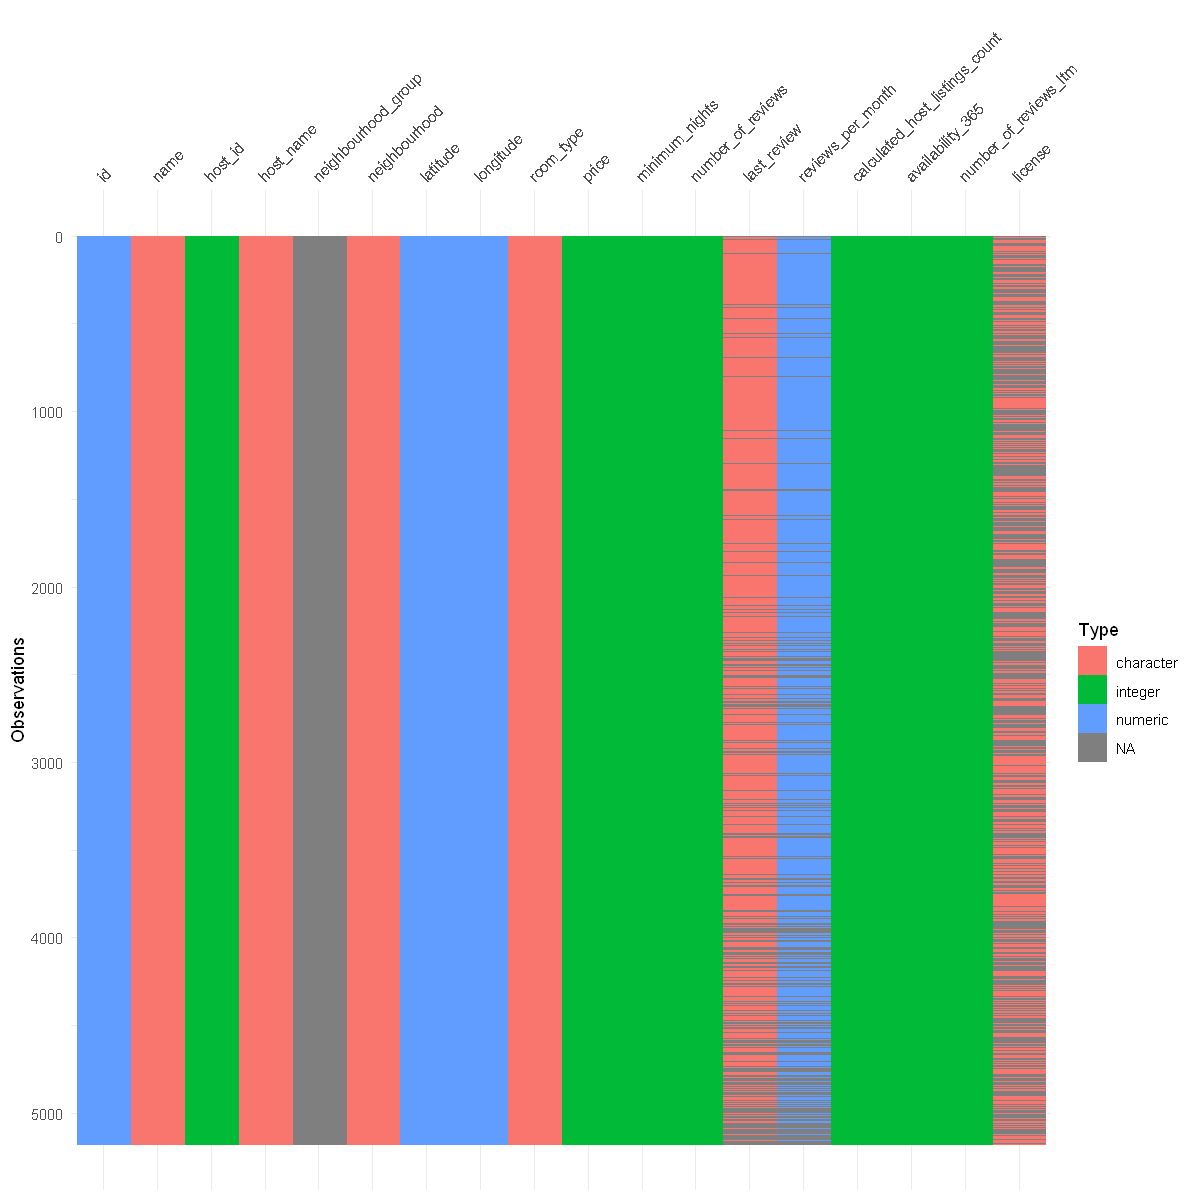

In [13]:
# Uniformizar e Visualizar as variáveis, o nº de observações e o tipo de dado
db_clean <- db
db_clean[db_clean == ''] <- NA

# Definir o tamanho do gráfico e Representação do tipo de dados e os NAs
options(repr.plot.width = 10, repr.plot.height = 10)
visdat::vis_dat(db_clean, sort_type = FALSE)

In [14]:
# Listar o número de NAs de cada variável
print(paste("NAs: "))
map(db_clean, ~sum(is.na(.)))

[1] "NAs: "


$id
[1] 0

$name
[1] 0

$host_id
[1] 0

$host_name
[1] 0

$neighbourhood_group
[1] 5182

$neighbourhood
[1] 0

$latitude
[1] 0

$longitude
[1] 0

$room_type
[1] 0

$price
[1] 0

$minimum_nights
[1] 0

$number_of_reviews
[1] 0

$last_review
[1] 1223

$reviews_per_month
[1] 1223

$calculated_host_listings_count
[1] 0

$availability_365
[1] 0

$number_of_reviews_ltm
[1] 0

$license
[1] 2814

In [15]:
# % de NAs do Last_Review e Reviews_per_Month
paste("A % de NAs da variável Last_Review na amostra é de ",
      round((sum(is.na(db_clean$last_review))/nrow(db_clean))*100, 2),"%.")
paste("A % de NAs da variável Reviews_per_Month na amostra é de ",
      round((sum(is.na(db_clean$reviews_per_month))/nrow(db_clean))*100, 2),"%.")

[1] "A % de NAs da variável Last_Review na amostra é de  23.6 %."

[1] "A % de NAs da variável Reviews_per_Month na amostra é de  23.6 %."

In [16]:
# Estrutura da Tabela de Dados Limpa
str(db_clean)

# Estatística Descritiva Básica das Variáveis Limpas
summary(db_clean)

'data.frame':	5182 obs. of  18 variables:
 $ id                            : num  3168 3781 5506 6695 7903 ...
 $ name                          : chr  "TudorStudio" "HARBORSIDE-Walk to subway" "** Fort Hill Inn Private! Minutes to center!**" "Fort Hill Inn *Sunny* 1 bedroom, condo duplex" ...
 $ host_id                       : int  3697 4804 8229 8229 14169 306681 26988 38997 38997 71783 ...
 $ host_name                     : chr  "Mark" "Frank" "Terry" "Terry" ...
 $ neighbourhood_group           : logi  NA NA NA NA NA NA ...
 $ neighbourhood                 : chr  "Brighton" "East Boston" "Roxbury" "Roxbury" ...
 $ latitude                      : num  42.4 42.4 42.3 42.3 42.4 ...
 $ longitude                     : num  -71.2 -71 -71.1 -71.1 -71.1 ...
 $ room_type                     : chr  "Private room" "Entire home/apt" "Entire home/apt" "Entire home/apt" ...
 $ price                         : int  99 132 149 179 116 300 110 135 135 133 ...
 $ minimum_nights                : int  9

       id                name              host_id           host_name        
 Min.   :3.168e+03   Length:5182        Min.   :     3697   Length:5182       
 1st Qu.:2.082e+07   Class :character   1st Qu.: 18517776   Class :character  
 Median :4.324e+07   Mode  :character   Median : 87001850   Mode  :character  
 Mean   :1.441e+17                      Mean   :125430383                     
 3rd Qu.:5.359e+07                      3rd Qu.:212359760                     
 Max.   :7.162e+17                      Max.   :479130189                     
                                                                              
 neighbourhood_group neighbourhood         latitude       longitude     
 Mode:logical        Length:5182        Min.   :42.23   Min.   :-71.20  
 NA's:5182           Class :character   1st Qu.:42.33   1st Qu.:-71.11  
                     Mode  :character   Median :42.35   Median :-71.08  
                                        Mean   :42.35   Mean   :-71.09  
   

# 🛠️ Limpeza e Preparação dos Dados

In [17]:
# Eliminar as variáveis id[1], name[2], host_name[4], neighbourhood_group[5],
# latitude[7], longitude[8], last_review[13], reviews_per_month[14] e 
# number_of_reviews_ltm[17]
db_clean <- db[-c(1,2,4,5,7,8,13,14,17)]

In [18]:
# Estrutura da Tabela de Dados (caracteriza o tipo de cada variável)
str(db_clean)

'data.frame':	5182 obs. of  9 variables:
 $ host_id                       : int  3697 4804 8229 8229 14169 306681 26988 38997 38997 71783 ...
 $ neighbourhood                 : chr  "Brighton" "East Boston" "Roxbury" "Roxbury" ...
 $ room_type                     : chr  "Private room" "Entire home/apt" "Entire home/apt" "Entire home/apt" ...
 $ price                         : int  99 132 149 179 116 300 110 135 135 133 ...
 $ minimum_nights                : int  91 32 3 3 4 2 91 29 33 30 ...
 $ number_of_reviews             : int  0 23 113 119 295 50 25 5 2 52 ...
 $ calculated_host_listings_count: int  1 1 10 10 1 2 9 11 11 29 ...
 $ availability_365              : int  288 168 45 59 9 251 272 348 349 245 ...
 $ license                       : chr  "" "" "Approved by the government" "STR446650" ...


In [19]:
# Uniformizar South Boston Waterfront em South Boston
db_clean$neighbourhood <- ifelse(db_clean$neighbourhood == 'South Boston Waterfront',
                                 yes = 'South Boston',
                                 no = db_clean$neighbourhood)

# Uniformizar Longwood Medical Area em Mission Hill
db_clean$neighbourhood <- ifelse(db_clean$neighbourhood == 'Longwood Medical Area',
                                 yes = 'Mission Hill',
                                 no = db_clean$neighbourhood)

# Agrupar os Bairros(Neighbourhood) em Regiões
db_clean$neighbourhood <- ifelse(db_clean$neighbourhood == 'Charlestown',
                                 yes = 'North Boston',
                                 no = db_clean$neighbourhood)

db_clean$neighbourhood <- ifelse(db_clean$neighbourhood == 'South End' |
                                 db_clean$neighbourhood == 'Mission Hill' |
                                 db_clean$neighbourhood == 'South Boston' |
                                 db_clean$neighbourhood == 'Roxbury' |
                                 db_clean$neighbourhood == 'Dorchester' |
                                 db_clean$neighbourhood == 'Jamaica Plain' |
                                 db_clean$neighbourhood == 'Roslindale' |
                                 db_clean$neighbourhood == 'Mattapan' |
                                 db_clean$neighbourhood == 'Hyde Park' |
                                 db_clean$neighbourhood == 'South Boston Waterfront',
                                 yes = 'South Boston',
                                 no = db_clean$neighbourhood)

db_clean$neighbourhood <- ifelse(db_clean$neighbourhood == 'Allston' |
                                 db_clean$neighbourhood == 'Brighton' |
                                 db_clean$neighbourhood == 'West End' |
                                 db_clean$neighbourhood == 'West Roxbury',
                                 yes = 'West Boston',
                                 no = db_clean$neighbourhood)


db_clean$neighbourhood <- ifelse(db_clean$neighbourhood == 'Fenway' |
                                 db_clean$neighbourhood == 'Back Bay' |
                                 db_clean$neighbourhood == 'Bay Village' |
                                 db_clean$neighbourhood == 'Chinatown' |
                                 db_clean$neighbourhood == 'West End' |
                                 db_clean$neighbourhood == 'North End' |
                                 db_clean$neighbourhood == 'Downtown' |
                                 db_clean$neighbourhood == 'Leather District' |
                                 db_clean$neighbourhood == 'Beacon Hill',
                                 yes = 'Center Boston',
                                 no = db_clean$neighbourhood)

In [20]:
# Tranformar a variável neighbourhood categórica e verificar os seus níveis
db_clean$neighbourhood <- as.factor(db_clean$neighbourhood)
levels(db_clean$neighbourhood)
str(db_clean$neighbourhood)

[1] "Center Boston"  "East Boston"    "Harbor Islands" "North Boston"  
[5] "South Boston"   "West Boston"

 Factor w/ 6 levels "Center Boston",..: 6 2 5 5 4 6 1 1 1 5 ...


In [21]:
# Transformar chr em fator
db_clean$room_type <- as.factor(db_clean$room_type)

# Variável room_type
str(db_clean$room_type)
levels(db_clean$room_type)

 Factor w/ 4 levels "Entire home/apt",..: 3 1 1 1 3 1 1 1 1 1 ...


[1] "Entire home/apt" "Hotel room"      "Private room"    "Shared room"

In [22]:
# Transformar chr em binária
db_clean$license <- ifelse(db_clean$license == '', 0, 1)
str(db_clean$license)

 num [1:5182] 0 0 1 1 0 1 0 0 0 0 ...


In [23]:
# Uniformizar os IDs
# Lista de IDs únicos
unique_ids <- unique(db_clean$host_id)

# Nº Máximo de IDs Únicos
max_id <- length(unique_ids)

# Sequência de IDs uniformizados
uniformized_ids <- seq(1, max_id)

# Combinação entre o ID Original e o Uniformizado, usando a função
original_to_uniformized <- data.frame(unique_ids, uniformized_ids)

In [24]:
# Nova lista para os ids_uniformizados
transformed_numbers <- c()

# Alterar os IDs - Iterar a lista original e alterar pela nova
for (id in db_clean$host_id) {
    transformed_numbers <- c(transformed_numbers, original_to_uniformized[which(original_to_uniformized[1] == id), 2])
}

In [25]:
# Confirmar se a uniformização está correta

# Primeiro verificamos quantos host_id com o nº 107434423 existem 
sum(db_clean$host_id == 107434423)

# De seguida verificamos o novo id corresponder ao antigo 107434423
original_to_uniformized[which(original_to_uniformized[1] == 107434423), ]

# E por último verificamos a sua frequencia no data.frame transformado
table(transformed_numbers)[986]

[1] 477

,unique_ids,uniformized_ids
,<int>,<int>
986,107434423,986


986 
477

In [26]:
# Por fim substituimos o host_id no data.frame pelo uniformizado
length(transformed_numbers)
length(db_clean$host_id)

db_clean$host_id <- transformed_numbers

[1] 5182

[1] 5182

In [27]:
# Sumário com Informação Estatística acerca das Variáveis Selecionadas

# summary(db_clean)
summary(db_clean[4])      # Variável Target
summary(db_clean[-c(4)])  # Variáveis Independetes

     price        
 Min.   :   10.0  
 1st Qu.:  100.0  
 Median :  179.0  
 Mean   :  230.7  
 3rd Qu.:  275.0  
 Max.   :10000.0  

    host_id              neighbourhood            room_type    minimum_nights  
 Min.   :   1.0   Center Boston :1272   Entire home/apt:3418   Min.   :  1.00  
 1st Qu.: 456.0   East Boston   : 341   Hotel room     :  19   1st Qu.:  2.00  
 Median : 986.0   Harbor Islands:  12   Private room   :1723   Median : 10.00  
 Mean   : 905.1   North Boston  : 429   Shared room    :  22   Mean   : 27.41  
 3rd Qu.:1333.8   South Boston  :1762                          3rd Qu.: 32.00  
 Max.   :1835.0   West Boston   :1366                          Max.   :730.00  
 number_of_reviews calculated_host_listings_count availability_365
 Min.   :   0.00   Min.   :  1.00                 Min.   :  0.0   
 1st Qu.:   1.00   1st Qu.:  2.00                 1st Qu.: 77.0   
 Median :   9.00   Median :  6.00                 Median :187.5   
 Mean   :  47.34   Mean   : 62.32                 Mean   :189.8   
 3rd Qu.:  54.00   3rd Qu.: 45.00                 3rd Qu.:315.0   
 Max.   :1100.00   Max.   :477.00     

In [28]:
# Limpeza concluida | Verificação do Nº de Linhas, Colunas e Nomes das Colunas
nrow(db_clean)
ncol(db_clean)
names(db_clean)

summary(db_clean)
str(db_clean)

[1] 5182

[1] 9

[1] "host_id"                        "neighbourhood"                 
[3] "room_type"                      "price"                         
[5] "minimum_nights"                 "number_of_reviews"             
[7] "calculated_host_listings_count" "availability_365"              
[9] "license"

    host_id              neighbourhood            room_type   
 Min.   :   1.0   Center Boston :1272   Entire home/apt:3418  
 1st Qu.: 456.0   East Boston   : 341   Hotel room     :  19  
 Median : 986.0   Harbor Islands:  12   Private room   :1723  
 Mean   : 905.1   North Boston  : 429   Shared room    :  22  
 3rd Qu.:1333.8   South Boston  :1762                         
 Max.   :1835.0   West Boston   :1366                         
     price         minimum_nights   number_of_reviews
 Min.   :   10.0   Min.   :  1.00   Min.   :   0.00  
 1st Qu.:  100.0   1st Qu.:  2.00   1st Qu.:   1.00  
 Median :  179.0   Median : 10.00   Median :   9.00  
 Mean   :  230.7   Mean   : 27.41   Mean   :  47.34  
 3rd Qu.:  275.0   3rd Qu.: 32.00   3rd Qu.:  54.00  
 Max.   :10000.0   Max.   :730.00   Max.   :1100.00  
 calculated_host_listings_count availability_365    license     
 Min.   :  1.00                 Min.   :  0.0    Min.   :0.000  
 1st Qu.:  2.00                 1st Qu.: 77.0    1s

'data.frame':	5182 obs. of  9 variables:
 $ host_id                       : int  1 2 3 3 4 5 6 7 7 8 ...
 $ neighbourhood                 : Factor w/ 6 levels "Center Boston",..: 6 2 5 5 4 6 1 1 1 5 ...
 $ room_type                     : Factor w/ 4 levels "Entire home/apt",..: 3 1 1 1 3 1 1 1 1 1 ...
 $ price                         : int  99 132 149 179 116 300 110 135 135 133 ...
 $ minimum_nights                : int  91 32 3 3 4 2 91 29 33 30 ...
 $ number_of_reviews             : int  0 23 113 119 295 50 25 5 2 52 ...
 $ calculated_host_listings_count: int  1 1 10 10 1 2 9 11 11 29 ...
 $ availability_365              : int  288 168 45 59 9 251 272 348 349 245 ...
 $ license                       : num  0 0 1 1 0 1 0 0 0 0 ...


---

# 📊 Gráfico e Tabelas de Frequências

## Scatterplot
Gráfico de Pontos entre as variáveis **`Host_ID`**, **`Neighbourhood`**, **`Room_Type`**, **`Price`**, **`Minimum_Nights`**, **`Number_of_Reviews`**, **`Calculated_Host_Listings_Count`**, **`Availability_365`** e  **`License`**

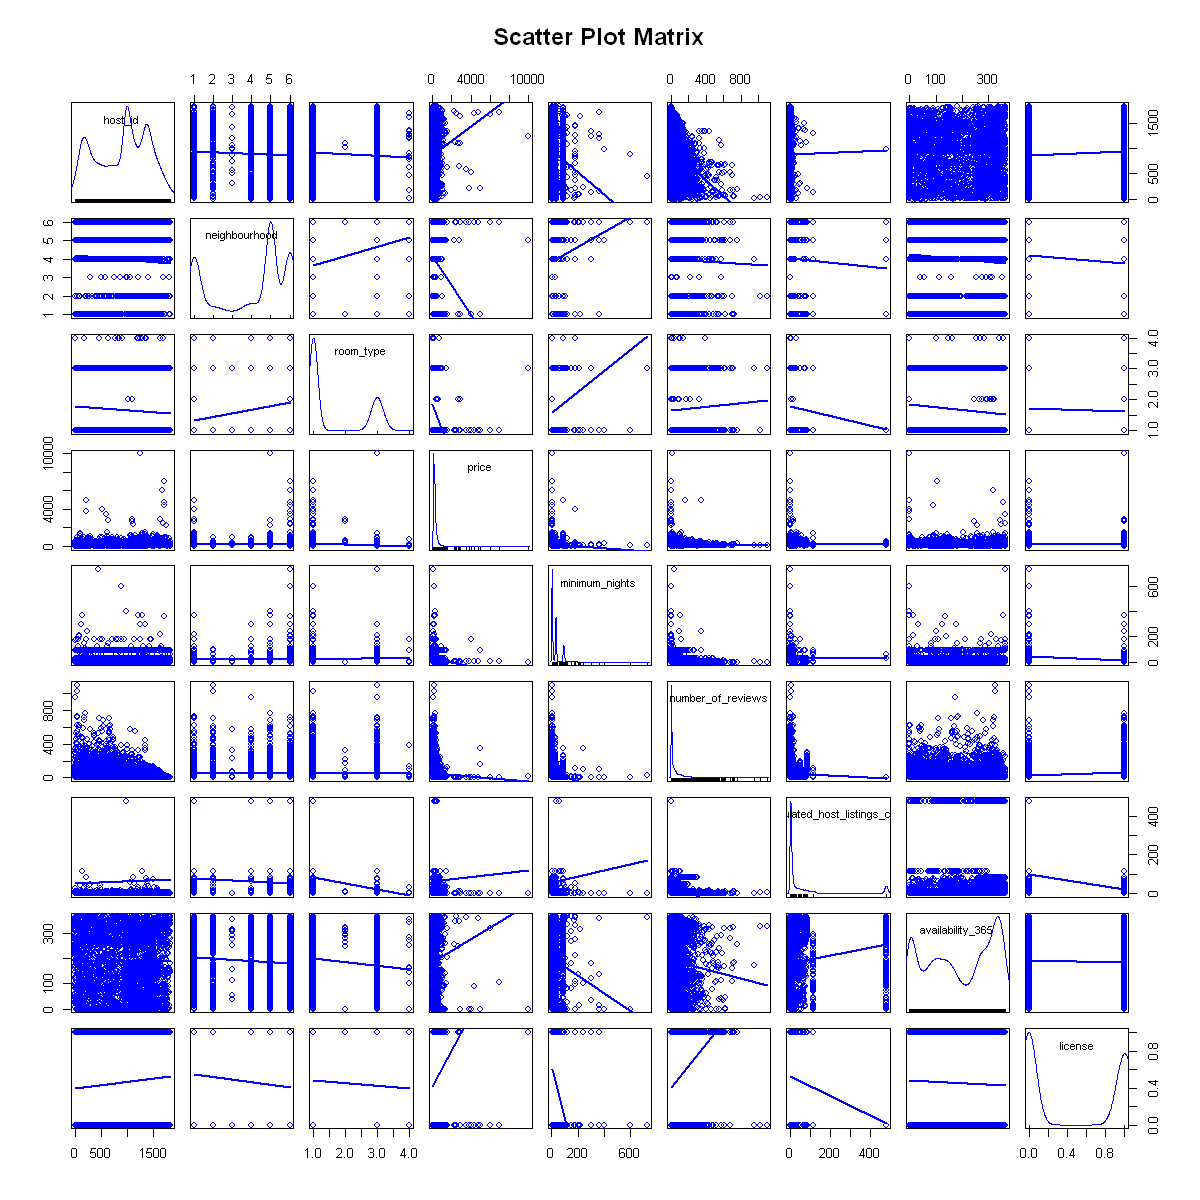

In [29]:
scatterplotMatrix(db_clean, smooth=FALSE, main="Scatter Plot Matrix")

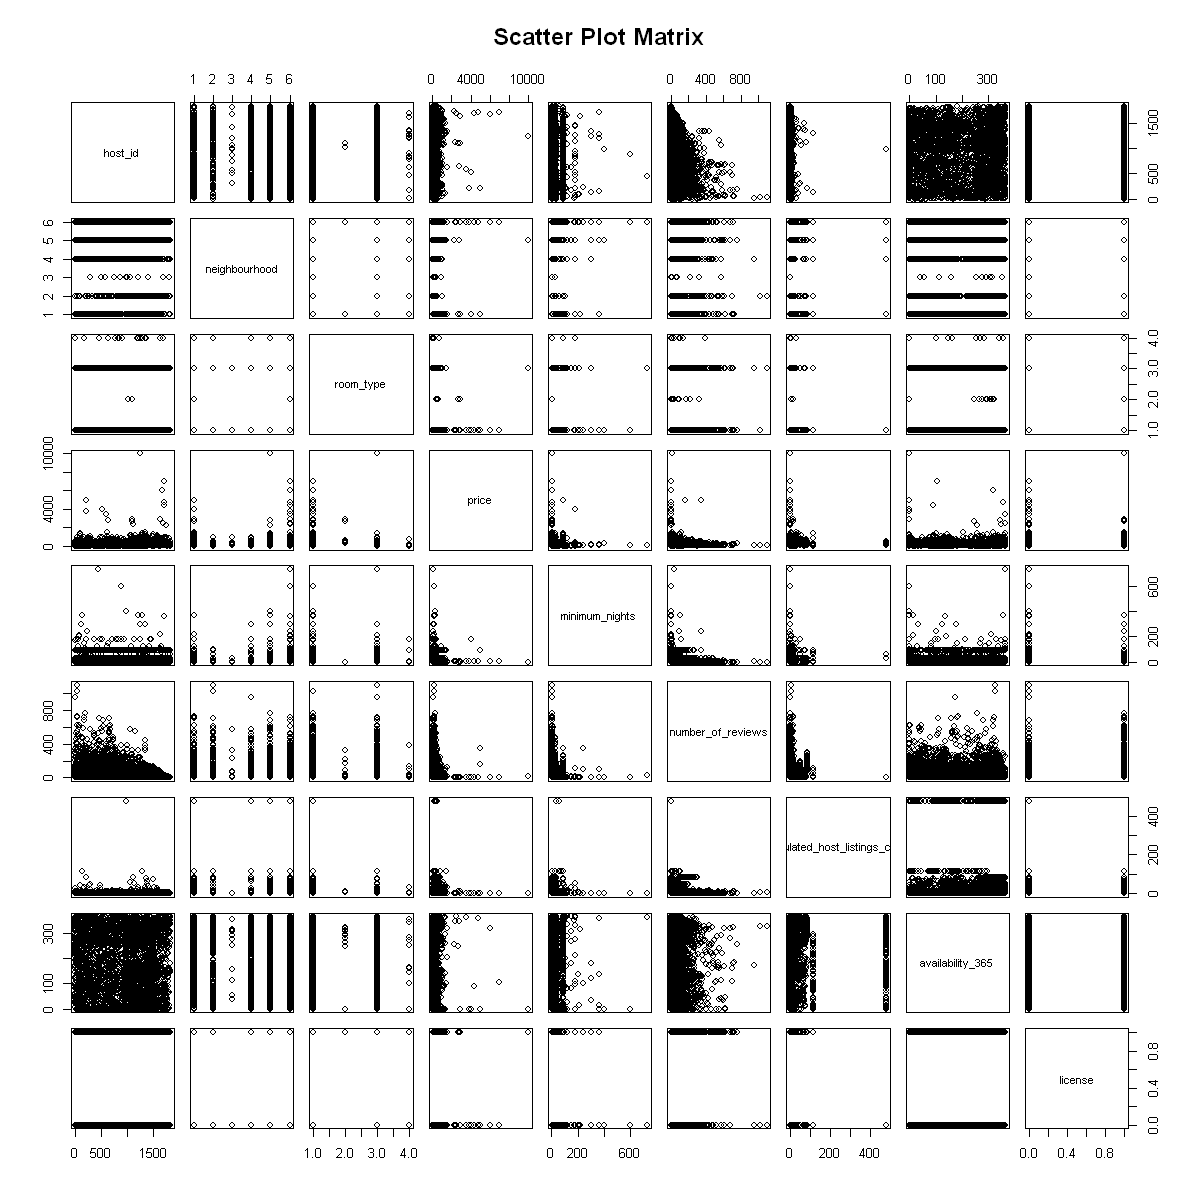

In [30]:
pairs(db_clean, main = "Scatter Plot Matrix")

## Boxplot
Caixa de Bigodes entre **`Price`** e **`Neighbourhood`**

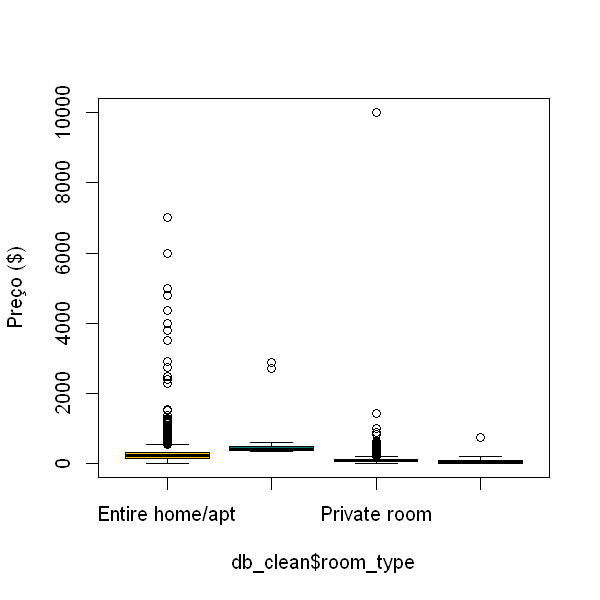

In [31]:
# Definir o Tamanho da Figura
options(repr.plot.width = 5, repr.plot.height = 5)

# Boxplot - Caixa de Bigodes da Variável 
boxplot(db_clean$price ~ db_clean$room_type, ylab = 'Preço ($)', col=c('#ffc40c', '#007474', '#6f2da8','#ce2029'))

> É de notar a existência de valores excessivos que poderiam ser considerados ***outliers*** na variável **`Price`**, pelo que se teremos de verificar a hipótese da existência de ***outliers*** e garantir que estes valores não são ***influencers***.

##  Histograma 

Variável **`Price`**

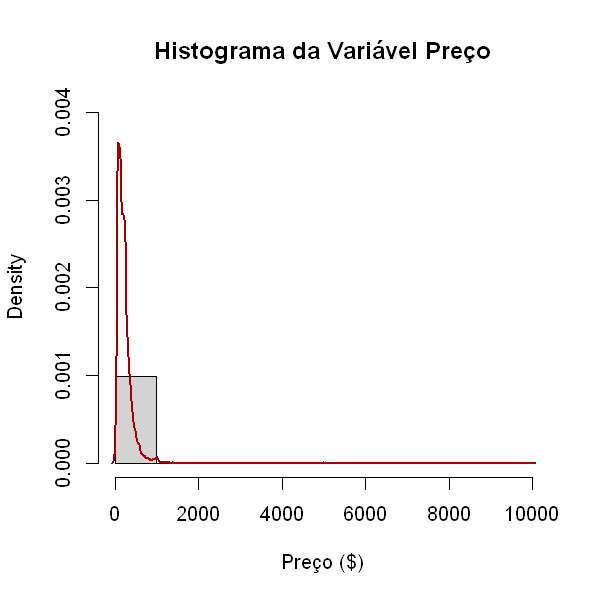

In [32]:
hist(db_clean$price, 
     freq=FALSE, 
     main = "Histograma da Variável Preço",
     xlab='Preço ($)', 
     ylim = c(0,0.004),
     col = "#d3d3d3")

lines(density(db_clean$price), 
      lwd=2, 
      col='#a40000')

> A **assimetria** da variável **`Price`** é **muito positiva** (devido à presença dos ***outliers***)

> Para solucionar o problema, podemos ***logaritmizar*** a variável, numa tentativa de a normalizar. 

- Esta transformação **reduz** a assimetria, **diminui** a escala, mas **não altera as propriedades** da variável.

Variável **`Price` logaritmizada**

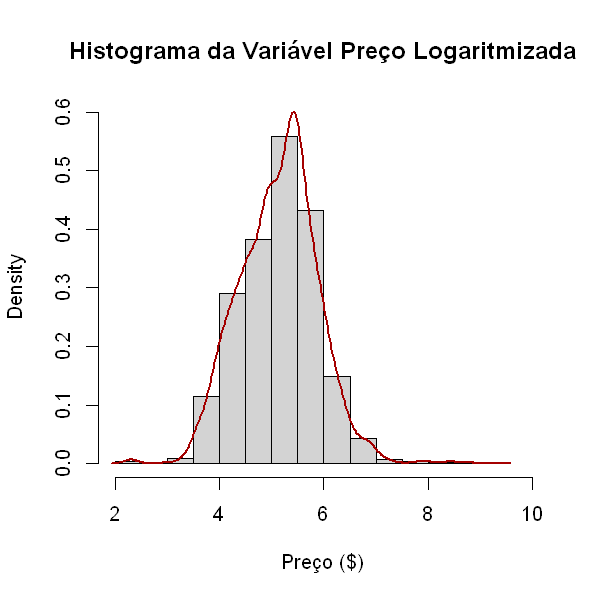

In [33]:
hist(log(db_clean$price), 
     main = "Histograma da Variável Preço Logaritmizada",
     freq=FALSE, 
     xlab='Preço ($)', 
     xlim = c(2, 10),
     ylim = c(0,0.6),
     col = "#d3d3d3")

lines(density(log(db_clean$price)), 
      lwd=2, 
      col='#a40000')

## Scatterplot
Gráfico de Pontos entre as variáveis **`Price`**, **`Neighbourhood`** e **`License`**

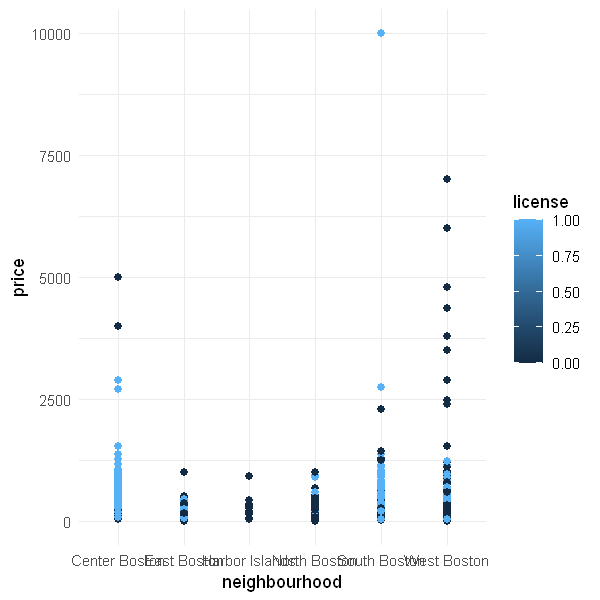

In [34]:
ggplot(db_clean, aes(x = neighbourhood, 
                     y = price, 
                     col = license)) + geom_point( size = 2) + theme_minimal()

## Gráfico de Violinos
Gráfico de Violinos entre o **`Price`** e o **`Neighbourhood`**

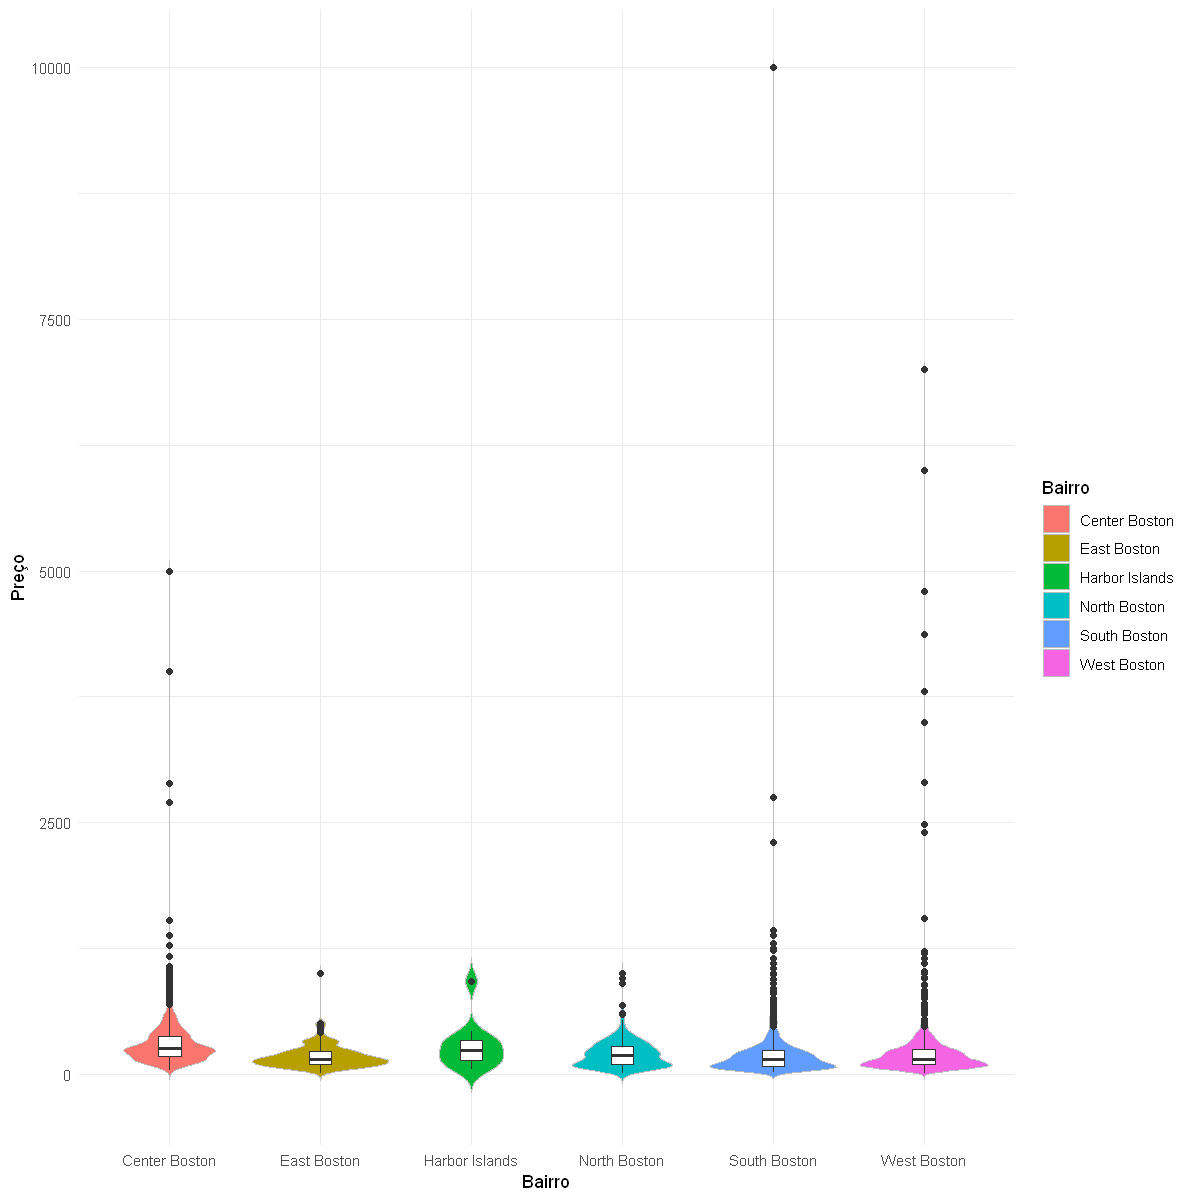

In [35]:
# Definir o Tamanho da Figura
options(repr.plot.width = 10, repr.plot.height = 10)

p <- ggplot(db_clean, aes(x = neighbourhood, y = price, fill = neighbourhood)) + 
     geom_violin(trim=FALSE, color="grey")+ 
     geom_boxplot(width=0.15,  position=position_dodge(1), fill = "white") + 
     theme_minimal()+ xlab("Bairro") + ylab("Preço")
     # facet_zoom(ylim = c(0, 1000), show.area = TRUE, zoom.size=10, shrink = TRUE)
    
p + guides(fill = guide_legend(title="Bairro"))

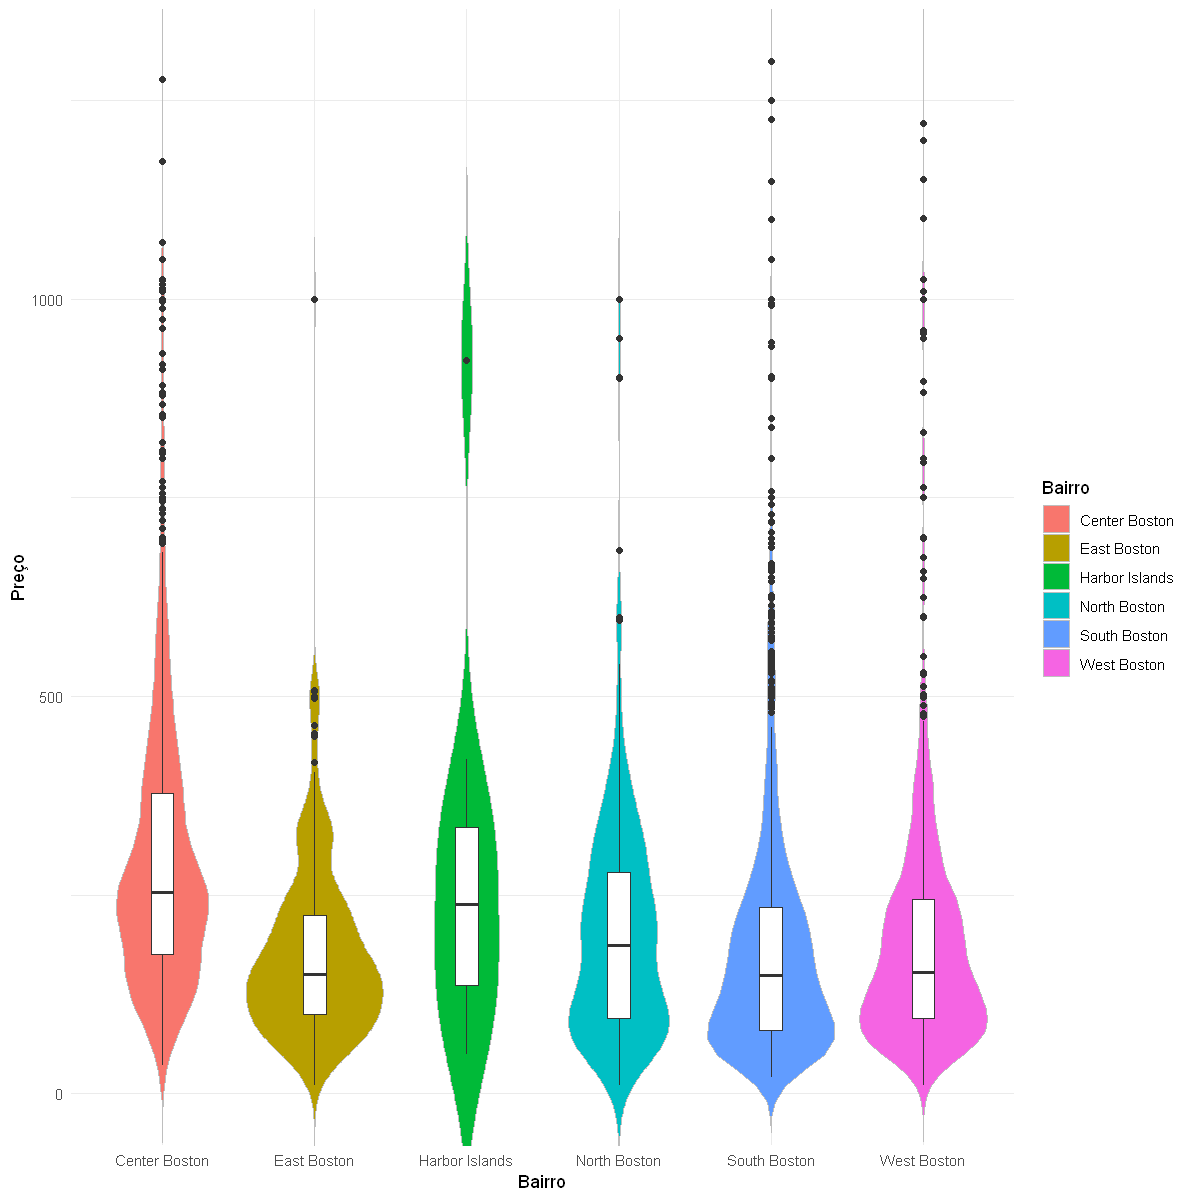

In [36]:
# Zoom do gráfico entre y = 0 e y = 1300
p <- ggplot(db_clean, aes(x = neighbourhood, y = price, fill = neighbourhood)) + 
     geom_violin(trim=FALSE, color="grey")+ 
     geom_boxplot(width=0.15,  position=position_dodge(1), fill = "white") + 
     theme_minimal()+ xlab("Bairro") + ylab("Preço") + 
     coord_cartesian(ylim=c(0,1300))

p + guides(fill = guide_legend(title="Bairro"))

#### Relação entre o **`Price`** e as zonas de **`Neighbourhood`**.

> Verificamos e corroboramos o elevado número de ***outliers* na variável preço**, mesmo quando agrupado por bairros, sendo notória uma predominância de outliers nas regiões de `Center`, `South` e `West Boston`, representadas respetivamente a vermelho, azul e rosa no gráfico.

## Tabela de Frequências

Variável **`Room_Type`**

In [37]:
Room_Type <- c("Entire home/Apt", "Hotel Room", "Private Room","Shared Room")
Room_Type_tab <- table(db_clean$room_type)
Room_Type_p <- round((prop.table(Room_Type_tab)*100),1)

n <- c(as.numeric(Room_Type_tab[1]),as.numeric(Room_Type_tab[2]),
                 as.numeric(Room_Type_tab[3]),as.numeric(Room_Type_tab[4]))
Percentagem <- c(as.numeric(Room_Type_p[1]),as.numeric(Room_Type_p[2]),
                 as.numeric(Room_Type_p[3]),as.numeric(Room_Type_p[4]))
table1 <- data.frame(Room_Type,n,Percentagem)
ftable_1 <- flextable(head(table1))

ftable_1 <- bg(ftable_1, bg = "#ce2029", part = "header")
ftable_1 <- color(ftable_1, color = "white", part = "header")
ftable_1 <- bold(ftable_1, bold = TRUE, part="header")
ftable_1 <- set_header_labels(ftable_1,Room_Type = 'Tipo de Alojamento',n = 'n',Percentagem = '%')
ftable_1 <- autofit(ftable_1)
# ftable_1 # -> Ver output no RStudio
table1

Room_Type,n,Percentagem
<chr>,<dbl>,<dbl>
Entire home/Apt,3418,66.0
Hotel Room,19,0.4
Private Room,1723,33.2
Shared Room,22,0.4


>  Podemos verificar que o tipo de quarto que é a moda da amostra é a tipologia **`Entire Home/Apt`** (Casa Inteira/Apartamento), com $65,9\%$ do total de alojamentos. Segue-se o **`Private Room`**(Quarto Privado), com $66\%$, e os **`Hotel Room`** (Quartos de Hotel) e **`Shared Room`** (Quarto Partilhado) com apenas $0,4\%$ do total de alojamentos.

## Tabela de Frequências

Variável **`Neighbourhood`**

In [38]:
levels(db_clean$neighbourhood)

[1] "Center Boston"  "East Boston"    "Harbor Islands" "North Boston"  
[5] "South Boston"   "West Boston"

In [39]:
Neighbourhood <- c("Center Boston", "East Boston", "Harbor Islands","North Boston","South Boston","West Boston")
Neighbourhood_tab <- table(db_clean$neighbourhood)
Neighbourhood_p <- round((prop.table(Neighbourhood_tab)*100),1)
n <- c(as.numeric(Neighbourhood_tab[1]),as.numeric(Neighbourhood_tab[2]),
       as.numeric(Neighbourhood_tab[3]),as.numeric(Neighbourhood_tab[4]),
       as.numeric(Neighbourhood_tab[5]),as.numeric(Neighbourhood_tab[6]))
Percentagem <- c(as.numeric(Neighbourhood_p[1]),as.numeric(Neighbourhood_p[2]),
                 as.numeric(Neighbourhood_p[3]),as.numeric(Neighbourhood_p[4]),
                 as.numeric(Neighbourhood_p[5]),as.numeric(Neighbourhood_p[6]))
table2 <- data.frame(Neighbourhood,n,Percentagem)
ftable_2 <- flextable(head(table2))

ftable_2 <- bg(ftable_2, bg = "#ce2029", part = "header")
ftable_2 <- color(ftable_2, color = "white", part = "header")
ftable_2 <- bold(ftable_2, bold = TRUE, part="header")
ftable_2 <- set_header_labels(ftable_2, Neighbourhood = 'Bairros (por Regiões)',n = 'n',Percentagem = '%')
ftable_2 <- autofit(ftable_2)
# ftable_2 # -> Ver output no RStudio
table2

Neighbourhood,n,Percentagem
<chr>,<dbl>,<dbl>
Center Boston,1272,24.5
East Boston,341,6.6
Harbor Islands,12,0.2
North Boston,429,8.3
South Boston,1762,34.0
West Boston,1366,26.4


> As regiões com o maior número de anúncios de *Airbnb's* são: **`South Boston`**, **`West Boston`** e **`Center Boston`** e com menos é **`Harbor Islands`**

## Boxplots e Histogramas
Todas as Variáveis Numérias

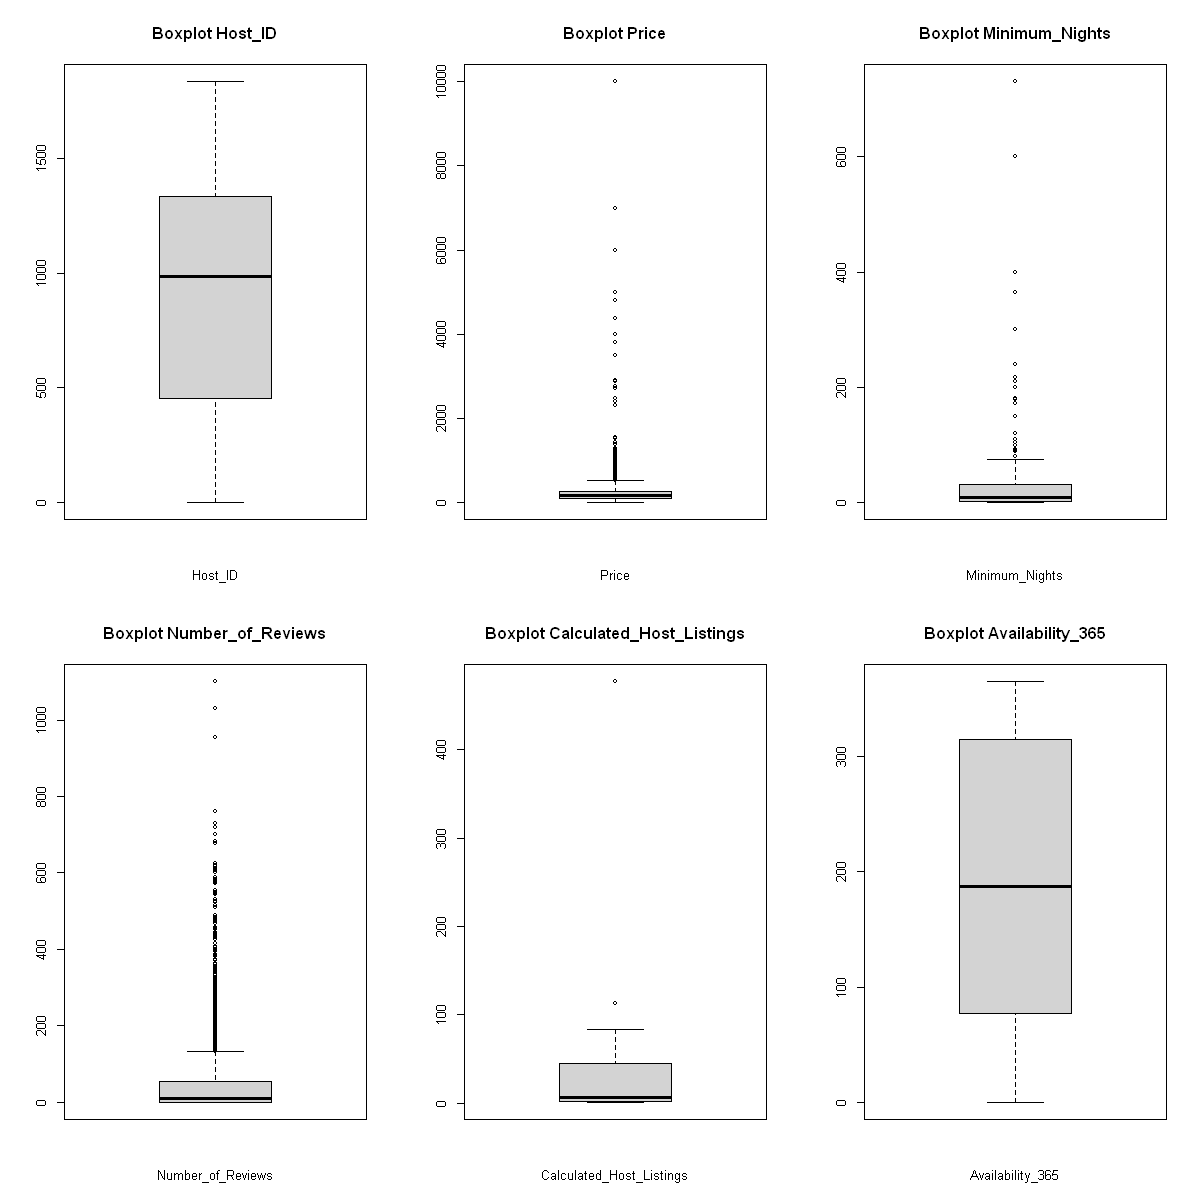

In [40]:
# Todos os boxplots das variáveis numéricas 
par(mfrow = c(2, 3))
boxplot(db_clean$host_id, main = "Boxplot Host_ID", xlab = "Host_ID")
boxplot(db_clean$price, main = "Boxplot Price", xlab = "Price")
boxplot(db_clean$minimum_nights, main = "Boxplot Minimum_Nights", xlab = "Minimum_Nights")
boxplot(db_clean$number_of_reviews, main = "Boxplot Number_of_Reviews", xlab = "Number_of_Reviews")
boxplot(db_clean$calculated_host_listings_count, main = "Boxplot Calculated_Host_Listings", xlab = "Calculated_Host_Listings")
boxplot(db_clean$availability_365, main = "Boxplot Availability_365", xlab = "Availability_365")

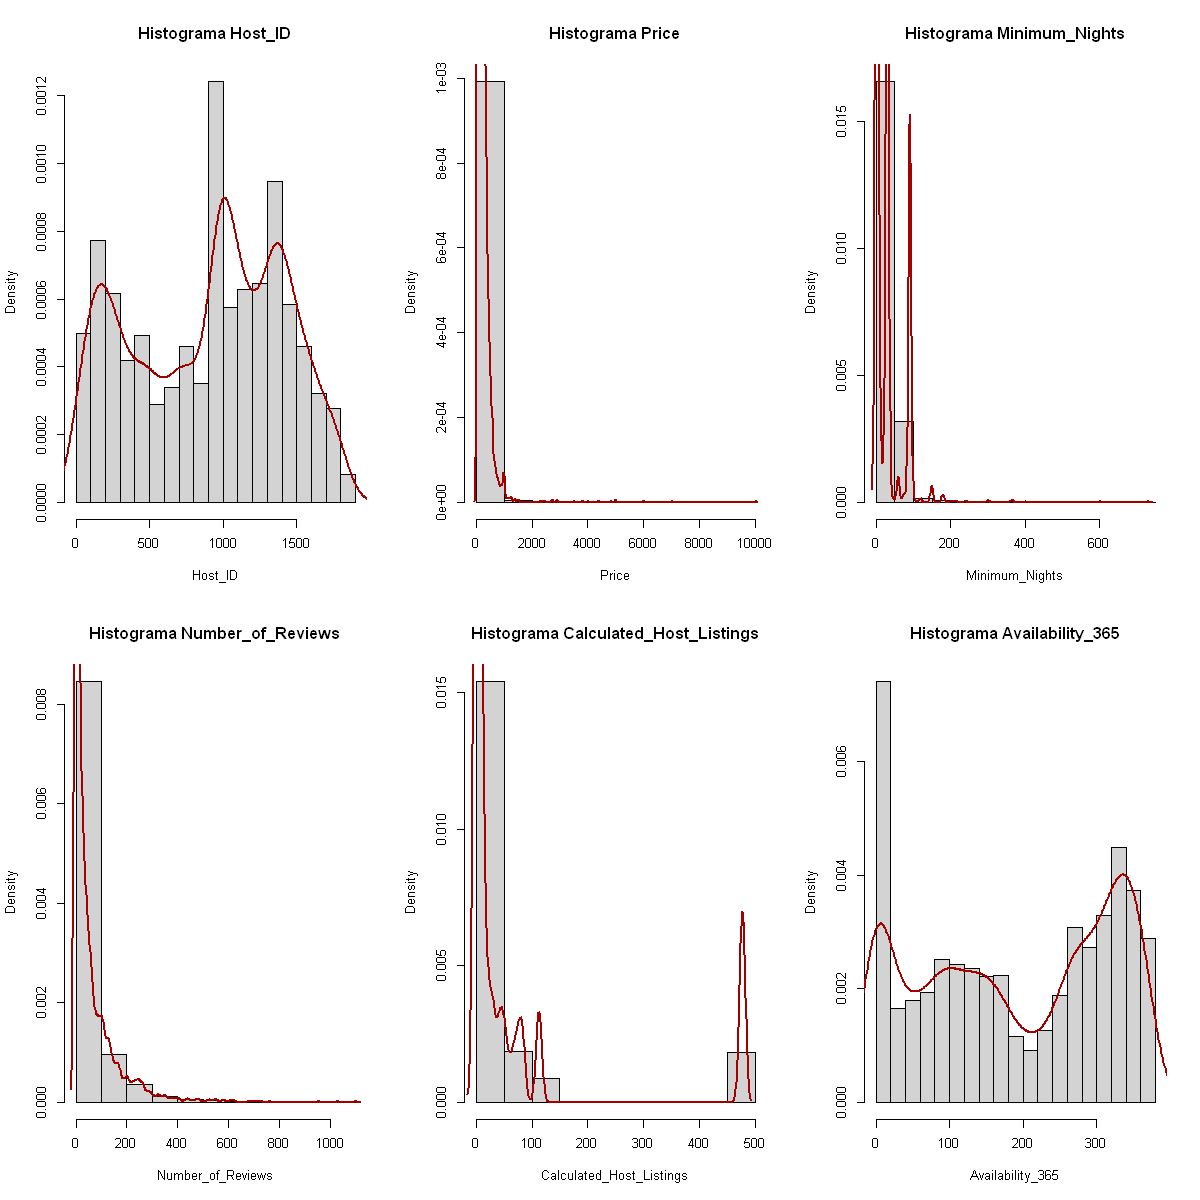

In [41]:
# Todos os histograma das variáveis numéricas 
par(mfrow = c(2, 3))
hist(db_clean$host_id, freq = FALSE, main = "Histograma Host_ID", xlab = "Host_ID")
lines(density(db_clean$host_id), lwd = 2, col = '#a40000')

hist(db_clean$price, freq = FALSE, main = "Histograma Price", xlab = "Price")
lines(density(db_clean$price), lwd = 2, col = '#a40000')

hist(db_clean$minimum_nights, freq = FALSE, main = "Histograma Minimum_Nights", xlab = "Minimum_Nights")
lines(density(db_clean$minimum_nights), lwd=2, col='#a40000')

hist(db_clean$number_of_reviews, freq = FALSE, main = "Histograma Number_of_Reviews", xlab = "Number_of_Reviews")
lines(density(db_clean$number_of_reviews), lwd = 2, col = '#a40000')

hist(db_clean$calculated_host_listings_count, freq = FALSE, main = "Histograma Calculated_Host_Listings", xlab = "Calculated_Host_Listings")
lines(density(db_clean$calculated_host_listings_count), lwd = 2, col = '#a40000')

hist(db_clean$availability_365, freq = FALSE, main = "Histograma Availability_365", xlab = "Availability_365")
lines(density(db_clean$availability_365), lwd=2, col = '#a40000')

---

# 🔗 Correlação / Associação entre Variáveis

In [42]:
# Correlação de Pearson entre as variáveis

# Para calcular a correlação transformámos as variáveis todas em númericas, 
# criando um novo data.frame, ao qual designamos db_clean_cor
db_clean_cor <- db_clean
db_clean_cor$neighbourhood <- as.numeric(db_clean_cor$neighbourhood)
db_clean_cor$room_type <- as.numeric(db_clean_cor$room_type)

cor <- round(cor(db_clean_cor), digits = 2) 
cor

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,license
host_id,1.00,-0.06,-0.06,0.09,-0.17,-0.27,0.04,-0.01,0.07
neighbourhood,-0.06,1.00,0.25,-0.12,0.08,-0.01,-0.08,-0.08,-0.11
room_type,-0.06,0.25,1.00,-0.26,0.14,0.03,-0.22,-0.11,-0.05
price,0.09,-0.12,-0.26,1.00,-0.13,-0.03,0.01,0.06,0.12
minimum_nights,-0.17,0.08,0.14,-0.13,1.00,-0.23,0.04,-0.11,-0.43
number_of_reviews,-0.27,-0.01,0.03,-0.03,-0.23,1.00,-0.20,-0.06,0.21
calculated_host_listings_count,0.04,-0.08,-0.22,0.01,0.04,-0.20,1.00,0.17,-0.29
availability_365,-0.01,-0.08,-0.11,0.06,-0.11,-0.06,0.17,1.00,-0.04
license,0.07,-0.11,-0.05,0.12,-0.43,0.21,-0.29,-0.04,1.00


## Matriz de Correlação

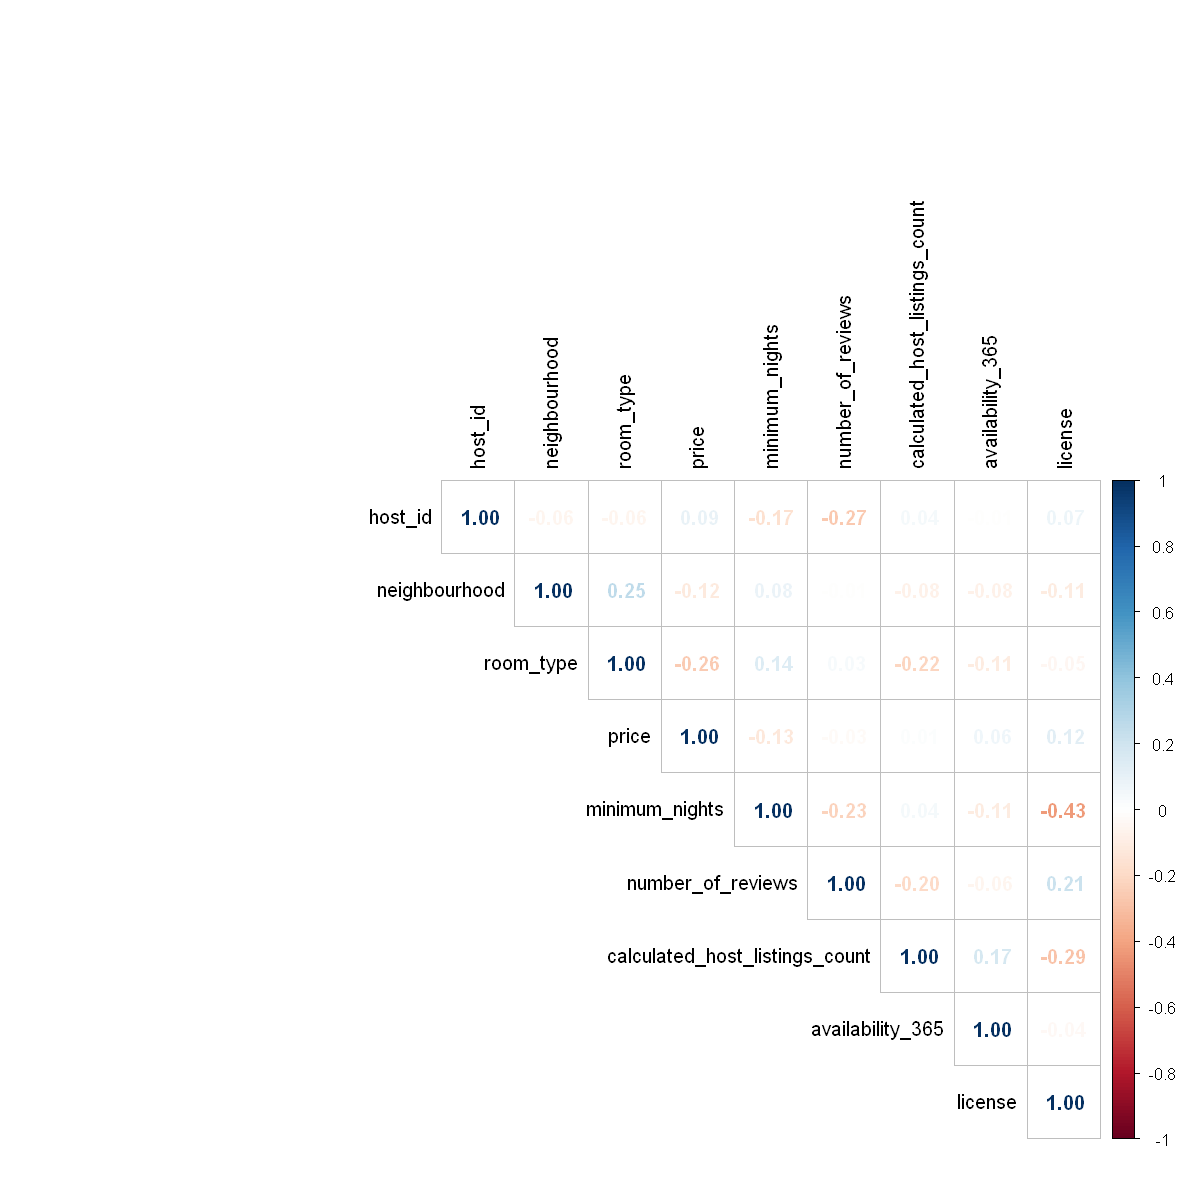

In [43]:
# Representação da Matriz de Correlação
corrplot(cor, 
         method = "number",
         tl.col = "black",
         type = "upper")

---

# 📉 Modelo de Regressão Linear

&nbsp;

> **Objetivo:** Desenvolver um modelo que permita estimar o preço a que os quartos são colocados à venda no **Airbnb**

- Variável Dependente (*target*): **`Price`**

- Variáveis Independente: **`Host_ID`**, **`Neighbourhood`**, **`Room_Type`**, **`Minimum_Nights`**, **`Number_of_Reviews`**, **`Calculated_Host_Listings_Count`**, **`Availability_365`** e  **`License`**

## 📈 Fit 1

> Numa primeira experiência utilizámos todas as variáveis e verificámos quais são significativas para o modelo, de modo a tentar excluir as que não são

In [44]:
# Eliminar NAs
db_model <- na.omit(db_clean)
nrow(db_clean) # Não há NAs para eliminar

# Homogenizar os índices das linhas sem os NAs
rownames(db_clean) <- c(1:nrow(db_clean))

[1] 5182

In [45]:
# Modelo de Regressão Linear Múlipla com todas as variáveis
fit <- lm(price ~., data = db_clean)
summary(fit)


Call:
lm(formula = price ~ ., data = db_clean)

Residuals:
   Min     1Q Median     3Q    Max 
-327.1  -90.7  -34.3   24.3 9850.8 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     3.004e+02  1.715e+01  17.517  < 2e-16 ***
host_id                         2.596e-02  8.624e-03   3.011  0.00262 ** 
neighbourhoodEast Boston       -1.032e+02  1.825e+01  -5.654 1.65e-08 ***
neighbourhoodHarbor Islands     2.971e-02  8.459e+01   0.000  0.99972    
neighbourhoodNorth Boston      -5.099e+01  1.700e+01  -2.999  0.00272 ** 
neighbourhoodSouth Boston      -6.859e+01  1.104e+01  -6.211 5.67e-10 ***
neighbourhoodWest Boston       -3.634e+01  1.190e+01  -3.054  0.00227 ** 
room_typeHotel room             3.107e+02  6.703e+01   4.636 3.64e-06 ***
room_typePrivate room          -1.535e+02  9.150e+00 -16.774  < 2e-16 ***
room_typeShared room           -1.655e+02  6.242e+01  -2.651  0.00806 ** 
minimum_nights                 -5.033e-

> Todas as variáveis são **estatisticamente significativas**, à exceção do fator **`Harbor Islands`** da variável **`neighbourhood`**, e da variável **`availability_365`**

- $R^2$ tem um valor muito baixo
- Os **Erros Residuais** são bastante elevados
- O modelo é adequado globalmente pela **estatística $F$**

In [46]:
# Verificamos se temos Multicolinearidade
vif(fit)

,GVIF,Df,GVIF^(1/(2*Df))
host_id,1.167959,1,1.080721
neighbourhood,1.290699,5,1.025847
room_type,1.166199,3,1.025956
minimum_nights,1.407996,1,1.186590
number_of_reviews,1.261783,1,1.123291
calculated_host_listings_count,1.253699,1,1.119687
availability_365,1.062932,1,1.030986
license,1.544462,1,1.242764


> Como todos os valores são *menores que 5*, **não temos Multicolinearidade** entre as Variáveis Independentes

In [47]:
# Escolha do Modelo de Regressão que melhor se ajusta aos dados com base no p-value
ols_step_both_p(fit)


                                           Stepwise Selection Summary                                            
----------------------------------------------------------------------------------------------------------------
                                           Added/                   Adj.                                            
Step               Variable               Removed     R-Square    R-Square      C(p)         AIC          RMSE      
----------------------------------------------------------------------------------------------------------------
   1              room_type               addition       0.078       0.077    152.0050    73621.6726    294.1468    
   2               license                addition       0.088       0.087     97.3470    73568.2935    292.6075    
   3            neighbourhood             addition       0.097       0.095     45.7740    73525.3790    291.2581    
   4               host_id                addition       0.101       0.099

In [48]:
# Escolha do Modelo de Regressão que melhor se ajusta aos dados com base no AIC
ols_step_both_aic(fit)



                                                 Stepwise Summary                                                 
----------------------------------------------------------------------------------------------------------------
Variable                           Method        AIC            RSS            Sum Sq        R-Sq      Adj. R-Sq 
----------------------------------------------------------------------------------------------------------------
room_type                         addition    73621.673    448012746.437    37866781.950    0.07793      0.07740 
license                           addition    73568.293    443250407.014    42629121.373    0.08774      0.08703 
neighbourhood                     addition    73525.379    438747313.715    47132214.672    0.09700      0.09543 
host_id                           addition    73506.106    436949856.286    48929672.101    0.10070      0.09896 
minimum_nights                    addition    73495.994    435929787.664    49949740.72

> **Não temos concordância** nos dois métodos, isto é, ambos os métodos escolhem uma regressão diferente que melhor se ajusta aos dados com base no ***p-value*** e no no critério de informação de Akaike - ***AIC*** . 

 - No método tendo por base o ***p-value***, o melhor modelo não utiliza variável **`availability_365`**
 
 - Já no método tendo em conta o ***AIC***, o melhor modelo utiliza todas as variáveis independentes.
 

> Em ambos, segundo o **Erro Residual**, o $R^2$ e o $R^2$ **ajustado**, temos um modelo pouco explicativo da variável **`Price`**.

[1] 1.660343e-14


	studentized Breusch-Pagan test

data:  fit
BP = 14.499, df = 14, p-value = 0.4133



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit
LM test = 6.0279, df = 1, p-value = 0.01408



	Jarque Bera Test

data:  fit$residuals
X-squared = 35656283, df = 2, p-value < 2.2e-16


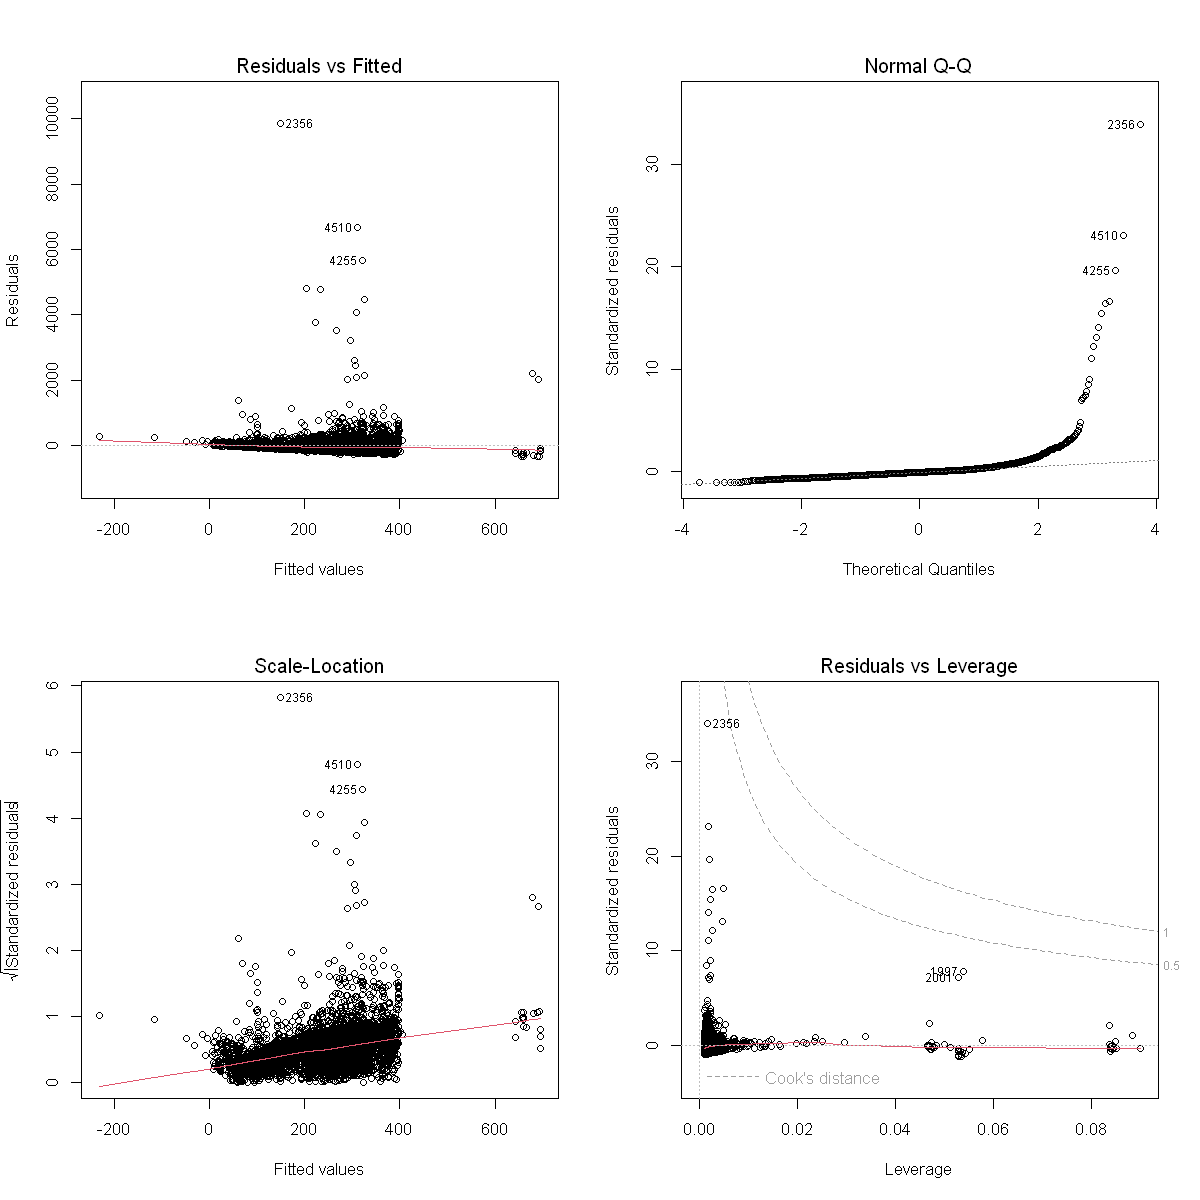

In [49]:
# Verificação dos Pressupostos dos Resíduos (Testes e Gráficos)
mean(fit$residuals)              # Média Nula
bptest(fit)                      # Variância Constante
bgtest(fit)                      # Ausência de Correlação
jarque.bera.test(fit$residuals)  # Distribuição Normal

# Representação Gráfica sobre os Resíduos
par(mfrow=c(2,2)) 
plot(fit)

In [50]:
# Verificar os valores destacados nos gráficos acima
db_clean[c(2356,4510,4255, 1997,2001),]

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,license
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>
2356,1244,South Boston,Private room,10000,1,12,1,0,1
4510,1722,West Boston,Entire home/apt,7000,7,0,1,106,0
4255,1676,West Boston,Entire home/apt,6000,7,0,1,318,0
1997,1106,Center Boston,Hotel room,2888,1,0,13,0,1
2001,1106,Center Boston,Hotel room,2704,1,1,13,246,1


###  🏮 Outliers

> Analisando os pressupostos acima representados, verificamos que existem ***outliers* significativos**, pelo que iremos remover de seguida os que são ***influencers*** no modelo da regressão.

In [51]:
# Vamos fazer um Teste de Outlier para o modelo
outlierTest(fit)

     rstudent unadjusted p-value Bonferroni p
2356 38.59499        1.4449e-286  7.4876e-283
4510 24.38474        2.1106e-124  1.0937e-120
4255 20.37841         7.4644e-89   3.8680e-85
317  17.03835         2.2360e-63   1.1587e-59
1040 16.91025         1.7658e-62   9.1505e-59
4492 15.81779         4.5209e-55   2.3427e-51
4433 14.30991         1.3973e-45   7.2409e-42
834  13.27531         1.4234e-39   7.3762e-36
307  12.37727         1.0723e-34   5.5565e-31
967  11.19246         9.4858e-29   4.9156e-25

> O *output* sugere que **existem *outliers***, pois o $p-value < 0.05$, pelo que **rejeita-se a $H_0$**, logo todos os valores são identificados como um ***outlier***, sendo o valor mais extremo na linha `2356`.

In [52]:
db_clean[c(2356,4513,4258,317,1040,4495,4436,834,307,967),]

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,license
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>
2356,1244,South Boston,Private room,10000,1,12,1,0,1
4513,49,Center Boston,Entire home/apt,242,2,28,13,251,1
4258,135,South Boston,Private room,120,1,11,113,96,1
317,220,Center Boston,Entire home/apt,5000,91,343,2,0,0
1040,220,Center Boston,Entire home/apt,5000,91,164,2,0,0
4495,1579,Center Boston,Entire home/apt,1019,1,0,28,332,1
4436,1611,Center Boston,Private room,59,1,10,2,97,1
834,524,Center Boston,Entire home/apt,3999,180,4,1,0,0
307,216,West Boston,Entire home/apt,3800,3,1,1,0,0


### 📍 Influence

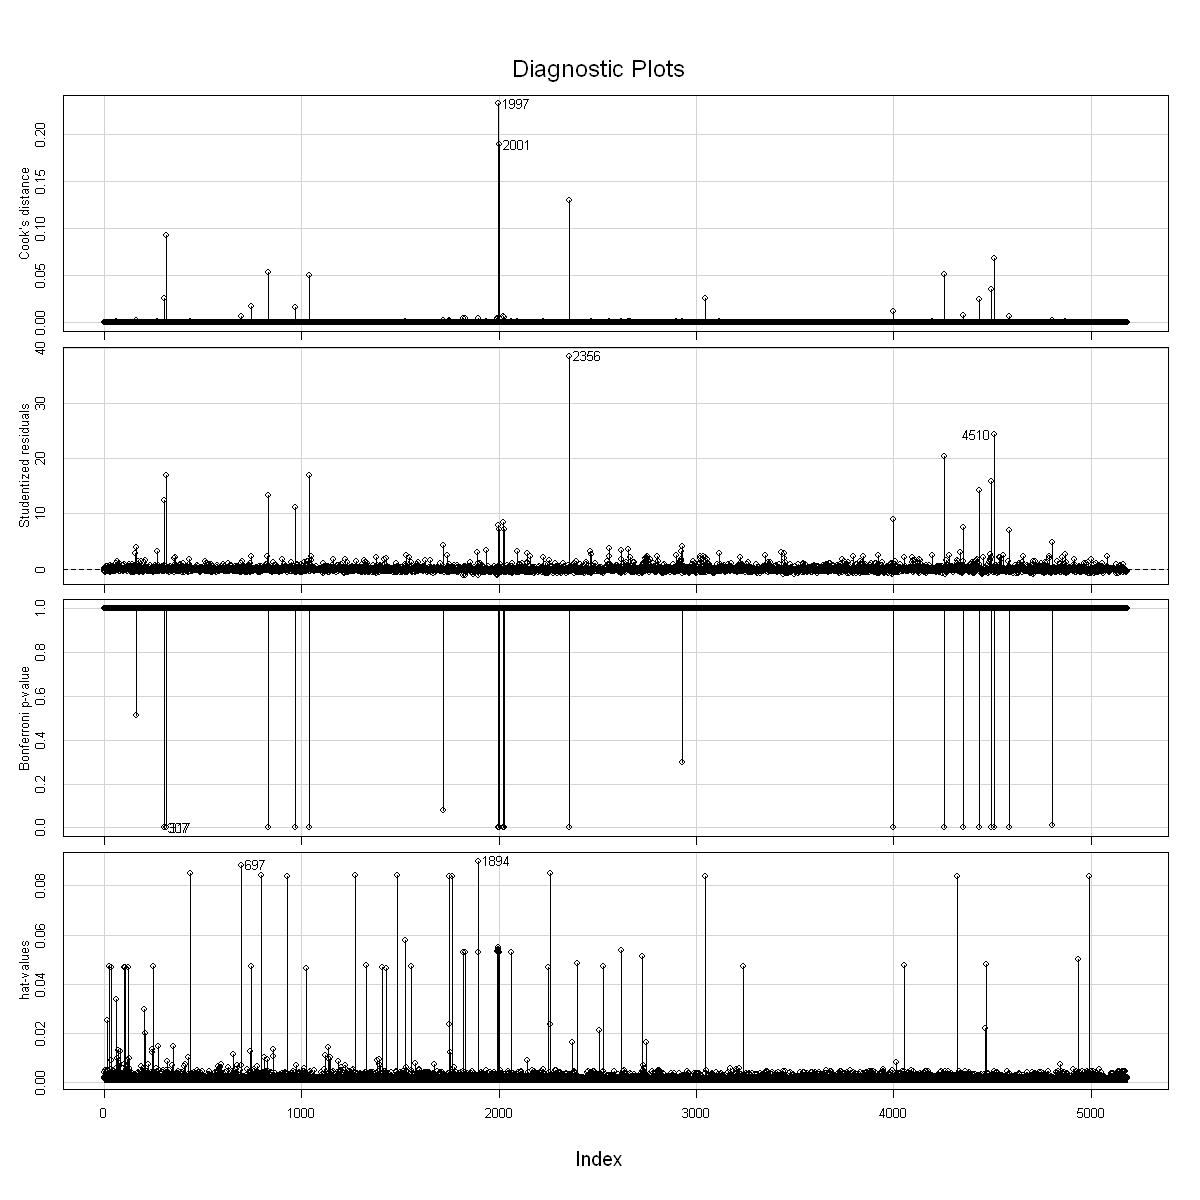

In [53]:
# Vamos ver se existem Elementos Influenciadores 
influenceIndexPlot(fit)

> Verificámos que existem pontos que poderão ser **Influencers**.

In [54]:
# Distância de Cook
cooksd <- cooks.distance(fit)

# Detetar se existem Influenciadores
influential <- as.numeric(names(cooksd)[(cooksd > 4*mean(cooksd, na.rm=T))])

# Visualizar os Influenciadores
head(db_clean[influential, ])

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,license
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>
62,41,East Boston,Private room,144,1,1100,4,327,0
166,113,South Boston,Entire home/apt,1299,91,105,1,0,0
268,189,West Boston,Private room,1010,91,33,1,89,0
307,216,West Boston,Entire home/apt,3800,3,1,1,0,0
317,220,Center Boston,Entire home/apt,5000,91,343,2,0,0
438,304,Harbor Islands,Entire home/apt,421,7,1,1,56,0


> A **Distância de Cook** indica qual o impacto sobre a regressão de cada ***outlier***.

> Geralmente, as observações que tem uma **distância de Cook** maior que $4\times(média)$, podem ser clasificados como ***influenciadores***.

> Todas as observações com os índices identificados na tabela **`influential`** iremos retirar do *dataset*, criando um novo, **`db_model`**.

In [55]:
# Antes de eliminar
nrow(db_clean)

# Eliminar os Outliers influencers e criar um novo data.frame, db_model
db_model <- db_clean[-influential, ]

# Confirmação
nrow(db_clean) - nrow(as.data.frame(influential))
nrow(db_model)

[1] 5182

[1] 5125

[1] 5125

### ⚙️  Processamento dos Dados

In [56]:
rownames(db_model) <- c(1:nrow(db_model))
names(db_model)

[1] "host_id"                        "neighbourhood"                 
[3] "room_type"                      "price"                         
[5] "minimum_nights"                 "number_of_reviews"             
[7] "calculated_host_listings_count" "availability_365"              
[9] "license"

> Retirámos a variável **`availability_365`** e as linhas referentes às **`Harbor Islands`** da variável **`neighbourhood`**, uma vez que não foram **estatísticamente significativas** para o modelo, e apenas existem 12 observações de anúncios na região de **`Harbor Islands`**.

In [57]:
# Retirar a variável availability_365
db_model <- db_model[-c(8)]

In [58]:
# Variável Neighbourhood - factor para chr  
db_model$neighbourhood <- as.character(db_model$neighbourhood)
db_model <- as.data.frame(db_model)

db_model[db_model$neighbourhood == 'Harbor Islands', ]

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,license
,<int>,<chr>,<fct>,<int>,<int>,<int>,<int>,<dbl>
787,504,Harbor Islands,Private room,50,1,225,1,0
920,574,Harbor Islands,Entire home/apt,342,3,63,1,0
1261,754,Harbor Islands,Private room,175,1,59,1,0
1473,864,Harbor Islands,Private room,60,30,1,1,0
1748,996,Harbor Islands,Entire home/apt,299,3,6,1,0
1875,1062,Harbor Islands,Entire home/apt,137,1,573,1,0
2226,1210,Harbor Islands,Entire home/apt,205,1,321,1,0
4273,1685,Harbor Islands,Entire home/apt,271,3,2,1,0
4935,1815,Harbor Islands,Entire home/apt,332,2,0,1,0


> Verificamos apenas 9 das 12 observações que continham **`Harbor Islands`** como **`neighbourhood`** pois as restantes 3 foram eliminadas anterioremnte, uma vez que foram identificadas como ***outliers***.

In [59]:
# Apagar o termo "Harbor Islands"
db_model[db_model$neighbourhood == 'Harbor Islands', ] <- NA

In [60]:
# chr para factor novamente, e confirmação dos novos níveis
db_model$neighbourhood <- as.factor(db_model$neighbourhood)
levels(db_model$neighbourhood)

[1] "Center Boston" "East Boston"   "North Boston"  "South Boston" 
[5] "West Boston"

In [61]:
# Eliminar NAs
db_model <- na.omit(db_model)
nrow(db_model) # Não há NAs para eliminar

# Homogenizar os índices das linhas sem os NAs
rownames(db_model) <- c(1:nrow(db_model))

[1] 5116

## 📈 Fit 2

In [62]:
# Fit 2 - Modelo de Regressão Linear Múlipla para a base de dados sem outliers
#         e sem as variáveis não significativas
fit2 <- lm(price ~., data = db_model)
summary(fit2)


Call:
lm(formula = price ~ ., data = db_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-271.36  -73.63  -21.28   37.23  928.10 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     2.911e+02  7.004e+00  41.563  < 2e-16 ***
host_id                         1.008e-02  3.875e-03   2.600  0.00934 ** 
neighbourhoodEast Boston       -8.351e+01  8.168e+00 -10.223  < 2e-16 ***
neighbourhoodNorth Boston      -3.497e+01  7.643e+00  -4.575 4.88e-06 ***
neighbourhoodSouth Boston      -6.758e+01  4.946e+00 -13.663  < 2e-16 ***
neighbourhoodWest Boston       -4.978e+01  5.343e+00  -9.317  < 2e-16 ***
room_typeHotel room             2.157e+02  7.483e+01   2.883  0.00395 ** 
room_typePrivate room          -1.360e+02  4.102e+00 -33.142  < 2e-16 ***
room_typeShared room           -1.732e+02  2.852e+01  -6.073 1.35e-09 ***
minimum_nights                 -6.024e-01  6.088e-02  -9.895  < 2e-16 ***
number_of_reviews            

[1] 7.056584e-15


	studentized Breusch-Pagan test

data:  fit2
BP = 299.07, df = 12, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit2
LM test = 87.625, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit2$residuals
X-squared = 22485, df = 2, p-value < 2.2e-16


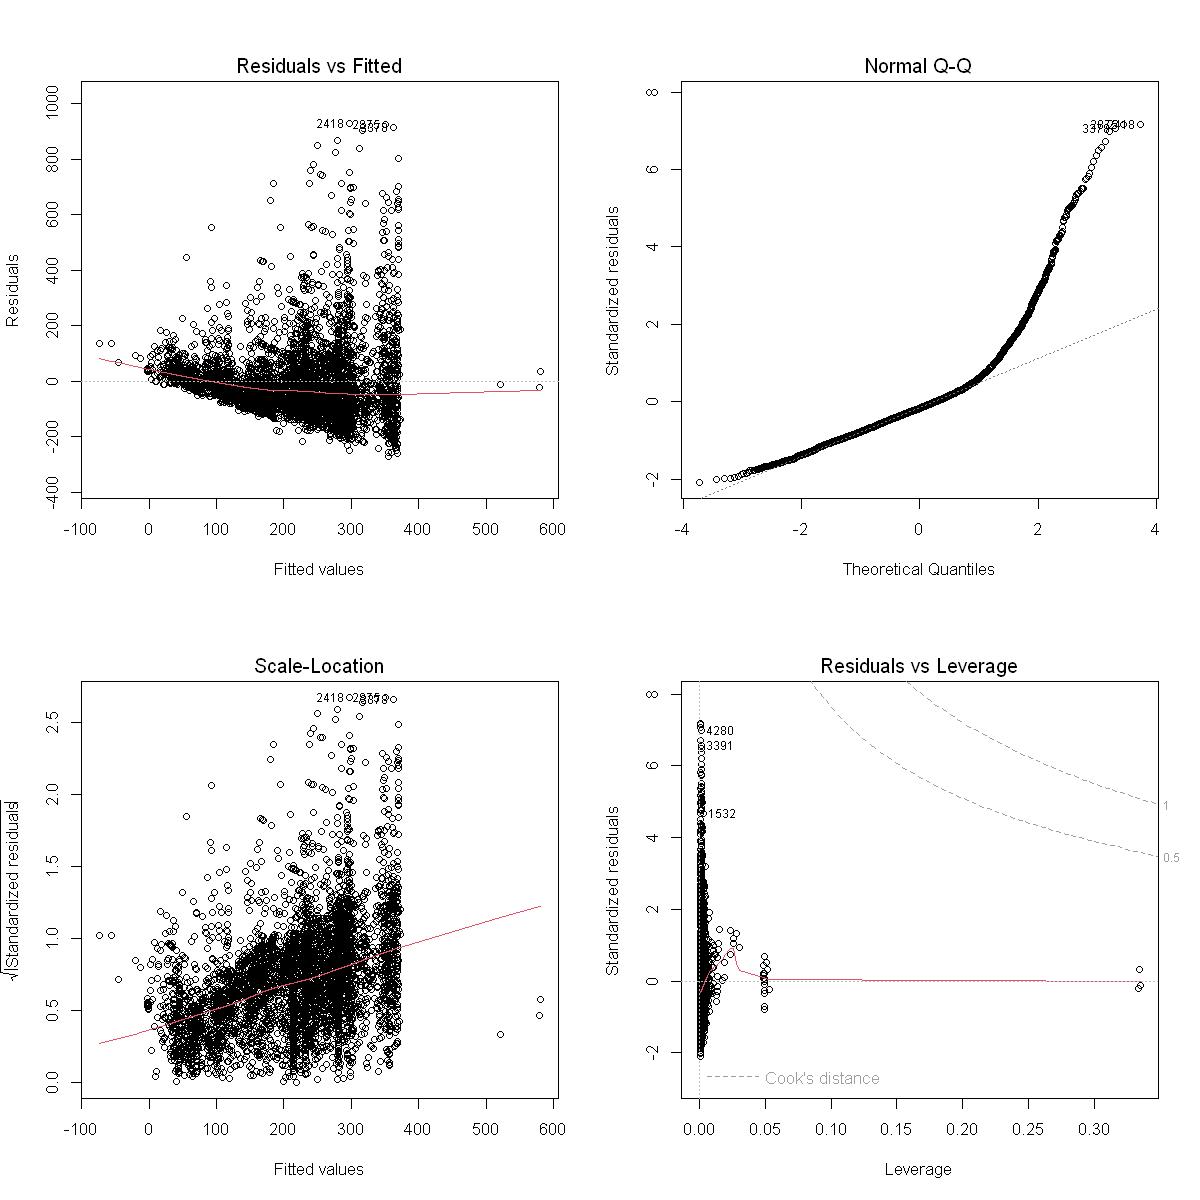

In [63]:
# Verificação dos Pressupostos dos Resíduos (Testes e Gráficos)
mean(fit2$residuals)              # Média Nula
bptest(fit2)                      # Variância Constante
bgtest(fit2)                      # Ausência de Correlação
jarque.bera.test(fit2$residuals)  # Distribuição Normal

# Representação Gráfica sobre os Resíduos
par(mfrow=c(2,2)) 
plot(fit2)

**Considerando a enumeração:**

<table style="border:1px;margin-left:auto; margin-right:auto;">
<tr>
<th style="width:100px"><b><c>Gráfico 1</c></b></th>
<th style="width:100px"><b><c>Gráfico 2</c></b></th>
</tr>
<tr>
<td><c>Linearidade</c></td>
<td><c>Normalidade</c></td>
</table>

<table style="border:1px;margin-left:auto; margin-right:auto;">
<tr>
<th style="width:100px"><b><c>Gráfico 3</c></b></th>
<th style="width:100px"><b><c>Gráfico 4</c></b></th>
</tr>
<tr>
<td><c>Variância</c></td>
<td><c>Outliers</c></td>
</table>

- **`Gráfico 1`**: Não linearidade / Dependência dos Resíduos (**Teste Breusch-Godfrey** - $H_0$: Resíduos Independentes)

- **`Gráfico 2`**: Destribuição não normal. (**Teste Jarque Bera** - $H_0$: Distribuição Normal)

- **`Gráfico 3`**: Apresenta *funilidade* - logo a variância varia (não cumpre os requesitos do OLS) (**Teste Breusch-Pagan** - $H_0$: Erros Homocedásticos)

- **`Gráfico 4`**: Verificamos a existência de $3$ ***outliers*** significativos

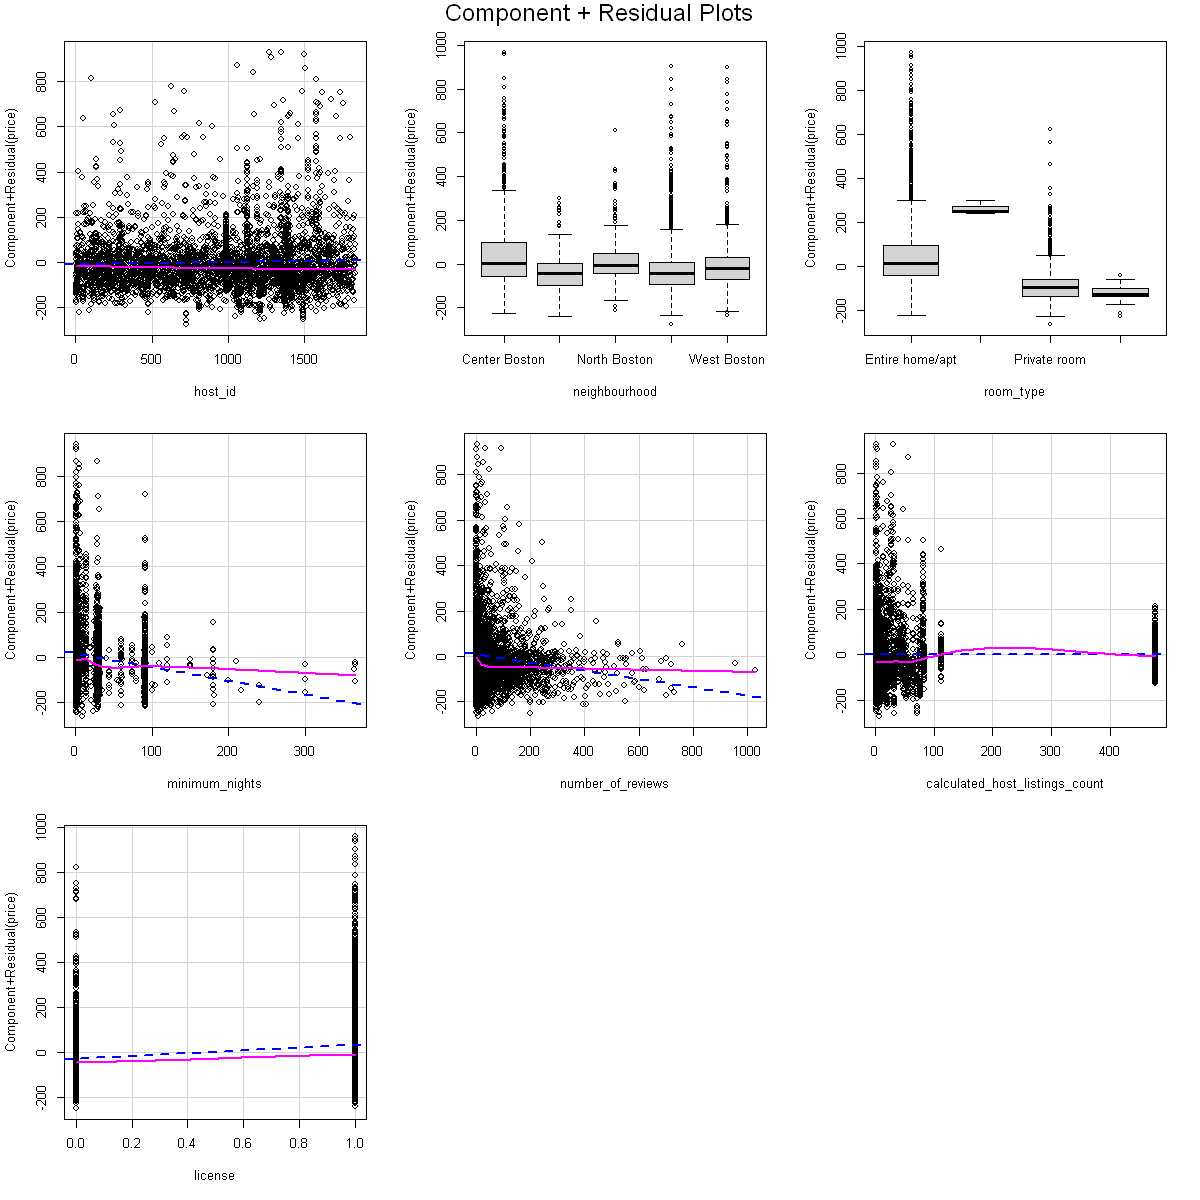

In [64]:
crPlots(fit2)

> Através da análise dos gráficos dados pela função **`crPlots`** observa-se a existência de um elevado número de *outliers* nos *boxplots* e de alguma não linearidade nas variáveis contínuas, pelo que iremos

- Adicionar na experiência abaixo o logaritmo na variável **`Price`**, tendo por base a análise gráfica dos histogramas; 

- E um termo de não-linearidade na variável **`minimum_nights`** que consideramos ser aquela onde o padrão não-linear nos resíduos (curvatura) é mais expressivo.

## 📈 Fit 3

In [65]:
# Fit 3 | Adicionámos um termo de não-linearidade na variável minimum_nights
#         e logaritmizámos o preço e o calculated_host_listings_count
fit3 <- lm(log(price) ~ host_id + neighbourhood + room_type +
            number_of_reviews + poly(minimum_nights, 3, raw=FALSE) +
            log(calculated_host_listings_count) + license, data = db_model)
summary(fit3)


Call:
lm(formula = log(price) ~ host_id + neighbourhood + room_type + 
    number_of_reviews + poly(minimum_nights, 3, raw = FALSE) + 
    log(calculated_host_listings_count) + license, data = db_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.99468 -0.30302 -0.03684  0.27566  2.06497 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            5.454e+00  2.676e-02 203.849  < 2e-16
host_id                                1.550e-05  1.446e-05   1.072    0.284
neighbourhoodEast Boston              -3.169e-01  3.043e-02 -10.413  < 2e-16
neighbourhoodNorth Boston             -1.341e-01  2.859e-02  -4.691 2.78e-06
neighbourhoodSouth Boston             -2.910e-01  1.848e-02 -15.748  < 2e-16
neighbourhoodWest Boston              -1.611e-01  2.004e-02  -8.037 1.13e-15
room_typeHotel room                    5.043e-01  2.762e-01   1.826    0.068
room_typePrivate room                 -8.405e-01  1.500e-02 -

> **Nota:** O $log$ altera a **escala** dos *Erros dos Resíduos*

[1] -4.350764e-17


	studentized Breusch-Pagan test

data:  fit3
BP = 164.27, df = 14, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit3
LM test = 100.3, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit3$residuals
X-squared = 402.84, df = 2, p-value < 2.2e-16


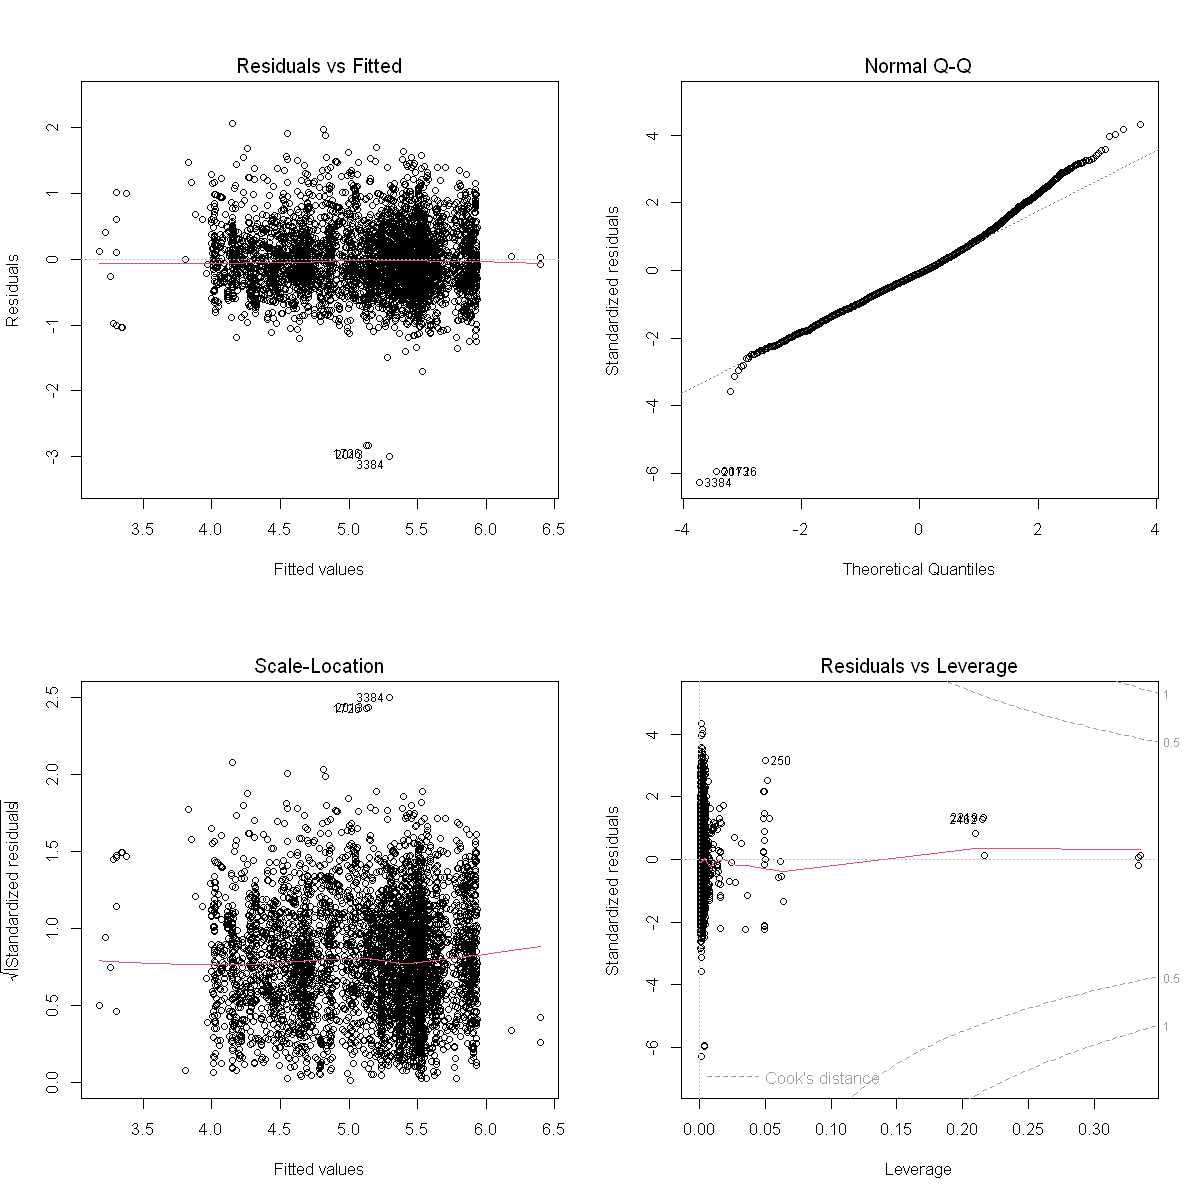

In [66]:
# Verificação dos Pressupostos dos Resíduos (Testes e Gráficos)
mean(fit3$residuals)              # Média Nula
bptest(fit3)                      # Variância Constante
bgtest(fit3)                      # Ausência de Correlação
jarque.bera.test(fit3$residuals)  # Distribuição Normal

# Representação Gráfica sobre os Resíduos
par(mfrow=c(2,2)) 
plot(fit3)

- **`Gráfico 1`**: Não linearidade / Dependência dos Resíduos (**Teste Breusch-Godfrey** - $H_0$: Resíduos Independentes)

- **`Gráfico 2`**: Destribuição não normal. (**Teste Jarque Bera** - $H_0$: Distribuição Normal)

- **`Gráfico 3`**: Não aparenta *funilidade* - porém a variância varia pelo que refere o teste (**Teste Breusch-Pagan** - $H_0$: Erros Homocedásticos)

- **`Gráfico 4`**: Verificamos a existência de ***outliers*** significativos

In [67]:
# Verificar os valores destacados nos gráficos acima
db_model[c(2079,1869,598,2219,2462,4403),]

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,license
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>
2079,1032,South Boston,Private room,382,91,11,5,1
1869,1061,South Boston,Entire home/apt,1148,29,6,57,1
598,376,South Boston,Private room,323,91,15,3,1
2219,1209,South Boston,Entire home/apt,250,365,0,1,1
2462,1286,South Boston,Entire home/apt,198,365,0,1,0
4403,1712,West Boston,Entire home/apt,190,364,0,1,0


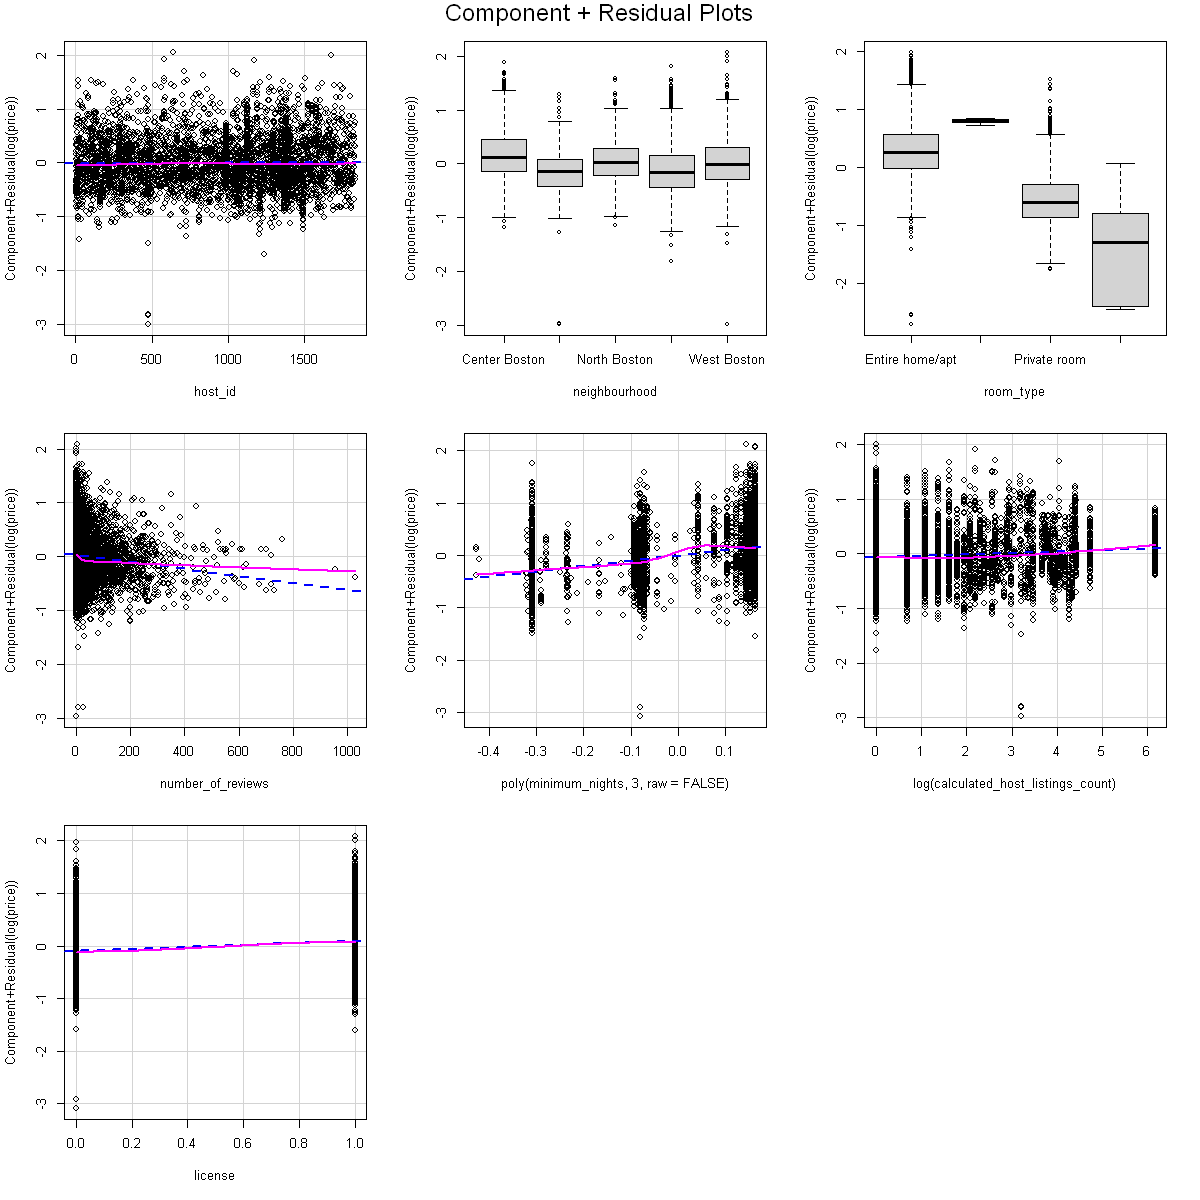

In [68]:
# Gráficos com a componente resídual de cada variável
crPlots(fit3)

> Os ***outliers* não aparentam ser influenciador**, portanto não os vamos eliminar da base de dados.

> Observamos uma **não linearidade** na variável **`number_of_reviews`**, através de um padrão não-linear nos resíduos (curvatura)

> É de notar que o fator **`Hotel room`** da variável **`room_type`**, e da variável **`host_id`** são **estatísticamente não significativas**. Assim iremos proceder à sua eliminação.

### ⚙️  Processamento dos Dados

In [69]:
# Retirar a variável host_id do data.frame db_model
db_model_2 <- db_model[-1]

In [70]:
# Ver os fatores da variável room_type
levels(db_model_2$room_type)

[1] "Entire home/apt" "Hotel room"      "Private room"    "Shared room"

In [71]:
# Variável Room_Type - factor para chr  
db_model_2$room_type <- as.character(db_model_2$room_type)
db_model_2 <- as.data.frame(db_model_2)

db_model_hotel_room <- db_model[db_model$room_type == 'Hotel room', ]
db_model_hotel_room

,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,license
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>
1963,1106,Center Boston,Hotel room,616,1,1,13,1
1964,1106,Center Boston,Hotel room,509,1,326,13,1
1965,1106,Center Boston,Hotel room,557,1,6,13,1


In [72]:
# Apagar o fator "Hotel room"
db_model_2[db_model_2$room_type == 'Hotel room', ] <- NA

In [73]:
# chr para factor novamente, e confirmação dos novos níveis
db_model_2$room_type <- as.factor(db_model_2$room_type)
levels(db_model_2$room_type)

[1] "Entire home/apt" "Private room"    "Shared room"

In [74]:
# Eliminar NAs
db_model_2 <- na.omit(db_model_2)
nrow(db_model_2) # Não há NAs para eliminar

# Homogenizar os índices das linhas sem os NAs
rownames(db_model_2) <- c(1:nrow(db_model_2))

[1] 5113

## 📈 Fit 4

In [75]:
# Fit 4 | Adicionámos um termo de não-linearidade 
#         (para a variável number_of_reviews)
fit4 <- lm(log(price) ~ neighbourhood + room_type +
           poly(number_of_reviews, 3, raw=FALSE) +
           poly(minimum_nights, 3, raw=FALSE) +
           log(calculated_host_listings_count) + license, data = db_model_2)
summary(fit4)


Call:
lm(formula = log(price) ~ neighbourhood + room_type + poly(number_of_reviews, 
    3, raw = FALSE) + poly(minimum_nights, 3, raw = FALSE) + 
    log(calculated_host_listings_count) + license, data = db_model_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.01503 -0.30742 -0.03532  0.27424  2.05385 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                5.449379   0.021059 258.769  < 2e-16
neighbourhoodEast Boston                  -0.322486   0.030349 -10.626  < 2e-16
neighbourhoodNorth Boston                 -0.130996   0.028526  -4.592 4.49e-06
neighbourhoodSouth Boston                 -0.291401   0.018410 -15.829  < 2e-16
neighbourhoodWest Boston                  -0.161117   0.019989  -8.060 9.42e-16
room_typePrivate room                     -0.845481   0.014983 -56.428  < 2e-16
room_typeShared room                      -1.698019   0.105126 -16.152  < 2e-16
poly(number_of_reviews,

[1] -5.585157e-18


	studentized Breusch-Pagan test

data:  fit4
BP = 189.75, df = 14, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit4
LM test = 99.672, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit4$residuals
X-squared = 383.61, df = 2, p-value < 2.2e-16


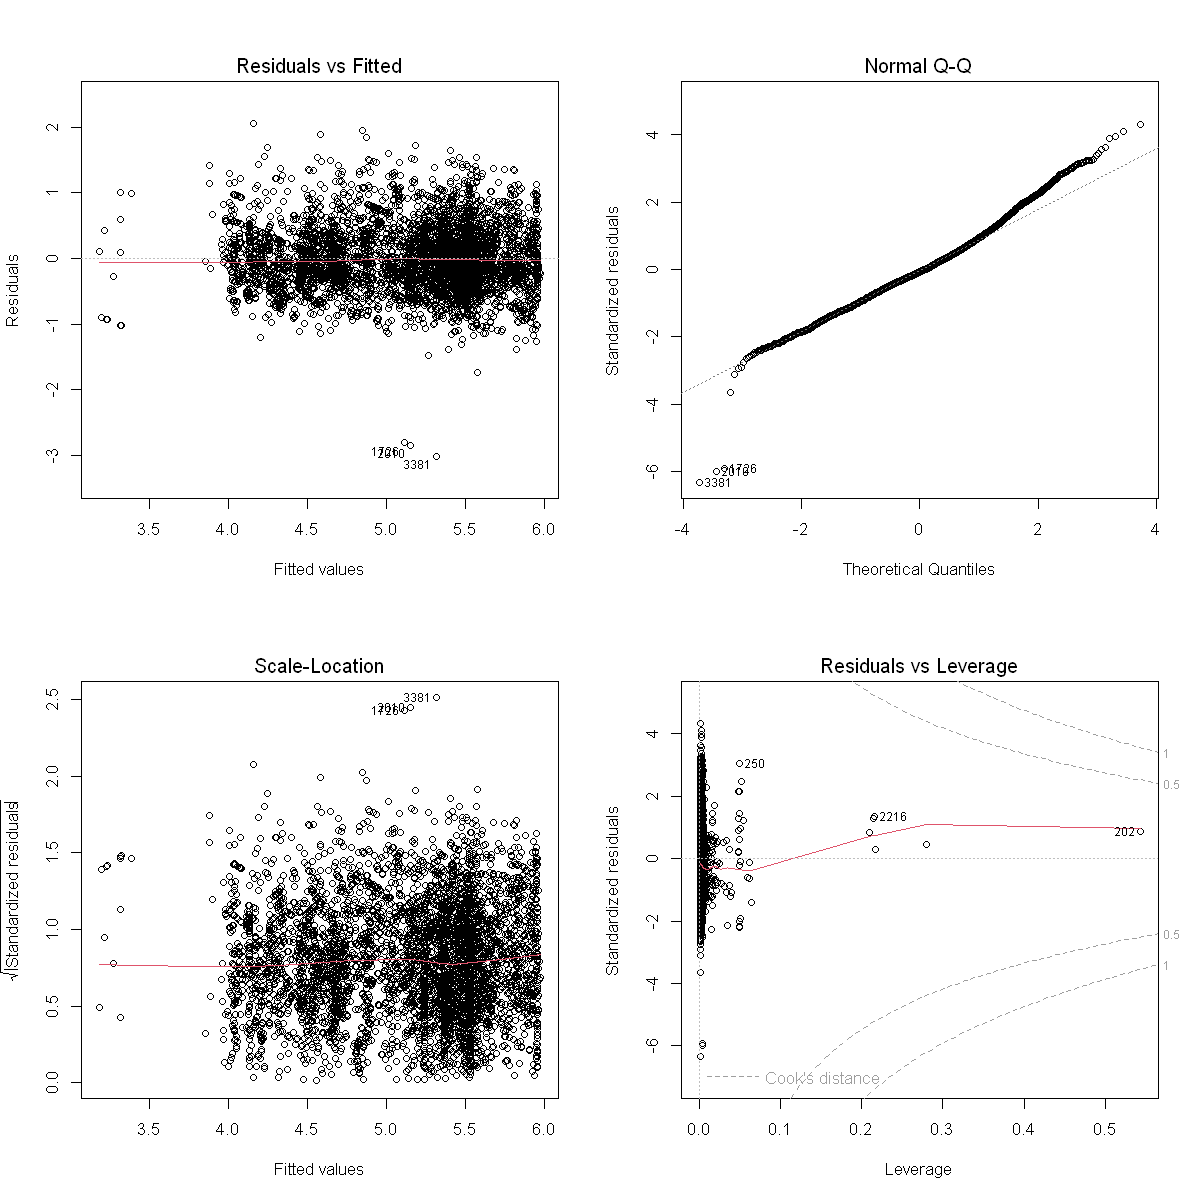

In [76]:
# Verificação dos Pressupostos dos Resíduos (Testes e Gráficos)
mean(fit4$residuals)              # Média Nula
bptest(fit4)                      # Variância Constante
bgtest(fit4)                      # Ausência de Correlação
jarque.bera.test(fit4$residuals)  # Distribuição Normal

# Representação Gráfica sobre os Resíduos
par(mfrow=c(2,2)) 
plot(fit4)

In [77]:
# Verificar os valores destacados nos gráficos acima
db_model_2[c(250,202,2216, 3381),]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,license
,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>
250,South Boston,Shared room,200,1,5,1,1
202,East Boston,Entire home/apt,137,1,1029,4,0
2216,South Boston,Entire home/apt,250,365,0,1,1
3381,West Boston,Entire home/apt,10,30,3,25,0


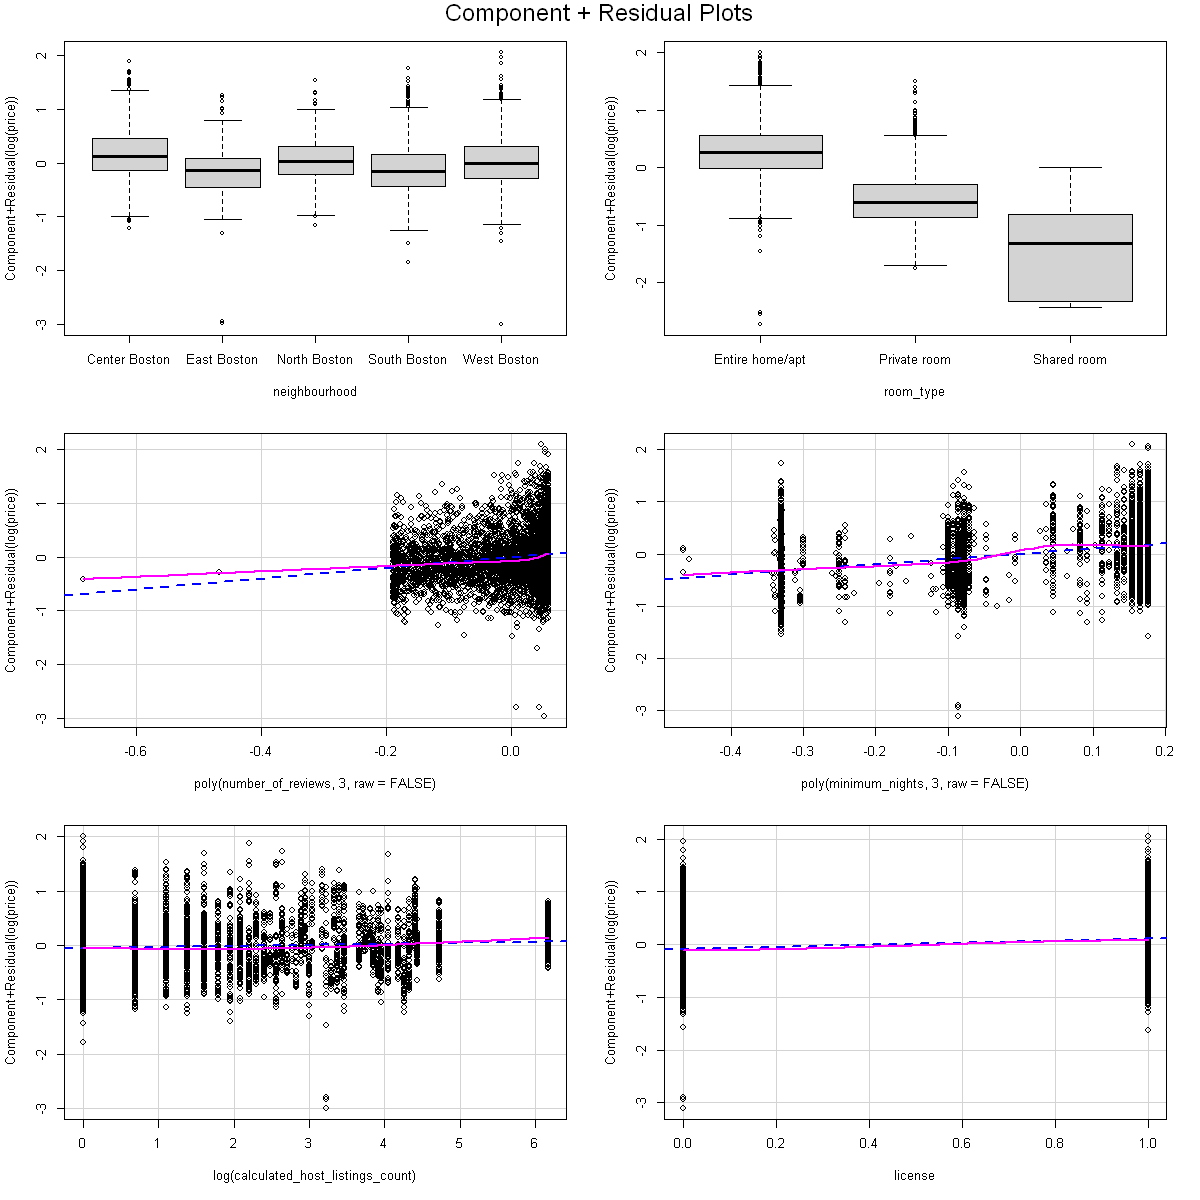

In [78]:
crPlots(fit4)

> Mesmo colocando outro termo não linear e retirando as variáveis **estatisticamente não significativas** não ocorreram melhorias, nem a nível de pressupostos, nem a nível das métricas do modelo

> Como pode ser observado, após a eliminação de vários ***outliers*** e transformação de algumas variáveis, ainda não conseguimos corrigir a heterocedasticidade, nem a normalidade dos resíduos, nem a correlação entre eles.

> Assim, iremos proceder a tentativas de modelos que utilizam o **Método de Estimação dos Mínimos Quadrados com Pesos (*WLS*)**

## 📈 Fit 5

> Vamos tentar estabilizar a variância usando técnicas diferentes, nomeadamente, estimar os parâmetros com o **WLS com pesos** (*Weighted LS*)

In [79]:
# Definimos os pesos - Termo que vai dividir os dois lados da equação
N <- length(db_model_2$price) # Pesos

# Modelo de Regressão - para adicionar os pesos usamos a opção "weights=..."
fit_c_pesos <- lm(log(price) ~ neighbourhood + room_type +
                  poly(number_of_reviews, 3, raw=FALSE) +
                  poly(minimum_nights, 3, raw=FALSE) +
                  log(calculated_host_listings_count) + license, 
                  data = db_model_2,
                  weights = 1/((1:N)^0.5))
summary(fit_c_pesos)


Call:
lm(formula = log(price) ~ neighbourhood + room_type + poly(number_of_reviews, 
    3, raw = FALSE) + poly(minimum_nights, 3, raw = FALSE) + 
    log(calculated_host_listings_count) + license, data = db_model_2, 
    weights = 1/((1:N)^0.5))

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-0.58675 -0.04761 -0.00245  0.04135  0.48421 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                5.488461   0.020881 262.843  < 2e-16
neighbourhoodEast Boston                  -0.356958   0.031907 -11.187  < 2e-16
neighbourhoodNorth Boston                 -0.139429   0.027921  -4.994 6.12e-07
neighbourhoodSouth Boston                 -0.317897   0.018884 -16.834  < 2e-16
neighbourhoodWest Boston                  -0.175168   0.020232  -8.658  < 2e-16
room_typePrivate room                     -0.793978   0.014688 -54.056  < 2e-16
room_typeShared room                      -2.215836   0.074170 -

[1] 0.003358267


	studentized Breusch-Pagan test

data:  fit_c_pesos
BP = 37.491, df = 14, p-value = 0.0006214



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit_c_pesos
LM test = 99.672, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit_c_pesos$residuals
X-squared = 332.56, df = 2, p-value < 2.2e-16


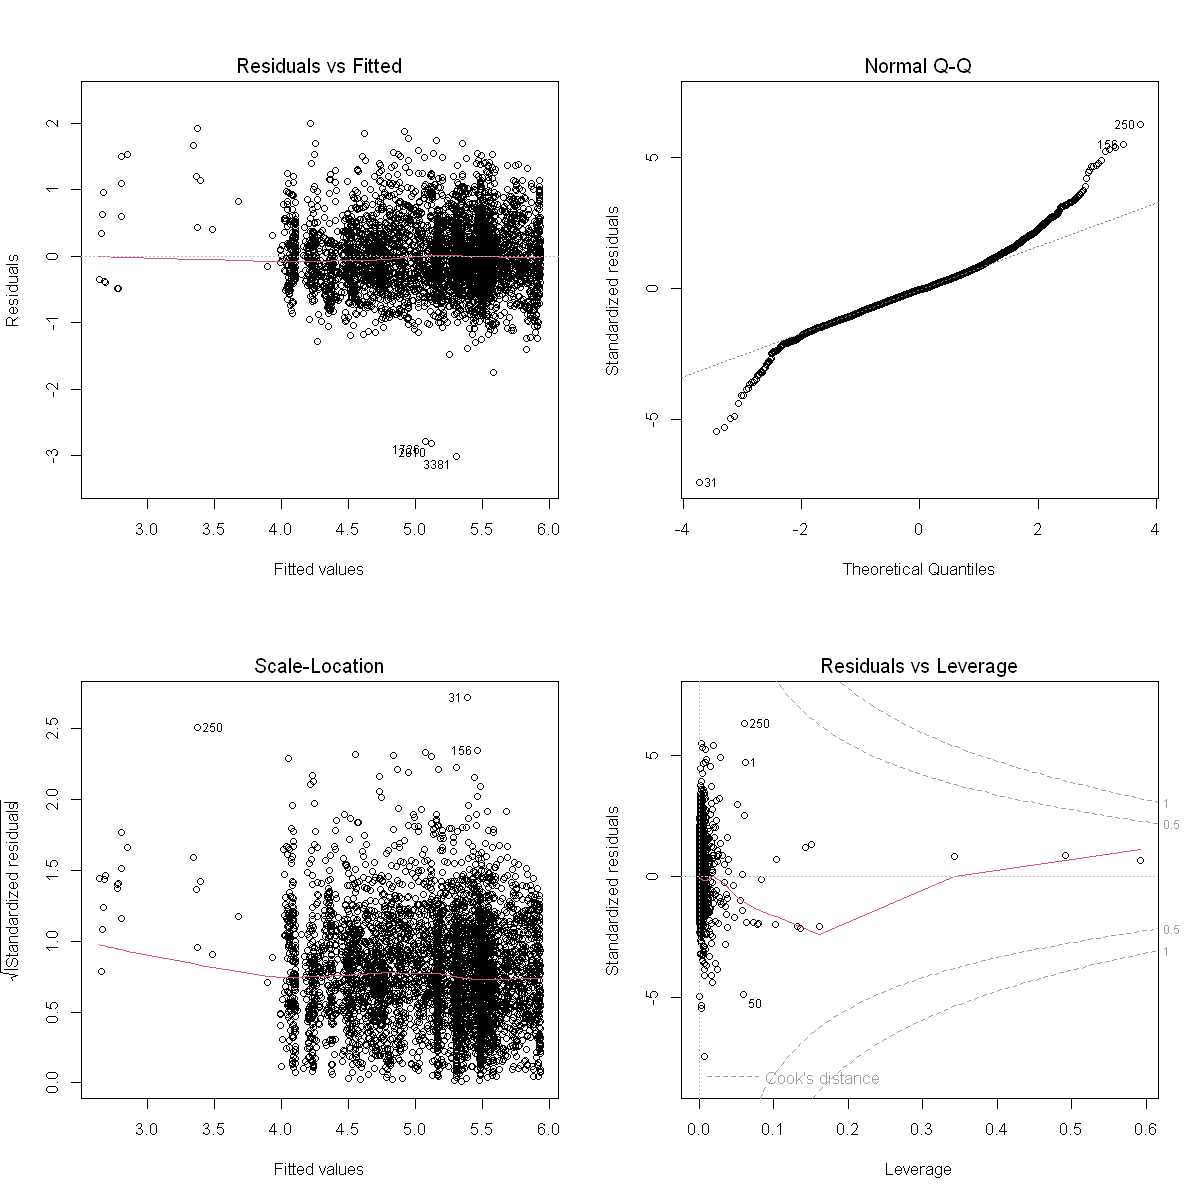

In [80]:
# Verificação dos Pressupostos dos Resíduos (Testes e Gráficos)
mean(fit_c_pesos$residuals)              # Média Nula
bptest(fit_c_pesos)                      # Variância Constante
bgtest(fit_c_pesos)                      # Ausência de Correlação
jarque.bera.test(fit_c_pesos$residuals)  # Distribuição Normal

# Representação Gráfica sobre os Resíduos
par(mfrow=c(2,2)) 
plot(fit_c_pesos)

> Verificamos uma ligeira melhoria no **Teste de Breusch-Pagan** (relativo à variância) e nas métricas do modelo ($R^2$, *Erros Residuais*,...). 

> Em contrapartida a média dos resídos já não é tão acentadamente nula.

## 📈 Fit 6

In [81]:
# Alterando os pesos usados
h <- sqrt(fit4$residuals^2)

# Modelo de Regressão - para adicionar os pesos usamos a opção "weights=..."
fit_c_pesos_2 <- lm(log(price) ~ neighbourhood + room_type +
                    poly(number_of_reviews, 3, raw=FALSE) +
                    poly(minimum_nights, 3, raw=FALSE) +
                    log(calculated_host_listings_count) + license,
                    data = db_model_2,
                    weights = 1/h)

summary(fit_c_pesos_2)


Call:
lm(formula = log(price) ~ neighbourhood + room_type + poly(number_of_reviews, 
    3, raw = FALSE) + poly(minimum_nights, 3, raw = FALSE) + 
    log(calculated_host_listings_count) + license, data = db_model_2, 
    weights = 1/h)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.7363 -0.5460 -0.1599  0.5294  1.4387 

Coefficients:
                                           Estimate Std. Error  t value
(Intercept)                                5.437506   0.006929  784.770
neighbourhoodEast Boston                  -0.312426   0.008963  -34.859
neighbourhoodNorth Boston                 -0.122131   0.010260  -11.903
neighbourhoodSouth Boston                 -0.290048   0.005500  -52.740
neighbourhoodWest Boston                  -0.154777   0.006133  -25.237
room_typePrivate room                     -0.846383   0.004675 -181.034
room_typeShared room                      -1.677912   0.069172  -24.257
poly(number_of_reviews, 3, raw = FALSE)1  -4.444595   0.205897  -21.

[1] 0.004050793


	studentized Breusch-Pagan test

data:  fit_c_pesos_2
BP = 67181, df = 14, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit_c_pesos_2
LM test = 99.672, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit_c_pesos_2$residuals
X-squared = 397.26, df = 2, p-value < 2.2e-16


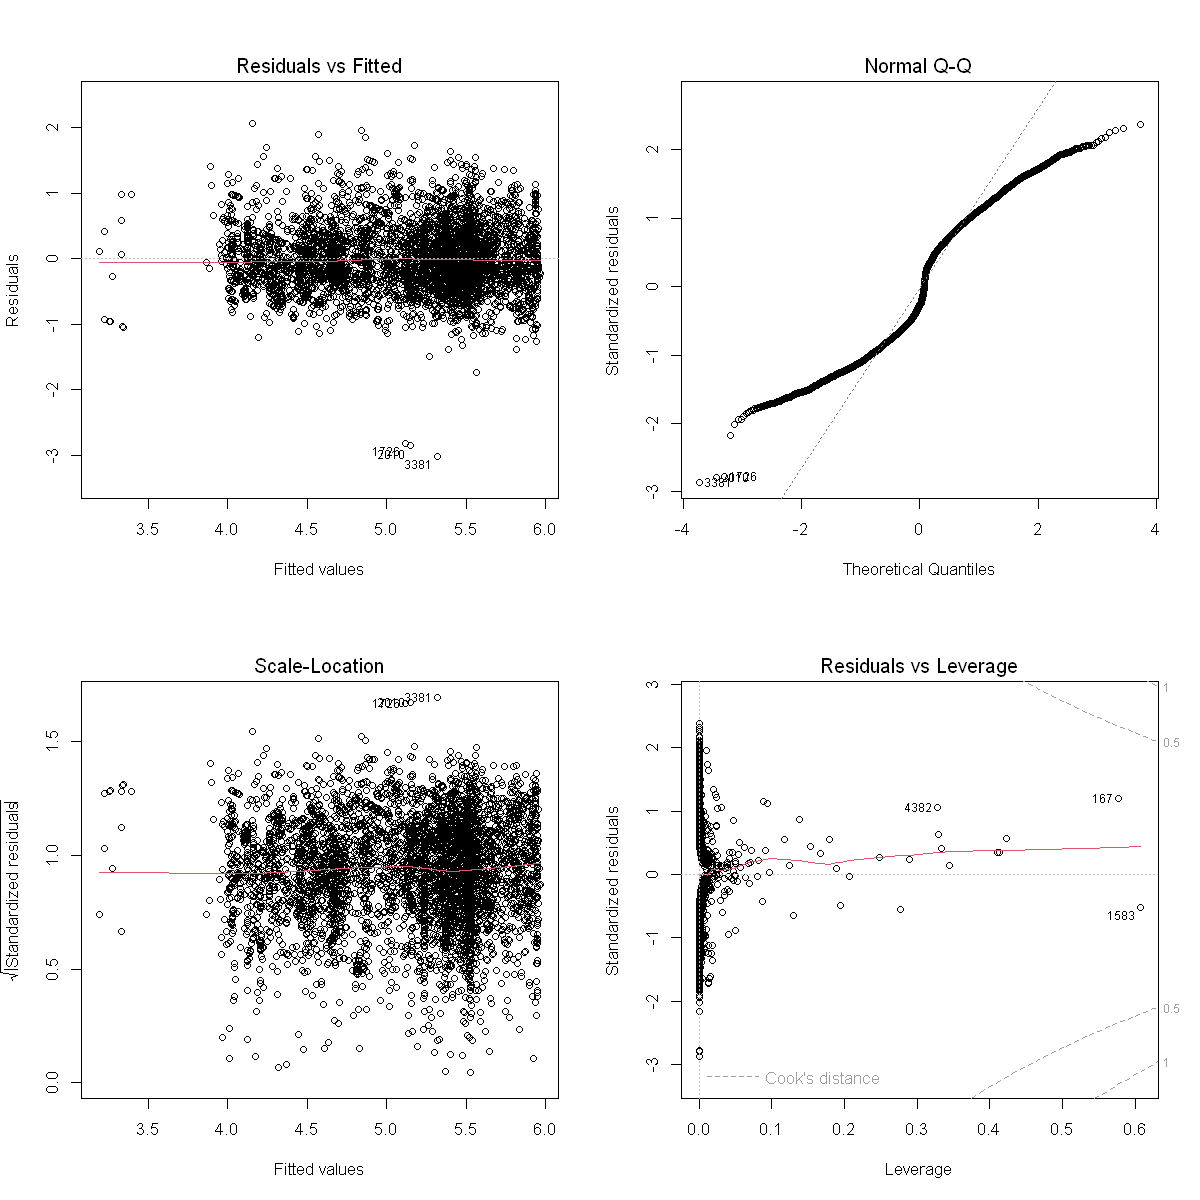

In [82]:
# Verificação dos Pressupostos dos Resíduos (Testes e Gráficos)
mean(fit_c_pesos_2$residuals)              # Média Nula
bptest(fit_c_pesos_2)                      # Variância Constante
bgtest(fit_c_pesos_2)                      # Ausência de Correlação
jarque.bera.test(fit_c_pesos_2$residuals)  # Distribuição Normal

# Representação Gráfica sobre os Resíduos
par(mfrow=c(2,2)) 
plot(fit_c_pesos_2)

> **Não** se verificou melhorias consideráveis

> Vamos tentar eliminar mais *outliers*

In [83]:
# Distância de Cook
cooksd <- cooks.distance(fit_c_pesos_2)

# Detetar se existem influenciadores
influential <- as.numeric(names(cooksd)[(cooksd > 4*mean(cooksd, na.rm=T))])

nrow(db_model_2)- nrow(as.data.frame(influential))

# Visualizar os influenciadores
head(db_model_2[influential, ])

# Eliminar os Outliers influencers
db_model_3 <- db_model_2[-influential, ]

nrow(db_model_3)

[1] 5043

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,license
,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>
16,North Boston,Private room,78,2,954,1,0
26,North Boston,Shared room,10,91,134,7,0
36,North Boston,Shared room,10,91,95,7,0
38,North Boston,Shared room,10,91,101,7,0
69,Center Boston,Entire home/apt,195,1,619,13,1
72,Center Boston,Entire home/apt,185,1,729,13,1


[1] 5043

In [84]:
# Eliminar NAs
db_model_3 <- na.omit(db_model_3)

# Homogenizar os índices das linhas sem os NAs
rownames(db_model_3) <- c(1:nrow(db_model_3))

## 📈 Fit 7

In [85]:
# Repetir o Fit 6, mas com menos outliers

# Alterando os pesos usado
fit4 <- lm(log(price) ~ neighbourhood + room_type +
           poly(number_of_reviews, 3, raw=FALSE) +
           poly(minimum_nights, 3, raw=FALSE) +
           log(calculated_host_listings_count) + license, data = db_model_3)

h <- sqrt(fit4$residuals^2)

# Modelo de Regressão - para adicionar os pesos usamos a opção "weights=..."
fit_c_pesos_3 <- lm(log(price) ~ neighbourhood + room_type +
                    poly(number_of_reviews, 3, raw=FALSE) +
                    poly(minimum_nights, 3, raw=FALSE) +
                    log(calculated_host_listings_count) + license,
                    data = db_model_3,
                    weights = 1/h)

summary(fit_c_pesos_3)


Call:
lm(formula = log(price) ~ neighbourhood + room_type + poly(number_of_reviews, 
    3, raw = FALSE) + poly(minimum_nights, 3, raw = FALSE) + 
    log(calculated_host_listings_count) + license, data = db_model_3, 
    weights = 1/h)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.7299 -0.5340 -0.1637  0.5280  1.4231 

Coefficients:
                                           Estimate Std. Error  t value
(Intercept)                                5.433068   0.008072  673.069
neighbourhoodEast Boston                  -0.323815   0.010777  -30.048
neighbourhoodNorth Boston                 -0.100383   0.010387   -9.664
neighbourhoodSouth Boston                 -0.287493   0.006776  -42.426
neighbourhoodWest Boston                  -0.145820   0.007422  -19.647
room_typePrivate room                     -0.866662   0.005584 -155.194
poly(number_of_reviews, 3, raw = FALSE)1  -4.485748   0.216173  -20.751
poly(number_of_reviews, 3, raw = FALSE)2   2.585988   0.210729   12.

[1] 0.006340214


	studentized Breusch-Pagan test

data:  fit_c_pesos_3
BP = 39215, df = 13, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit_c_pesos_3
LM test = 101.96, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit_c_pesos_3$residuals
X-squared = 396.23, df = 2, p-value < 2.2e-16


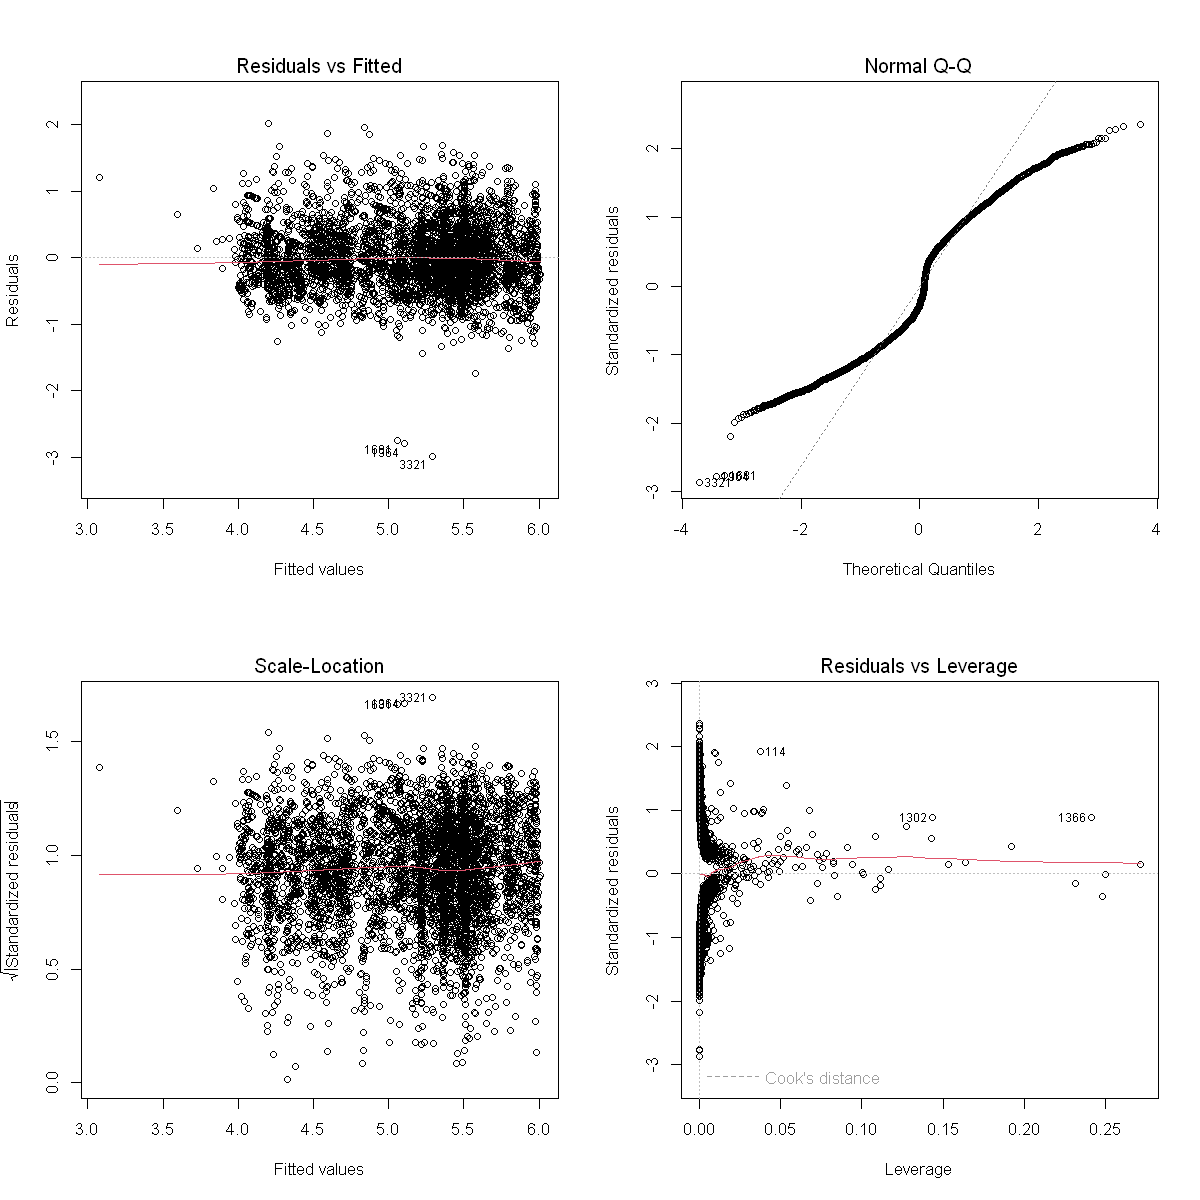

In [86]:
# Verificação dos Pressupostos dos Resíduos (Testes e Gráficos)
mean(fit_c_pesos_3$residuals)              # Média Nula
bptest(fit_c_pesos_3)                      # Variância Constante
bgtest(fit_c_pesos_3)                      # Ausência de Correlação
jarque.bera.test(fit_c_pesos_3$residuals)  # Distribuição Normal

# Representação Gráfica sobre os Resíduos
par(mfrow=c(2,2)) 
plot(fit_c_pesos_3)

> **Piorou** o modelo e os pressupostos. 

## 📈 Fit 8

In [87]:
# Última tentativa, alterando os pesos

# Alterando os pesos usados
resi1 <- fit_c_pesos_3$residuals
varfunc.ols <- lm((resi1^2) ~ ., data = db_model_3)
varfunc1 <- (varfunc.ols$fitted.values)

fit_c_pesos_4 <- lm(log(price) ~ neighbourhood + room_type +
                   poly(number_of_reviews, 3, raw=FALSE) +
                   poly(minimum_nights, 3, raw=FALSE) +
                   log(calculated_host_listings_count) + license,
                   data = db_model_3, 
                   weights = 1/sqrt((varfunc1^8)))

summary(fit_c_pesos_4)


Call:
lm(formula = log(price) ~ neighbourhood + room_type + poly(number_of_reviews, 
    3, raw = FALSE) + poly(minimum_nights, 3, raw = FALSE) + 
    log(calculated_host_listings_count) + license, data = db_model_3, 
    weights = 1/sqrt((varfunc1^8)))

Weighted Residuals:
   Min     1Q Median     3Q    Max 
-33990      3     17     38  23195 

Coefficients:
                                           Estimate Std. Error  t value
(Intercept)                                6.981814   0.121276   57.570
neighbourhoodEast Boston                  -1.013158   0.108180   -9.365
neighbourhoodNorth Boston                 -0.214736   0.006398  -33.564
neighbourhoodSouth Boston                 -0.248843   0.001002 -248.422
neighbourhoodWest Boston                  -0.156414   0.000601 -260.245
room_typePrivate room                     -1.086820   0.353399   -3.075
poly(number_of_reviews, 3, raw = FALSE)1  10.011327   0.158668   63.096
poly(number_of_reviews, 3, raw = FALSE)2   8.322945   0.20230

[1] -1.451076


	studentized Breusch-Pagan test

data:  fit_c_pesos_4
BP = 9.5384e+13, df = 13, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit_c_pesos_4
LM test = 101.96, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit_c_pesos_4$residuals
X-squared = 75944, df = 2, p-value < 2.2e-16


Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


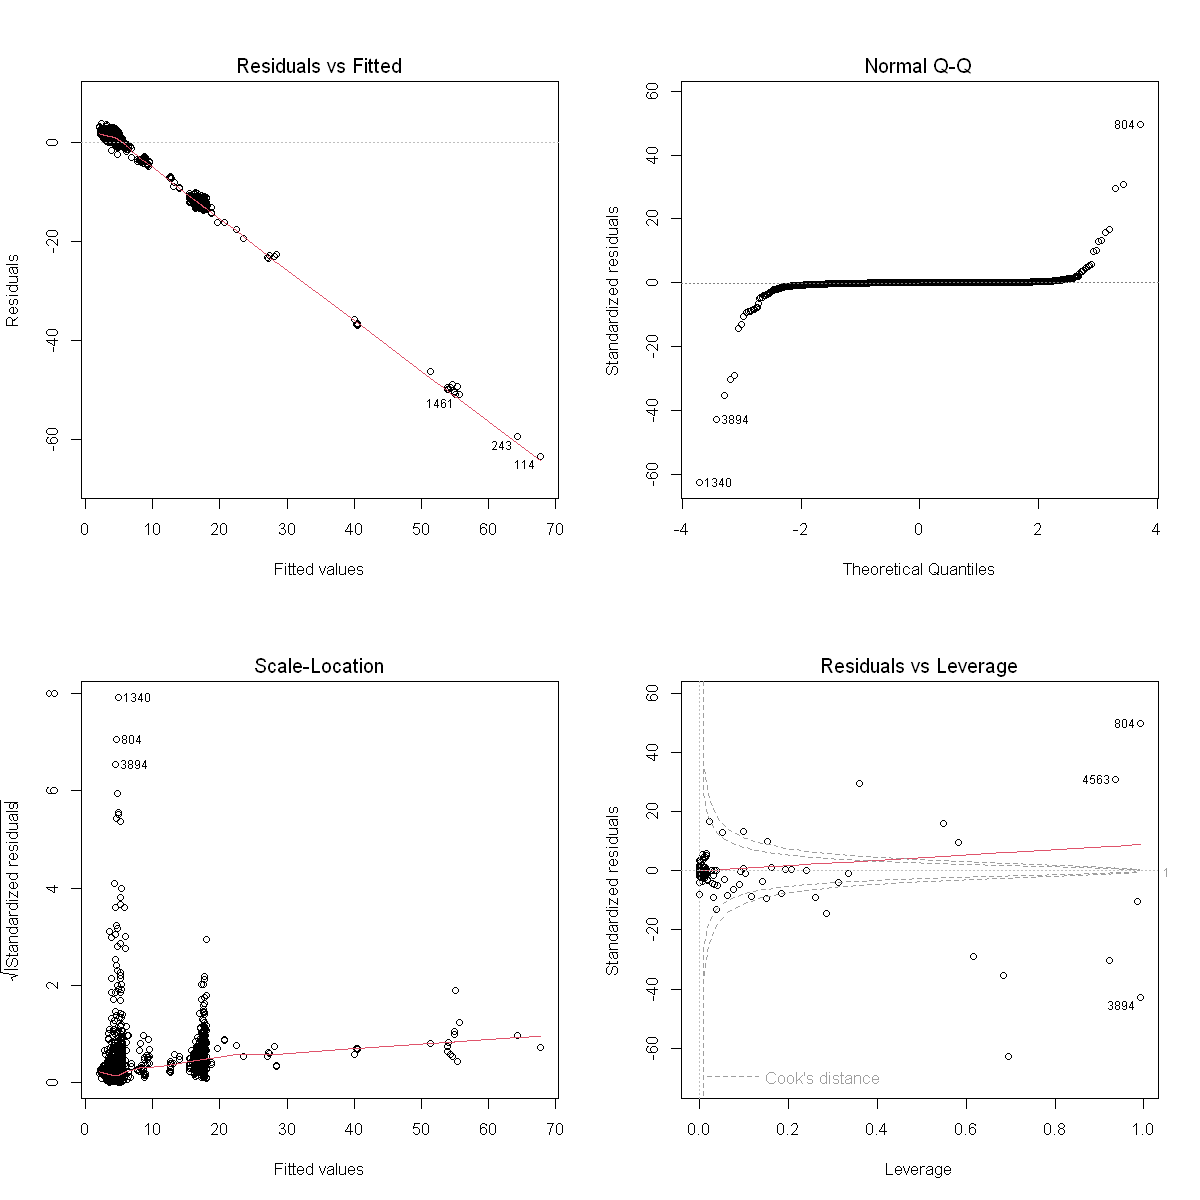

In [88]:
# Verificação dos Pressupostos dos Resíduos (Testes e Gráficos)
mean(fit_c_pesos_4$residuals)              # Média Nula
bptest(fit_c_pesos_4)                      # Variância Constante
bgtest(fit_c_pesos_4)                      # Ausência de Correlação
jarque.bera.test(fit_c_pesos_4$residuals)  # Distribuição Normal

# Representação Gráfica sobre os Resíduos
par(mfrow=c(2,2)) 
plot(fit_c_pesos_4)

> Alterando o peso e utilizando o *dataset* com **menos *outliers*** não resolveu os pressupostos.

> Verifica-se que não basta apenas uma métrica para avaliar o modelo pois, apesar do $R^2$ ser quase perfeito, o modelo é péssimo, dado que tem erros residuais altíssimos.

## 🔮 Previsão *in-sample*

> Vamos prosseguir para **previsão** e **avaliação da performance da previsão** (erros de previsão)


- Note-se que o pressuposto de ausência de correlação nos resíduos é fundamental na qualidade da previsão, pelo que prevemos de antemão que a qualidade da previsão será reduzida para os modelos em estudo

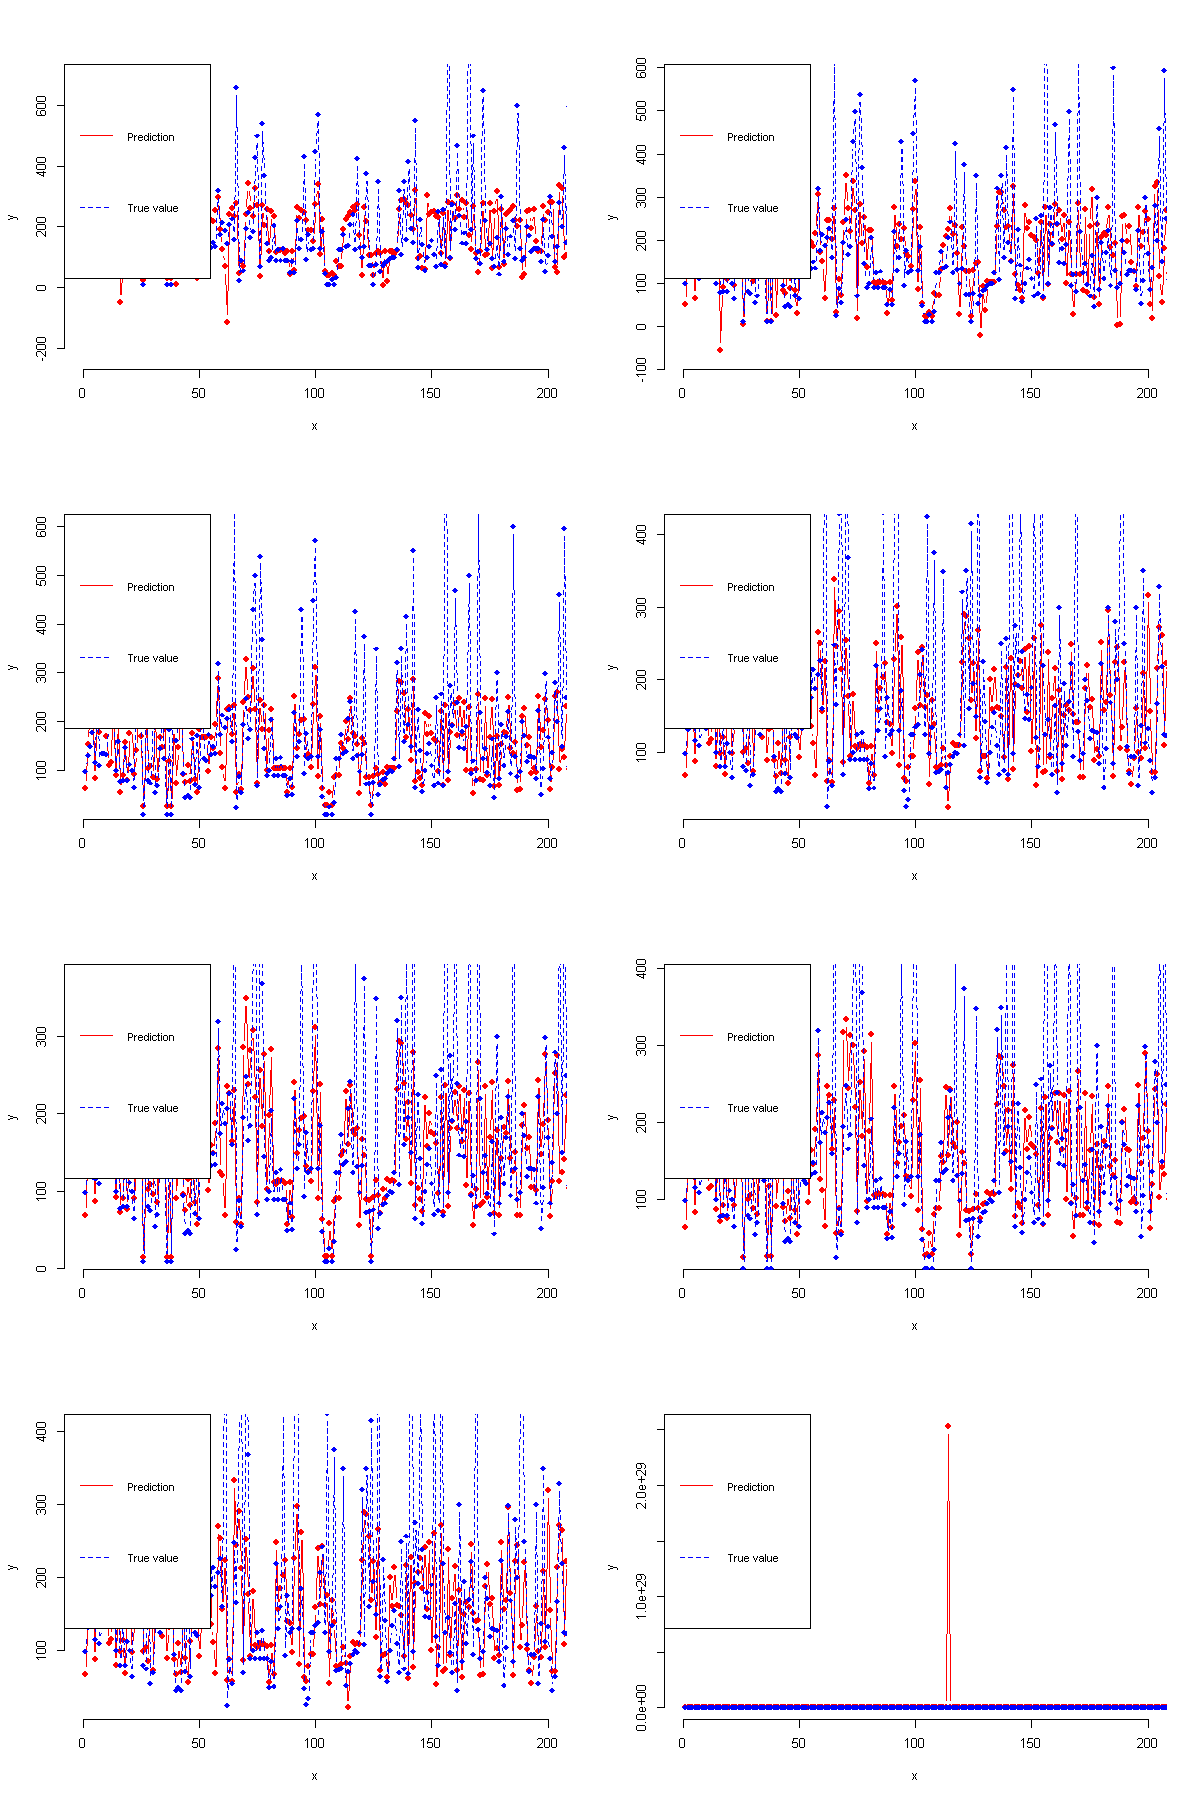

In [89]:
# Plot numa matriz 4*2
options(repr.plot.width = 10, repr.plot.height = 15)
par(mfrow = c(4, 2))

# ------------------------------ Fit 1  --------------------------------------
# Gráfico comparativo entre o Valor Verdadeiro e o Valor Predito e MAPE 
pr1 <-predict(fit, db_clean)
plot(pr1, type = "b", frame = FALSE, pch = 19, 
     col = "red", xlab = "x", ylab = "y", xlim=c(0,200))
lines(db_clean$price, pch = 18, col = "blue", 
      type = "b", lty = 2, xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), 
       col=c("red", "blue"), lty = 1:2, cex=0.8)

# Erro de Previsão 
actual1<-db_clean$price
prediction1 <- (fit$fitted.values)
n<-length(db_clean$price)
MAPE1 <- (1/n) * sum(abs((actual1 - prediction1)/actual1))
# ----------------------------------------------------------------------------

# ------------------------------ Fit 2  --------------------------------------
# Gráfico comparativo entre o Valor Verdadeiro e o Valor Predito e MAPE 
pr2 <-predict(fit2, db_model)
plot(pr2, type = "b", frame = FALSE, pch = 19, 
     col = "red", xlab = "x", ylab = "y",xlim=c(0,200))
lines(db_model$price, pch = 18, col = "blue", 
      type = "b", lty = 2, xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), 
       col=c("red", "blue"), lty = 1:2, cex=0.8)

# Erro de Previsão
actual2<-db_model$price
prediction2 <- (fit2$fitted.values)
n<-length(db_model$price)
MAPE2 <- (1/n) * sum(abs((actual2 - prediction2)/actual2))
# ----------------------------------------------------------------------------

# ------------------------------ Fit 3  --------------------------------------
# Gráfico comparativo entre o Valor Verdadeiro e o Valor Predito e MAPE 
pr3 <-predict(fit3,db_model)
plot(exp(pr3), type = "b", frame = FALSE, pch = 19, 
     col = "red", xlab = "x", ylab = "y",xlim=c(0,200))
lines(db_model$price, pch = 18, col = "blue", 
      type = "b", lty = 2, xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), 
       col=c("red", "blue"), lty = 1:2, cex=0.8)

# Erro de Previsão
actual3<-db_model$price
prediction3 <- exp(fit3$fitted.values)
n<-length(db_model$price)
MAPE3 <- (1/n) * sum(abs((actual3 - prediction3)/actual3))
# ----------------------------------------------------------------------------

# ------------------------------ Fit 4  --------------------------------------
# Gráfico comparativo entre o Valor Verdadeiro e o Valor Predito e MAPE 
pr4 <-predict(fit4,db_model_3)
plot(exp(pr4), type = "b", frame = FALSE, pch = 19, 
     col = "red", xlab = "x", ylab = "y",xlim=c(0,200))
lines(db_model_3$price, pch = 18, col = "blue", 
      type = "b", lty = 2, xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), 
       col=c("red", "blue"), lty = 1:2, cex=0.8)

# Erro de Previsão
actual4<-db_model_3$price
prediction4 <- exp(fit4$fitted.values)
n<-length(db_model_3$price)
MAPE4 <- (1/n) * sum(abs((actual4 - prediction4)/actual4))
# ----------------------------------------------------------------------------


# ------------------------------ Fit 5  --------------------------------------
pr5 <-predict(fit_c_pesos, db_model_2)
plot(exp(pr5), type = "b", frame = FALSE, pch = 19, 
     col = "red", xlab = "x", ylab = "y", xlim=c(0,200))
lines(db_model_2$price, pch = 18, col = "blue", 
      type = "b", lty = 2, xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), 
       col=c("red", "blue"), lty = 1:2, cex=0.8)

# Erro de Previsão
actual5<-db_model_2$price
prediction5 <- (fit_c_pesos$fitted.values)
n<-length(db_model_2$price)
MAPE5 <- (1/n) * sum(abs((actual5 - prediction5)/actual5))
# ----------------------------------------------------------------------------


# ------------------------------ Fit 6  --------------------------------------
pr6 <-predict(fit_c_pesos_2,db_model_2)
plot(exp(pr6), type = "b", frame = FALSE, pch = 19, 
     col = "red", xlab = "x", ylab = "y",xlim=c(0,200))
lines(db_model_2$price, pch = 18, col = "blue", 
      type = "b", lty = 2, xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), 
       col=c("red", "blue"), lty = 1:2, cex=0.8)

# Erro de Previsão
actual6<-db_model_2$price
prediction6 <- exp(fit_c_pesos_2$fitted.values)
n<-length(db_model_2$price)
MAPE6 <- (1/n) * sum(abs((actual6 - prediction6)/actual6))
# ----------------------------------------------------------------------------

# ------------------------------ Fit 7  --------------------------------------
pr7 <-predict(fit_c_pesos_3, db_model_3)
plot(exp(pr7), type = "b", frame = FALSE, pch = 19, 
     col = "red", xlab = "x", ylab = "y",xlim=c(0,200))
lines(db_model_3$price, pch = 18, col = "blue", 
      type = "b", lty = 2, xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), 
       col=c("red", "blue"), lty = 1:2, cex=0.8)

# Erro de Previsão
actual7<-db_model_3$price
prediction7 <- exp(fit_c_pesos_3$fitted.values)
n<-length(db_model_3$price)
MAPE7 <- (1/n) * sum(abs((actual7 - prediction7)/actual7))
# ----------------------------------------------------------------------------

# ------------------------------ Fit 8  --------------------------------------
pr8 <-predict(fit_c_pesos_4,db_model_3)
plot(exp(pr8), type = "b", frame = FALSE, pch = 19, 
     col = "red", xlab = "x", ylab = "y",xlim=c(0,200))
lines(db_model_3$price, pch = 18, col = "blue", 
      type = "b", lty = 2, xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), 
       col=c("red", "blue"), lty = 1:2, cex=0.8)

# Erro de Previsão
actual8<-db_model_3$price
prediction8 <- exp(fit_c_pesos_4$fitted.values)
n<-length(db_model_3$price)
MAPE8 <- (1/n) * sum(abs((actual8 - prediction8)/actual8))
# ----------------------------------------------------------------------------

> Todos os gráficos apresentam oscilações entre os valores verdadeiros e os preditos.

> Tal como referimos, o **`fit_c_pesos_3`** é pessímo apesar do elevado $R^2$, o que se verifica no último gráfico.

# 📑 Resumo dos Resultados | Comparação dos Fits

> Vamos fazer um resumo dos resultados obtidos, comparando **Erro Residual**, o $R^2$, o **AIC**, o **BIC** e o **MAPE** 

In [90]:
# Data.Frame (Fit, Erros Residuais, R^2 , AIC, BIC e MAPE)
fits <- c("fit1","fit2","fit3","fit4","fit_c_pesos","fit_c_pesos_2","fit_c_pesos_3","fit_c_pesos_4")

AIC <- round(c(AIC(fit), AIC(fit2), AIC(fit3), AIC(fit4), AIC(fit_c_pesos), 
         AIC(fit_c_pesos_2), AIC(fit_c_pesos_3), AIC(fit_c_pesos_4)),0)

BIC <- round(c(BIC(fit), BIC(fit2), BIC(fit3), BIC(fit4), BIC(fit_c_pesos), 
         BIC(fit_c_pesos_2), BIC(fit_c_pesos_3), BIC(fit_c_pesos_4)),0)

Erros_Residuais <-round(c(summary(fit)$sigma, summary(fit2)$sigma, 
               summary(fit3)$sigma, summary(fit4)$sigma, 
               summary(fit_c_pesos)$sigma, summary(fit_c_pesos_2)$sigma, 
               summary(fit_c_pesos_3)$sigma, summary(fit_c_pesos_4)$sigma),3)

R_quadrado <- round(c(summary(fit)$r.squared, summary(fit2)$r.squared, 
               summary(fit3)$r.squared,summary(fit4)$r.squared, 
               summary(fit_c_pesos)$r.squared, summary(fit_c_pesos_2)$r.squared, 
               summary(fit_c_pesos_3)$r.squared, summary(fit_c_pesos_4)$r.squared),3)

MAPE <- round(c(MAPE1,MAPE2,MAPE3,MAPE4,MAPE5,MAPE6,MAPE7,7.11e+23),3)

table3 <- data.frame(fits, Erros_Residuais, R_quadrado, AIC, BIC, MAPE)

ftable_3 <- flextable(head(table3))

ftable_3 <- bg(ftable_3, bg = "#ce2029", part = "header")
ftable_3 <- color(ftable_3, color = "white", part = "header")
ftable_3 <- bold(ftable_3, bold = TRUE, part="header")
ftable_3 <- set_header_labels(ftable_3,
                              fits = 'Modelo',
                              Erros_Residuais = 'Erro Residual',
                              R_quadrado = 'R Quadrado',
                              AIC = 'AIC',
                              BIC = 'BIC',
                              MAPE = 'MAPE')

ftable_3 <- autofit(ftable_3) # -> Ver output no RStudio
# ftable_3
table3 

fits,Erros_Residuais,R_quadrado,AIC,BIC,MAPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit1,289.922,0.106,73483,73588,5.75e-01
fit2,129.387,0.345,64290,64381,5.05e-01
fit3,0.478,0.554,6974,7079,3.89e-01
fit4,0.473,0.553,6778,6876,3.85e-01
fit_c_pesos,0.079,0.565,7899,8004,9.63e-01
fit_c_pesos_2,0.605,0.928,1876,1981,3.86e-01
fit_c_pesos_3,0.603,0.900,1888,1986,3.82e-01
fit_c_pesos_4,979.989,0.999,47340,47438,7.11e+23


> Em suma, o **melhor modelo** que cumpre, globalmente, todas as métricas da melhor forma possível é o **`fit_c_pesos_2`**, no qual salientamos, que na previsão *in-sample* apresenta um erro de apenas 38,6%, o que comparativamente com os restantes, e tendo em conta que são dados reais, é promissor.

---

# ⚖️ Ponto de Situação

> Apesar de todo o trabalho, os resíduos permaneceram heterocedásticos, não normalmente distribuídos, e dependentes. Assim os estimadores dos mínimos quadrados continuam a ser centrados e consistentes, mas deixam de ser eficientes.

> Iremos seguir para o **Conjunto de Treino** e **Teste**, com um modelo mais claro e concreto à questão problema com o objetivo de chegarmos a uma interpretação e análise mais direcionada e próxima da realidade. 

# 🧠  Conjunto de Treino e Conjunto de Teste

> Para estudar o poder preditivo fora de amostra, isto é *out-of-sample*, vamos dividir a amostra em dois conjuntos: **Conjunto de Treino** ($90\%$ dos dados) e **Conjunto de Teste** ($10\%$ dos dados)

- Vamos treinar a regressão sobre o **Conjunto de Treino** - o modelo de regressão não "conhece" os valores do **Conjunto de Teste**.

- Iremos prever $k$ valores *out-of-sample* (sendo $k$ o nº de elementos do **Conjunto de Teste**) usando o modelo de regressão treinado sobre o **Conjunto de Treino**

- Os valores preditos são depois comparados com os valores verdadeiros do conjunto de teste, calculando o **MAPE** (*Mean Absolute Percentage Error*) que ilustra a verdadeira capacidade de generalização/previsão *out-of-sample* do modelo da regressão.


> Optámos então pelo estudo do preço através das variáveis **`neighbourhood`**, **`room_type`**, **`minimum_nights`** e **`license`**, restringido às zona de **`Center`**, **`South`** e **`West Boston`**; e às tipologias **`Entire home/apt`** e **`Private room`**, uma vez que eram as opções com maior número de observações na base de dados.

In [91]:
# Criamos um novo data.frame com base no db_clean
db_model_final <- db_clean[-c(1,6,7,8)]

# Variável Room_Type e Neighbourhood - factor para chr  
db_model_final$room_type <- as.character(db_model_final$room_type)
db_model_final$neighbourhood <- as.character(db_model_final$neighbourhood)
db_model_final <- as.data.frame(db_model_final)

# Restringir às zonas de South Boston e Center Boston (as que têm mais obs.)
#               e aos room_type de Entire home/apt e Private room
db_model_final <- db_model_final[which(
    db_model_final$neighbourhood == "South Boston" & db_model_final$room_type == "Entire home/apt"|
    db_model_final$neighbourhood == "South Boston" & db_model_final$room_type == "Private room" |
    db_model_final$neighbourhood == "West Boston" & db_model_final$room_type == "Private room" |
    db_model_final$neighbourhood == "West Boston" & db_model_final$room_type == "Entire home/apt" |
    db_model_final$neighbourhood == "Center Boston" & db_model_final$room_type == "Private room" |
    db_model_final$neighbourhood == "Center Boston" & db_model_final$room_type == "Entire home/apt"),]

# chr para factor novamente, e confirmação dos novos níveis
db_model_final$room_type <- as.factor(db_model_final$room_type)
db_model_final$neighbourhood <- as.factor(db_model_final$neighbourhood)

levels(db_model_final$room_type)
levels(db_model_final$neighbourhood)

[1] "Entire home/apt" "Private room"

[1] "Center Boston" "South Boston"  "West Boston"

In [92]:
# Eliminar NAs
db_model_final <- na.omit(db_model_final)

# Homogenizar os índices das linhas sem os NAs
rownames(db_model_final) <- c(1:nrow(db_model_final))
nrow(db_model_final)

# Proporção em % de linhas comparada com o dataset orignal
paste(round((((nrow(db_model_final))/nrow(db))*100),1),"%")

[1] 4368

[1] "84.3 %"

In [93]:
# Primeiras observações do data.frame db_model_final
head(db_model_final)

,neighbourhood,room_type,price,minimum_nights,license
,<fct>,<fct>,<int>,<int>,<dbl>
1,West Boston,Private room,99,91,0
2,South Boston,Entire home/apt,149,3,1
3,South Boston,Entire home/apt,179,3,1
4,West Boston,Entire home/apt,300,2,1
5,Center Boston,Entire home/apt,110,91,0
6,Center Boston,Entire home/apt,135,29,0


> Dado que não houve nunhuma imputação de valores nos **`NAs`**, nem nenhuma transformação que podesse influenciar o conjunto de treino e teste, fizemos a seleção acima realizada, para a base de dado toda, e agora iremos proceder à divisão em **`Conjunto de Treino`** e **`Conjunto de Teste`** 

In [94]:
# Usamos a biblioteca "caTools" para fazer o split (divisão) 
# da amostra em conjunto de treino e teste
set.seed(123)
separar <- sample.split(db_model_final, SplitRatio = 0.90)
train <- db_model_final[separar,]
test <- db_model_final[!(separar),]

In [95]:
# Eliminar NAs do Conjunto de Treino e do Conjunto de Teste
train <- na.omit(train)
test <- na.omit(test)

# Homogenizar os índices das linhas sem os NAs
rownames(train) <- c(1:nrow(train))
rownames(test) <- c(1:nrow(test))

In [96]:
# Verificar o nº de observações de cada conjunto
# Conjunto de Treino
paste("O Conjunto de Treino tem", nrow(train),"observações.")

# Conjunto de Teste
paste("O Conjunto de Teste tem", nrow(test),"observações.")

[1] "O Conjunto de Treino tem 3495 observações."

[1] "O Conjunto de Teste tem 873 observações."

In [97]:
# Confirmação das Variáveis em Estudo
names(db_model_final)

[1] "neighbourhood"  "room_type"      "price"          "minimum_nights"
[5] "license"

## 📉  Modelo Final 1

In [98]:
# Modelo Final - Utilizámos já o log nas variáveis númericas, pois sabemos de
#                antemão que estas são deveras simétricas 
fit_f <- lm(log(price) ~ neighbourhood + room_type + 
            log(minimum_nights) + license ,data = train)
summary(fit_f)


Call:
lm(formula = log(price) ~ neighbourhood + room_type + log(minimum_nights) + 
    license, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7812 -0.3483 -0.0430  0.2745  4.4996 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.786622   0.029291 197.557  < 2e-16 ***
neighbourhoodSouth Boston -0.312020   0.022660 -13.770  < 2e-16 ***
neighbourhoodWest Boston  -0.156084   0.024564  -6.354 2.37e-10 ***
room_typePrivate room     -0.899092   0.019870 -45.248  < 2e-16 ***
log(minimum_nights)       -0.098265   0.006566 -14.966  < 2e-16 ***
license                    0.135244   0.023016   5.876 4.59e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.531 on 3489 degrees of freedom
Multiple R-squared:  0.4989,	Adjusted R-squared:  0.4981 
F-statistic: 694.6 on 5 and 3489 DF,  p-value: < 2.2e-16


[1] -5.188626e-17


	studentized Breusch-Pagan test

data:  fit_f
BP = 4.6473, df = 5, p-value = 0.4604



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit_f
LM test = 73.261, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit_f$residuals
X-squared = 3545.6, df = 2, p-value < 2.2e-16


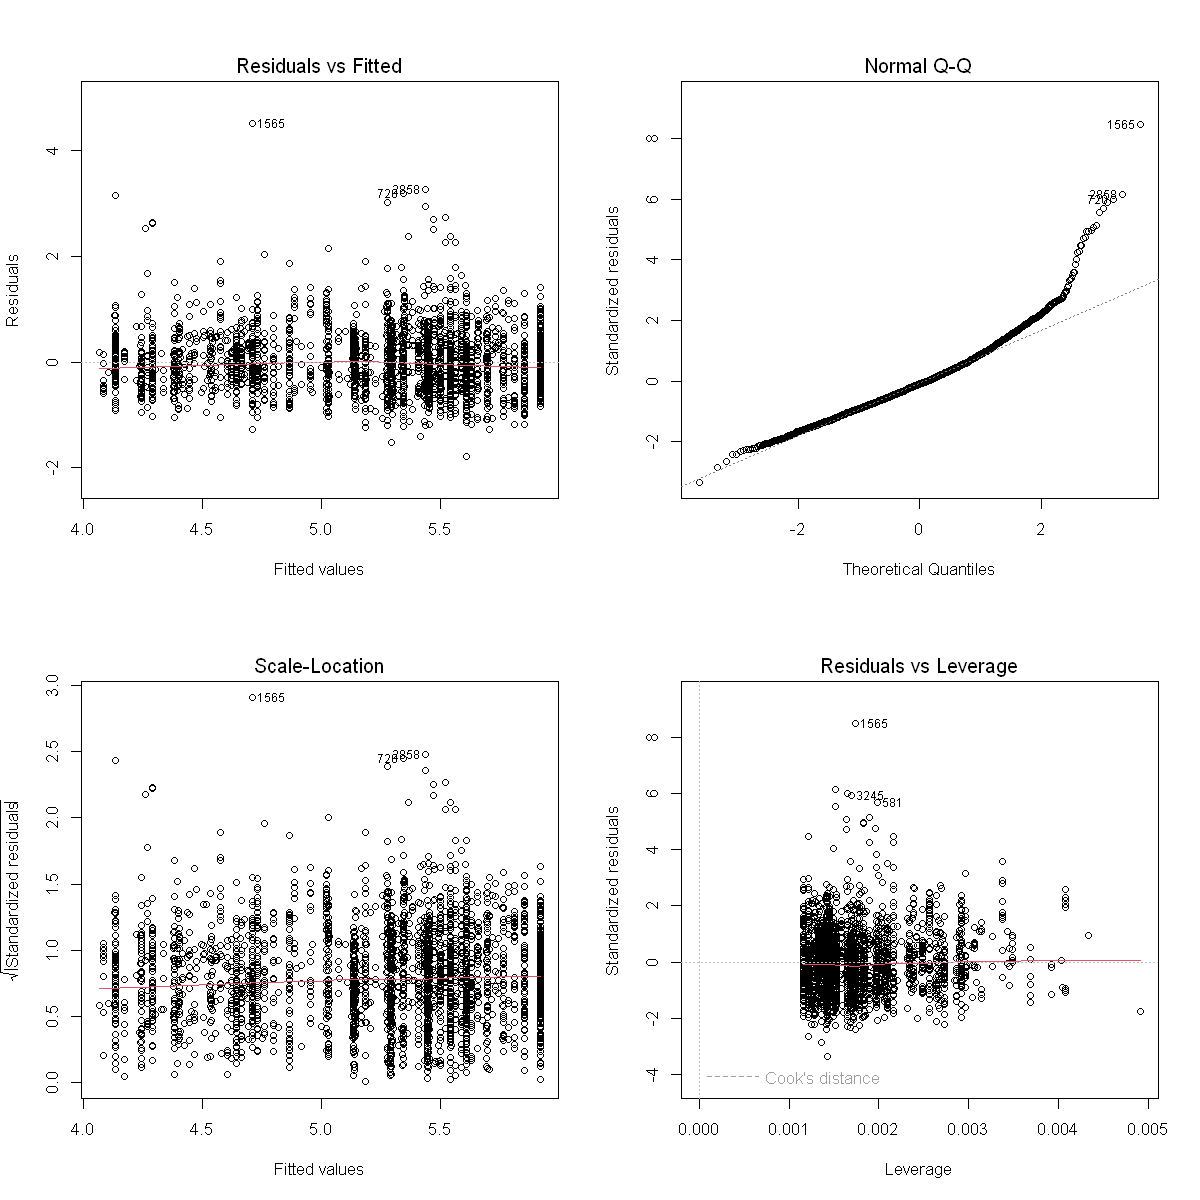

In [99]:
# Verificação dos Pressupostos dos Resíduos (Testes e Gráficos)
mean(fit_f$residuals)              # Média Nula
bptest(fit_f)                      # Variância Constante
bgtest(fit_f)                      # Ausência de Correlação
jarque.bera.test(fit_f$residuals)  # Distribuição Normal

# Representação Gráfica sobre os Resíduos
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(2,2)) 
plot(fit_f)

- **`Gráfico 1`**: Não linearidade / Dependência dos Resíduos (**Teste Breusch-Godfrey** - $H_0$: Resíduos Independentes)

- **`Gráfico 2`**: Destribuição não normal. (**Teste Jarque Bera** - $H_0$: Distribuição Normal)

- **`Gráfico 3`**: Não apresenta *funilidade* $\rightarrow$ Variância Constante (**Teste Breusch-Pagan** - $H_0$: Erros Homocedásticos)

- **`Gráfico 4`**: Verificamos a existência de ***outliers*** significativos

In [100]:
train[c(1565,728,581,3245,2858), ]

,neighbourhood,room_type,price,minimum_nights,license
,<fct>,<fct>,<int>,<int>,<dbl>
1565,South Boston,Private room,10000,1,1
728,South Boston,Private room,86,2,1
581,Center Boston,Entire home/apt,3999,180,0
3245,South Boston,Private room,1433,91,0
2858,West Boston,Entire home/apt,6000,7,0


> Observamos ***outliers*** significativos no **`Price`**, pelo que iremos testar retirá-los.

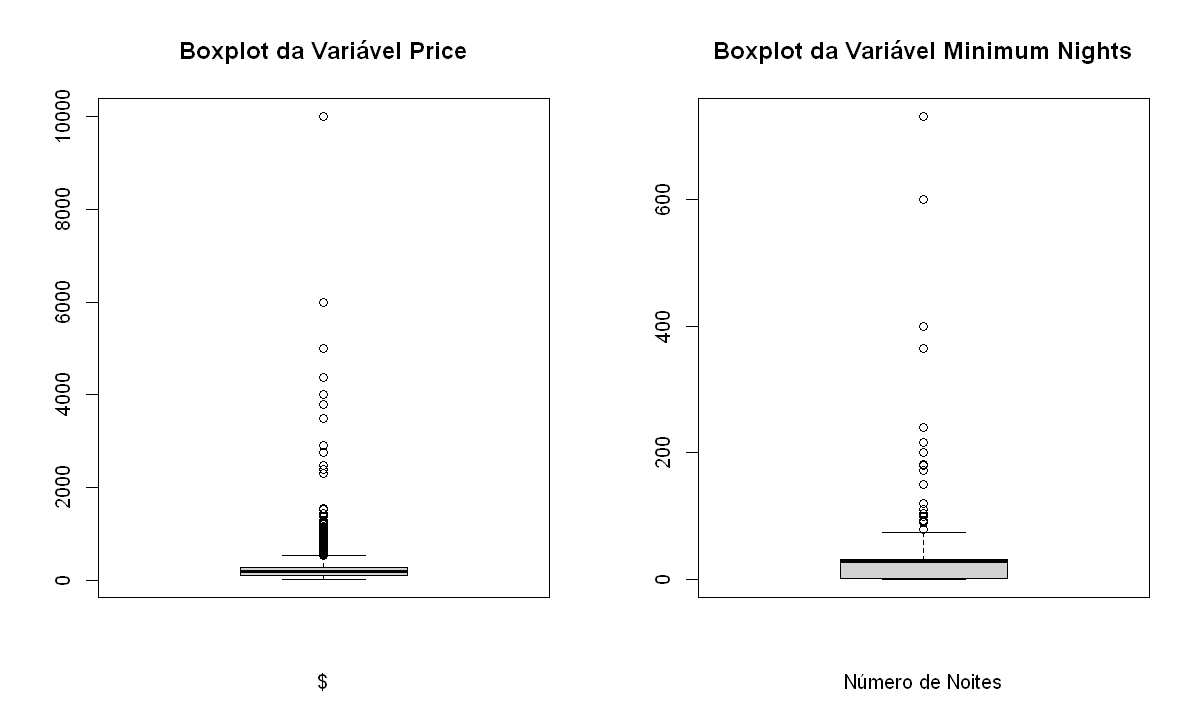

In [101]:
# Visualização do Boxplot da Variável Price e Minimum Nights
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,2)) 
outliers_price <- boxplot(train$price, 
                          xlab = "$",
                          main = "Boxplot da Variável Price")
outliers_minimum_nights <- boxplot(train$minimum_nights, 
                                   xlab = "Número de Noites",
                                   main = "Boxplot da Variável Minimum Nights")

In [102]:
# Eliminar os Outliers (da Variável Price)
outliers_price <- boxplot(train$price, plot=FALSE)$out
# train[which(train$price %in% outliers_price),]
train2 <- train[-which(train$price %in% outliers_price),]

# Eliminar os Outliers (da Variável Minimum Nights)
outliers_minimum_nights <- boxplot(train2$minimum_nights, plot=FALSE)$out
# train[which(train$minimum_nights %in% outliers_minimum_nights),]
train2 <- train2[-which(train2$minimum_nights %in% outliers_minimum_nights),]

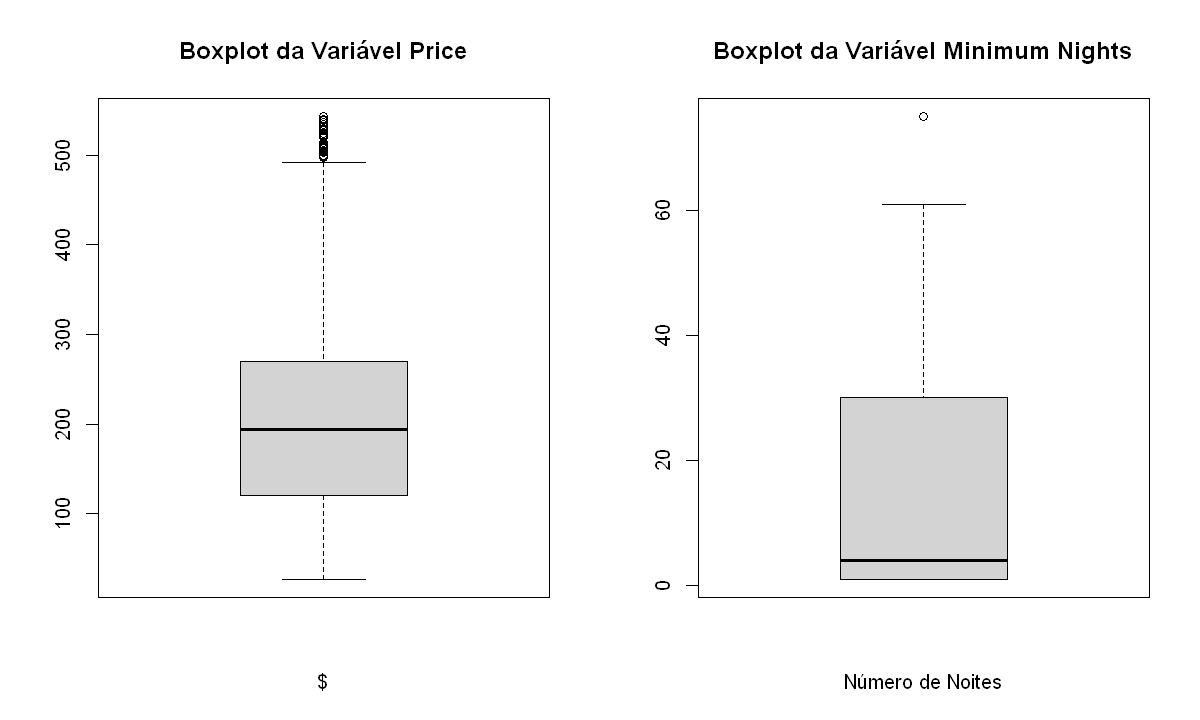

In [103]:
# Visualização do Boxplot da Variável Price sem Outliers significativos
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,2)) 

boxplot(train2$price, 
        xlab = "$",
        main = "Boxplot da Variável Price")

boxplot(train2$minimum_nights, 
        xlab = "Número de Noites", 
        main = "Boxplot da Variável Minimum Nights")

## 📉  Modelo Final 2

In [104]:
# Modelo Final 2 | Igual ao anterior, mas sem os outliers
fit_f_2 <- lm(log(price) ~ neighbourhood + room_type + 
              log(minimum_nights) + license ,data = train2)
summary(fit_f_2)


Call:
lm(formula = log(price) ~ neighbourhood + room_type + log(minimum_nights) + 
    license, data = train2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.62218 -0.28763 -0.00901  0.27542  1.55958 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.678999   0.026247 216.365  < 2e-16 ***
neighbourhoodSouth Boston -0.319975   0.020752 -15.419  < 2e-16 ***
neighbourhoodWest Boston  -0.152741   0.022398  -6.819 1.12e-11 ***
room_typePrivate room     -0.809359   0.018778 -43.102  < 2e-16 ***
log(minimum_nights)       -0.074886   0.006541 -11.449  < 2e-16 ***
license                    0.091798   0.020147   4.556 5.43e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4323 on 2728 degrees of freedom
Multiple R-squared:  0.4906,	Adjusted R-squared:  0.4897 
F-statistic: 525.5 on 5 and 2728 DF,  p-value: < 2.2e-16


[1] -1.867441e-17


	studentized Breusch-Pagan test

data:  fit_f_2
BP = 35.718, df = 5, p-value = 1.082e-06



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit_f_2
LM test = 81.276, df = 1, p-value < 2.2e-16



	Jarque Bera Test

data:  fit_f_2$residuals
X-squared = 17.423, df = 2, p-value = 0.0001647


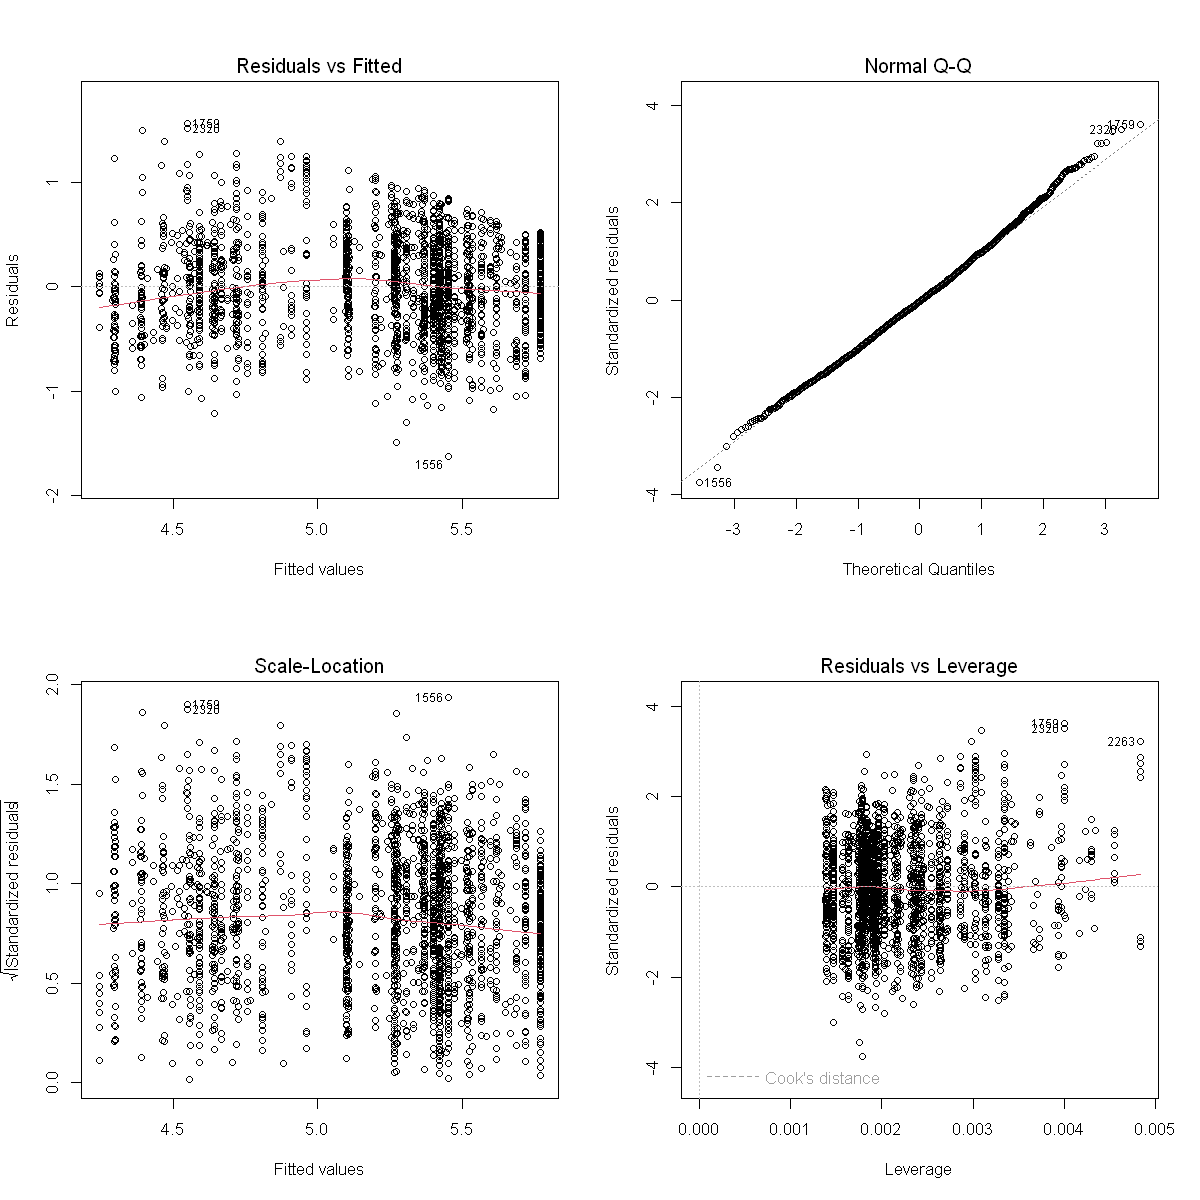

In [105]:
# Verificação dos Pressupostos dos Resíduos (Testes e Gráficos)
mean(fit_f_2$residuals)              # Média Nula
bptest(fit_f_2)                      # Variância Constante
bgtest(fit_f_2)                      # Ausência de Correlação
jarque.bera.test(fit_f_2$residuals)  # Distribuição Normal

# Representação Gráfica sobre os Resíduos
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow=c(2,2)) 
plot(fit_f_2)

- **`Gráfico 1`**: Não linearidade / Dependência dos Resíduos (**Teste Breusch-Godfrey** - $H_0$: Resíduos Independentes)

- **`Gráfico 2`**: Destribuição quase normal. (**Teste Jarque Bera** - $H_0$: Distribuição Normal)

- **`Gráfico 3`**: Não apresenta *funilidade* - porém a variância não é constante (não cumpre os requesitos do OLS) (**Teste Breusch-Pagan** - $H_0$: Erros Homocedásticos)

- **`Gráfico 4`**: Verificamos a existência de alguns ***outliers***, mas pouco significativos

---

>  Retirando os ***outliers* das variáveis `Price`** e **`Minimum Nights`** verificamos que o modelo ficou pior, dado que o pressuposto da variância deixou de ser verificado. Deste modo, constatamos que os ***outliers*** são imprescindíveis para dar robustez ao modelo.

> Sendo assim, a parte final do trabalho foi realizada o modelo **`fit_f`**.

---

## 📃 Testes de Hipóteses
Verificação dos Pressupostos da Regressão (Resíduos)

### Média Nula

$$E\left[\varepsilon\right]=0,\ \ \forall x\ \rightarrow\ E\left[y\right]=\beta_0\ +\ \beta_1x_1\ +\dots $$

In [106]:
# Média dos Resíduos
mean(fit_f$residuals)

[1] -5.188626e-17

> Verifica-se que a **Média** é $\approx 0$

### Variância Constante 
(Resíduos Homocedásticos)

$$Var\left[\varepsilon_i\right]=\sigma_\varepsilon^2=\sigma^2,\ \ \ \forall x $$

In [107]:
# Teste de Breusch-Pagan (H0: Resíduos Homocedásticos)
bptest(fit_f)


	studentized Breusch-Pagan test

data:  fit_f
BP = 4.6473, df = 5, p-value = 0.4604


> $p-value > 0.05$, **Não rejeitamos a $H_O$**, logo o pressuposto é verificado (**Variância é Constante**)

### Resíduos Independentes 
(Ausência de Correlação)

$$Cov\left(\varepsilon_i,\varepsilon_j\right)=0,\left(i\neq j\right)$$

In [108]:
# Teste de Breusch-Godfrey (H0: Resíduos Independentes)
bgtest(fit_f)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit_f
LM test = 73.261, df = 1, p-value < 2.2e-16


> $p-value < 0.05$, **Rejeitamos a $H_O$**, logo o pressuposto não é verificado (**Resíduos Dependentes**)

### Resíduos Normalmente Distribuídos

$$\varepsilon \sim N\left(0,\sigma^2\right)$$

In [109]:
# Teste de Jarque-Bera (H0: Distribuição Normal)
jarque.bera.test(fit_f$residuals)


	Jarque Bera Test

data:  fit_f$residuals
X-squared = 3545.6, df = 2, p-value < 2.2e-16


> $p-value < 0.05$, **Rejeitamos a $H_O$**, logo o pressuposto não é verificado (**Os Resíduos não são Normalmalmente Distribuídos.**)

### Não Correlação entre os Erros e as Variáveis Independentes

$$Cov\left(\varepsilon_i,x_t\right)=0$$

> Por *default* este pressuposto é **validado**, dado que **não é uma Série Temporal**.

---

## 🔮 Performance das Previsão *in-sample* e *out-of-sample*

> A **escala altera** ao **logaritmizámos as variáveis**, pelo que, usámos a função inversa ($exp$) para obter os dados preditos pelo modelo.

[1] 0.4085778

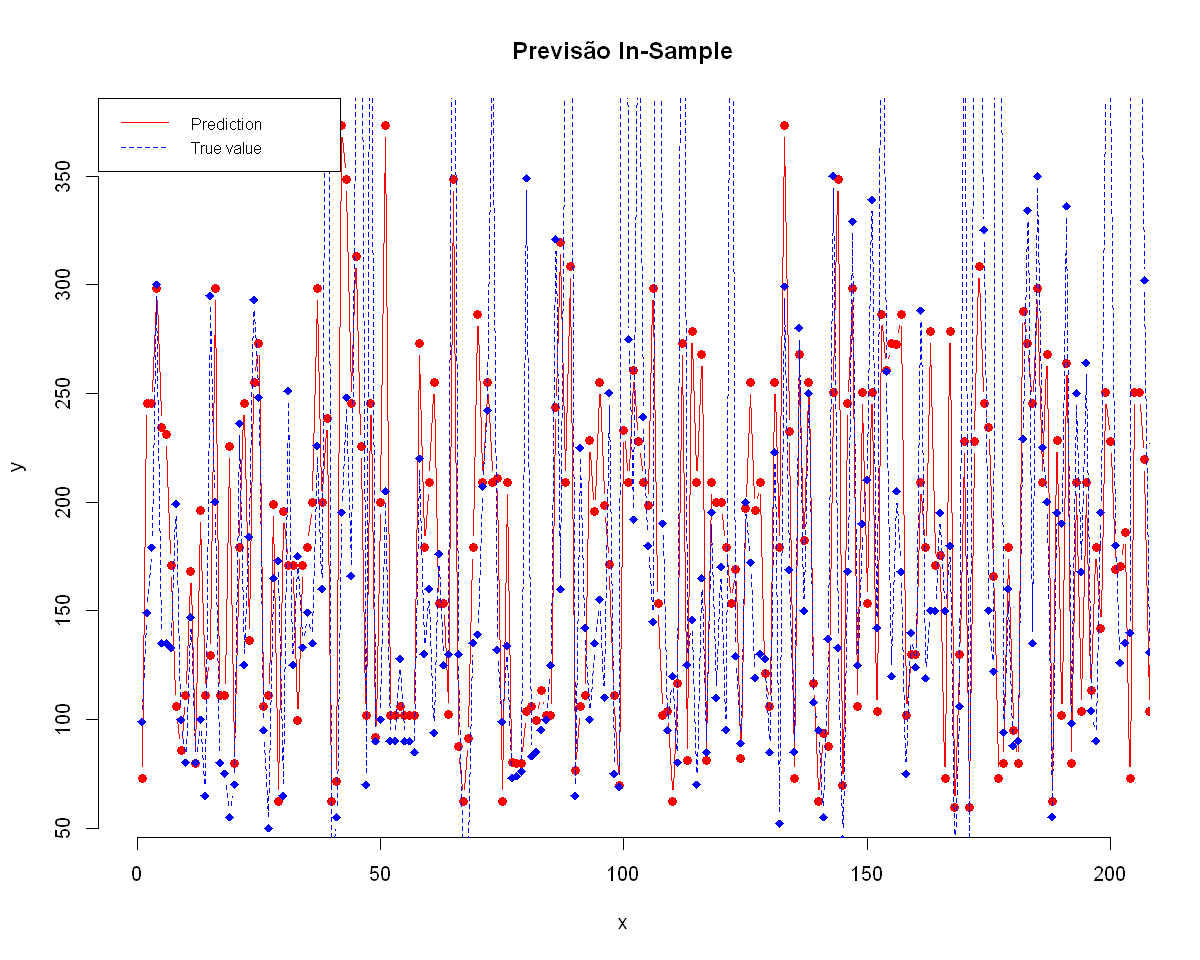

In [110]:
# Previsão sobre o db_model_final | Previsão in-sample
pr_f <-predict(fit_f,train)

options(repr.plot.width = 10, repr.plot.height = 8)
plot(exp(pr_f), type = "b", frame = FALSE, pch = 19,
     col = "red", xlab = "x", ylab = "y", xlim=c(0,200),
     main = "Previsão In-Sample")
lines(train$price, pch = 18, col = "blue", 
      type = "b", lty = 2, xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), 
       col=c("red", "blue"), lty = 1:2, cex=0.8)

# Erro de Previsão
actual_f<-train$price
prediction_f <- exp(fit_f$fitted.values)
n<-length(train$price)
MAPE_f_is <- (1/n) * sum(abs((actual_f - prediction_f)/actual_f))
MAPE_f_is

[1] 0.4324242

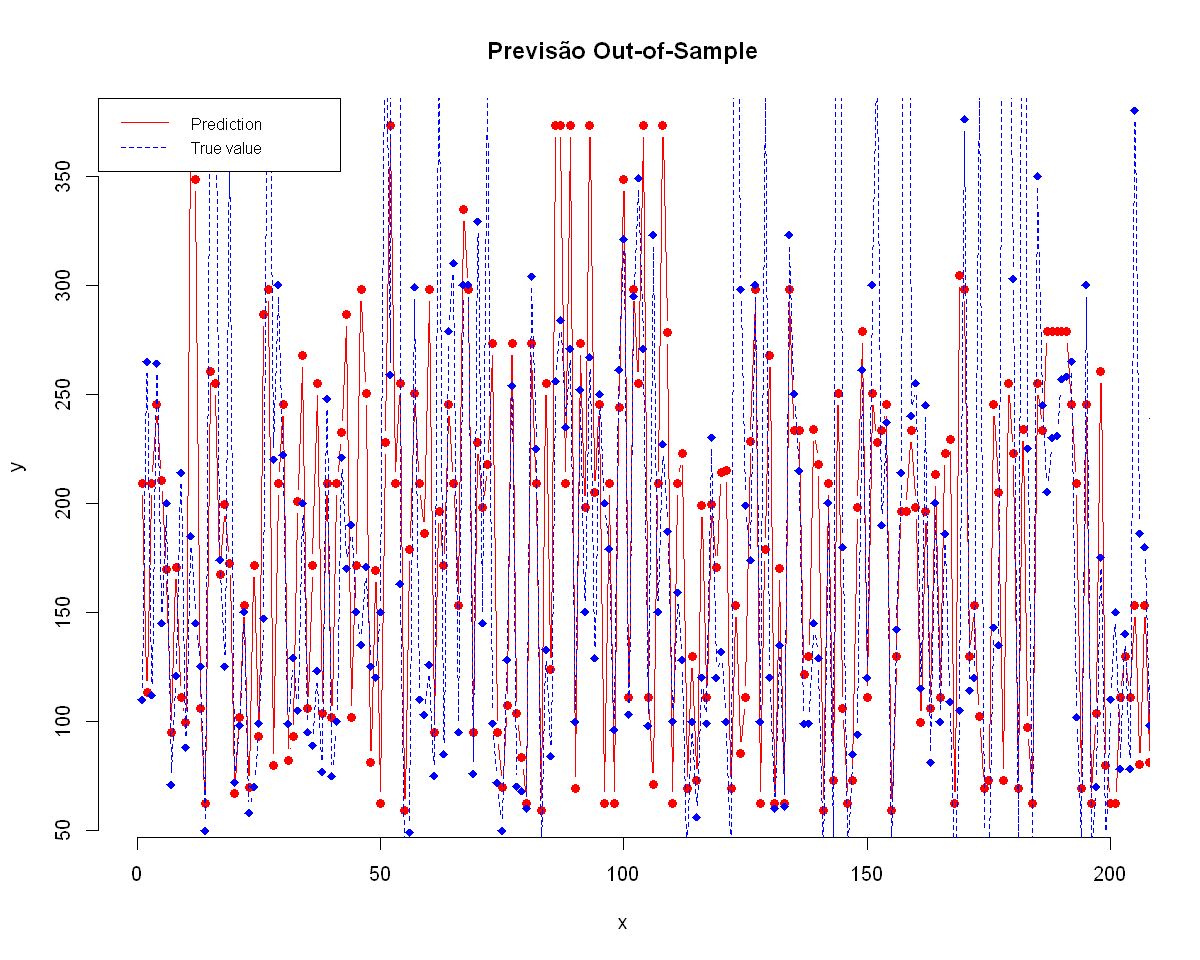

In [111]:
# Previsão sobre o Conjunto de Teste | Previsão out-of-sample
pr_f_ofs <-predict(fit_f,test)
plot(exp(pr_f_ofs), type = "b", frame = FALSE, pch = 19, xlim=c(0,200),
     col = "red", xlab = "x", ylab = "y", main = "Previsão Out-of-Sample")
lines(test$price, pch = 18, col = "blue", type = "b", lty = 2, xlim=c(0,200))
legend("topleft", legend=c("Prediction", "True value"), 
       col=c("red", "blue"), lty = 1:2, cex=0.8)

# Erro de Previsão
actual_f_ofs<-test$price
prediction_f_ofs <- exp(pr_f_ofs)
n<-length(test$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE_f_ofs <- (1/n) * sum(abs((actual_f_ofs - prediction_f_ofs)/actual_f_ofs))
MAPE_f_ofs

In [ ]:
# Data.Frame (Fit, Erros Residuais, R^2 , AIC, BIC e MAPE) do Modelo Final
fits <- c("fit_f")
AIC <- round(c(AIC(fit_f)),0)
BIC <- round(c(BIC(fit_f)),0)
Erros_Residuais <-round(c(summary(fit_f)$sigma),3)
R_quadrado <- round(c(summary(fit_f)$r.squared),3)
MAPE_IS <- round(c(MAPE_f_is),3)
MAPE_OFS <- round(c(MAPE_f_ofs),3)

table_f <- data.frame(fits, Erros_Residuais, R_quadrado, AIC, BIC, MAPE_IS, MAPE_OFS)

ftable_f <- flextable(head(table_f))

ftable_f <- bg(ftable_f, bg = "#ce2029", part = "header")
ftable_f <- color(ftable_f, color = "white", part = "header")
ftable_f <- bold(ftable_f, bold = TRUE, part="header")
ftable_f <- set_header_labels(ftable_f,
                              fits = 'Modelo',
                              Erros_Residuais = 'Erro Residual',
                              R_quadrado = 'R Quadrado',
                              AIC = 'AIC',
                              BIC = 'BIC',
                              MAPE_IS = 'MAPE IS',
                              MAPE_OFS = "MAPE OFS")

ftable_f <- autofit(ftable_f) # -> Ver output no RStudio
# ftable_f
table_f 

fits,Erros_Residuais,R_quadrado,AIC,BIC,MAPE_IS,MAPE_OFS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit_f,0.531,0.499,5502,5545,0.409,0.432


> Conclui-se que os modelos tem uma má capacidade de previsão ***in-sample*** e ***out-of-sample***, pois obtivemos valores de **MAPE** entre $40\%$ e $45\%$

> Como os erros *in-sample* e *out-of-sample* são muito semelhantes, constatamos que não temos nem ***Overfitting***, nem ***Underfitting***

---